In [29]:
import pandas as pd
import numpy as np

import random

from statistics import mean, stdev
from scipy.stats import mode

from IPython.display import IFrame, display
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None


data_path = '../../data/sim1/'
figure_path = '../../figure/sim1/'

In [30]:
final_df = pd.read_csv(data_path + "data_3.csv")
final_df.head()

Subject  Drive  Age  STAI  Type_AB  Effort  Frustration  Mental_Demand  \
0        2      2   23    40       97    17.0         11.0           18.0   
1        2      2   23    40       97    17.0         11.0           18.0   
2        2      2   23    40       97    17.0         11.0           18.0   
3        2      2   23    40       97    17.0         11.0           18.0   
4        2      2   23    40       97    17.0         11.0           18.0   

   Performance  Physical_Demand  Temporal_Demand  NASA_Total_Sum  \
0          8.0             12.0             11.0            77.0   
1          8.0             12.0             11.0            77.0   
2          8.0             12.0             11.0            77.0   
3          8.0             12.0             11.0            77.0   
4          8.0             12.0             11.0            77.0   

   NASA_Total_Sum_Normalized  Effort_Normalized  Frustration_Normalized  \
0                       21.0                7.0                     5.0   
1                       21.0                7.0                     5.0   
2                       21.0                7.0                     5.0   
3                       21.0                7.0                     5.0   
4                       21.0                7.0                     5.0   

   Mental_Demand_Normalized  Performance_Normalized  \
0                       2.0                     4.0   
1                       2.0                     4.0   
2                       2.0                     4.0   
3                       2.0                     4.0   
4                       2.0                     4.0   

   Physical_Demand_Normalized  Temporal_Demand_Normalized PP_Arousal_Mode  \
0                         3.0                         0.0         relaxed   
1                         3.0                         0.0         relaxed   
2                         3.0                         0.0         relaxed   
3                         3.0                         0.0         relaxed   
4                         3.0                         0.0         relaxed   

  PP_2_Arousal_Mode HR_Arousal_Mode BR_Arousal_Mode  Perinasal_Mean  \
0           relaxed        stressed         relaxed       -5.234157   
1           relaxed        stressed         relaxed       -5.310385   
2           relaxed        stressed         relaxed       -5.301983   
3           relaxed         relaxed         relaxed       -5.376241   
4           relaxed        stressed         relaxed       -5.412159   

   Perinasal_Median  Perinasal_SD  Perinasal_SS  Hr_Mean  Hr_Median     Hr_SD  \
0         -5.225352      0.022537    273.968589    90.34       90.3  1.484887   
1         -5.314152      0.010595    282.002952    91.20       90.6  1.366260   
2         -5.300184      0.007855    281.110844    90.08       90.3  1.347261   
3         -5.384108      0.022728    289.044320    86.64       86.8  1.188089   
4         -5.415029      0.008453    292.915248    86.70       87.6  1.708150   

      Hr_SS  Br_Mean  Br_Median     Br_SD      Br_SS  Gender_Female  \
0  81633.00   11.052      11.05  0.162809  1221.7056              1   
1  83191.20   12.004      12.10  0.352742  1442.0800              1   
2  81160.40   13.108      13.10  0.355928  1719.3368              1   
3  75077.60   14.164      14.08  0.319138  2007.1056              1   
4  75195.16   15.488      15.55  0.339830  2399.8208              1   

   Gender_Male  Drive_Label_CD  Drive_Label_ED  Drive_Label_MD  \
0            0               1               0               0   
1            0               1               0               0   
2            0               1               0               0   
3            0               1               0               0   
4            0               1               0               0   

   Nasa_Cluster_High  Nasa_Cluster_Low PP_HR_Arousal_Mode PP_BR_Arousal_Mode  \
0                  1                 0            relaxed           

In [31]:
final_df.columns

Index(['Subject', 'Drive', 'Age', 'STAI', 'Type_AB', 'Effort', 'Frustration',
       'Mental_Demand', 'Performance', 'Physical_Demand', 'Temporal_Demand',
       'NASA_Total_Sum', 'NASA_Total_Sum_Normalized', 'Effort_Normalized',
       'Frustration_Normalized', 'Mental_Demand_Normalized',
       'Performance_Normalized', 'Physical_Demand_Normalized',
       'Temporal_Demand_Normalized', 'PP_Arousal_Mode', 'PP_2_Arousal_Mode',
       'HR_Arousal_Mode', 'BR_Arousal_Mode', 'Perinasal_Mean',
       'Perinasal_Median', 'Perinasal_SD', 'Perinasal_SS', 'Hr_Mean',
       'Hr_Median', 'Hr_SD', 'Hr_SS', 'Br_Mean', 'Br_Median', 'Br_SD', 'Br_SS',
       'Gender_Female', 'Gender_Male', 'Drive_Label_CD', 'Drive_Label_ED',
       'Drive_Label_MD', 'Nasa_Cluster_High', 'Nasa_Cluster_Low',
       'PP_HR_Arousal_Mode', 'PP_BR_Arousal_Mode', 'HR_BR_Arousal_Mode',
       'PP_HR_BR_Arousal_Mode'],
      dtype='object')

In [32]:
final_df.describe()

Subject        Drive          Age         STAI      Type_AB  \
count  6390.000000  6390.000000  6390.000000  6390.000000  6390.000000   
mean     35.666823     3.014085    43.714241    32.968232    49.602504   
std      23.118468     0.817588    23.460274     8.403062    31.679824   
min       2.000000     2.000000    21.000000    20.000000     0.000000   
25%      18.000000     2.000000    22.000000    25.000000    20.000000   
50%      33.000000     3.000000    25.000000    32.000000    49.000000   
75%      47.000000     4.000000    70.000000    40.000000    82.000000   
max      84.000000     4.000000    81.000000    52.000000    99.000000   

            Effort  Frustration  Mental_Demand  Performance  Physical_Demand  \
count  6390.000000  6390.000000    6390.000000  6390.000000      6390.000000   
mean     12.003599     9.078091      12.606964     9.093584         9.033333   
std       5.181982     5.731791       4.917477     5.401497         5.381224   
min       2.000000     1.000000       3.000000     1.000000         1.000000   
25%       7.000000     4.000000      10.000000     4.000000         4.000000   
50%      13.000000     8.000000      13.000000     8.000000         9.000000   
75%      17.000000    14.000000      17.000000    12.000000        13.000000   
max      20.000000    20.000000      20.000000    20.000000        20.000000   

       Temporal_Demand  NASA_Total_Sum  NASA_Total_Sum_Normalized  \
count      6390.000000     6390.000000                6390.000000   
mean          9.353052       61.168623                  22.984977   
std           4.467750       26.154570                  25.762294   
min           1.000000       15.000000                 -29.000000   
25%           6.000000       39.000000                   5.000000   
50%          10.000000       61.000000                  20.000000   
75%          13.000000       80.000000                  44.000000   
max          20.000000      120.000000                  76.000000   

       Effort_Normalized  Frustration_Normalized  Mental_Demand_Normalized  \
count        6390.000000             6390.000000               6390.000000   
mean            3.636228                4.261659                  4.314006   
std             6.149589                5.773941                  5.730557   
min           -12.000000               -8.000000                -12.000000   
25%            -1.000000                0.000000                  1.000000   
50%             3.000000                3.000000                  4.000000   
75%             8.000000                9.000000                  8.000000   
max            16.000000               19.000000                 19.000000   

       Performance_Normalized  Physical_Demand_Normalized  \
count             6390.000000                 6390.000000   
mean                 3.880751                    2.847731   
std                  6.114108                    4.731032   
min                -14.000000                   -7.000000   
25%                  1.000000                    0.000000   
50%                  4.000000                    2.000000   
75%                  8.000000                    6.000000   
max                 18.000000                   13.000000   

       Temporal_Demand_Normalized  Perinasal_Mean  Perinasal_Median  \
count                 6390.000000     6390.000000       6390.000000   
mean                     4.044601       -5.122087         -5.122430   
std                      5.000271        0.241875          0.242280   
min                     -9.000000       -5.706820         -5.713246   
25%                      1.000000       -5.263623         -5.263779   
50%                      3.000000       -5.175722         -5.176753   
75%                      9.000000       -5.043806         -5.043697   
max                     15.000000       -3.484398         -3.489295   

       Perinasal_SD  Perinasal_SS      Hr_Mean    Hr_Median        Hr_SD  \
count   6390.000000   6390.00000

In [33]:
len(final_df.Subject.unique())

31

In [34]:
def get_round(num, point=2):
    return round(num, point)

def get_rounded_str(num, point):
    return str(get_round(num, point))


def get_drive_name(drive):
    if drive == 2:
        return 'CD'
    elif drive == 3:
        return 'MD'
    elif drive == 4:
        return 'ED'
    elif drive == 5:
        return 'FD'


def get_test_subjs(arousal_signal):
    
    ######################################
    # 'PP', 'PP_2', 'HR', 'BR', 'PP_HR_BR'
    ######################################
    
    if arousal_signal == 'PP':
        #####################################
        # return [2, 31, 66, 47, 44, 25, 24]
        #####################################
        return [18, 23, 16, 25, 8, 45, 2]
    
    elif arousal_signal == 'PP_2':
        return [44, 20, 16, 68, 33, 60, 18]
    
    elif arousal_signal == 'HR':
        return [61, 29, 24, 38, 84, 2, 17]
    
    elif arousal_signal == 'BR':
        return [44, 62, 81, 20, 61, 38, 79]
    
    elif arousal_signal == 'PP_HR_BR':
        return [31, 66, 16, 29, 62, 44, 36]
    




def get_splitted_data(final_df, feature_list, arousal_signal, predict_col, random_selection = False):
    
    unique_subjs = final_df.Subject.unique()
    
    df_arousal_count = final_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    df_arousal_count = df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    # print(df_arousal_count.head(2))

    ########################################################################
    '''
    train_subj_end = 65

    train_df = final_df[final_df.Subject < train_subj_end]
    test_df = final_df[final_df.Subject >= train_subj_end]
    
    train_subjs = train_df.Subject.unique()
    test_subjs = test_df.Subject.unique()
    
    print('\n\nTest Subjects -->\n', test_subjs)
    '''
    ########################################################################
    
    
    
    ########################################################################
    # '''
    if random_selection:
        test_subjs = random.sample(list(final_df.Subject.unique()), 7)
    else:
        test_subjs = get_test_subjs(arousal_signal)
        
    train_subjs = [subj for subj in unique_subjs if subj not in test_subjs]
    
    train_df = final_df[final_df.Subject.isin(train_subjs)]
    test_df = final_df[final_df.Subject.isin(test_subjs)]
    
    print('\n\nTest Subjects -->\n', test_subjs)
    # '''
    ########################################################################
    
    
    
    print('\n\nTotal Train Subjects: ' + str(len(train_subjs)) + '    Percentage: ' + str(round(100*len(train_subjs)/len(unique_subjs), 2)) + '%')
    print('Total Test Subjects: ' + str(len(test_subjs)) + '    Percentage: ' + str(round(100*len(test_subjs)/len(unique_subjs), 2)) + '%' + '\n\n')


    train_df_arousal_count = train_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    train_df_arousal_count = train_df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    print('Train Data Percentage -->')
    print(train_df_arousal_count)


    test_df_arousal_count = test_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    test_df_arousal_count = test_df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    print('\nTest Data Percentage -->')
    print(test_df_arousal_count)


    print('\n\nTotal Train Rows: ' + str(len(train_df)) + '    Percentage: ' + str(round(100*len(train_df)/len(final_df), 2)) + '%')
    print('Total Test Rows: ' + str(len(test_df)) + '    Percentage: ' + str(round(100*len(test_df)/len(final_df), 2)) + '%' + '\n\n')

    
    X_train = train_df[feature_list]
    y_train = train_df[[predict_col]]

    X_test = test_df[feature_list]
    y_test = test_df[[predict_col]]
    
    return X_train, y_train, X_test, y_test, train_df, test_df

In [35]:
feature_list = [
    'Age', 'Gender_Female', 'Gender_Male', 
    
    'Effort', 'Frustration', 'Mental_Demand', 'Performance', 'Physical_Demand', 'Temporal_Demand', 'NASA_Total_Sum', 
    
    'Perinasal_Mean', 'Perinasal_SD', 'Perinasal_Median', 'Perinasal_SS', 
    'Hr_Mean', 'Hr_SD', 'Hr_Median', 'Hr_SS', 
    'Br_Mean', 'Br_SD', 'Br_Median', 'Br_SS',


################################################################################################
#              Not Available in any of SIM2, TT1, EmailStress Studies
################################################################################################
#     'STAI', 'Type_AB', 
#     'NASA_Total_Sum_Normalized', 
#     'Effort_Normalized', 'Frustration_Normalized', 'Mental_Demand_Normalized',
#     'Performance_Normalized', 'Physical_Demand_Normalized', 'Temporal_Demand_Normalized', 
#     'Palm_Mean', 'Palm_SD', 'Palm_Median', 'Palm_SS', 
#     'Drive_Label_CD', 'Drive_Label_ED', 'Drive_Label_MD', 
#     'Nasa_Cluster_High', 'Nasa_Cluster_Low',
################################################################################################

]

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [39]:
def get_confusion_matrix(arousal_signal, final_df, test_df, y_test, y_pred, do_normalize):
    
    #####################################################################################
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    sns.set(font_scale=1.4)
    
    #-------------------------------------------------------------#
    # labels = ["normal", "relaxed", "stressed", "unknown"]
    # labels = ["relaxed", "normal", "unknown", "stressed"]
    # labels = ["relaxed", "stressed"]
    labels = sorted(final_df.Arousal_Mode.unique())
    #-------------------------------------------------------------#
    
    if do_normalize:
        conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels, normalize='all'))
        sns.heatmap(conf_mat*100, annot=True, annot_kws={"size": 16})
        plt.title('Confusion Matrix - ' + arousal_signal + ' %')
        plot_name = arousal_signal.lower() + '_percentage'
        
    else:
        conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels))
        print(conf_mat)
        
        
#         strings = np.asarray([['%', '%'], ['%', '%']])
#         annot = (np.asarray(["{0}{1}".format(val, string)
#                       for val, string in zip(conf_mat.to_numpy().flatten(),
#                                                strings.flatten())])
#          ).reshape(2, 2)
        
    
#         annot = np.array([str(val)+"%" for val in conf_mat.to_numpy().flatten()]).reshape(conf_mat.shape)
#         sns.heatmap(conf_mat, annot=annot, fmt='d', annot_kws={"size": 24})
        
        sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size": 16})
        plt.title('Confusion Matrix - ' + arousal_signal)
        plot_name = arousal_signal.lower() 

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # plt.show()

#     plt.savefig(figure_path + plot_name + '_confusion_matrix.png')
#     plt.savefig(figure_path + plot_name + '_confusion_matrix.pdf')
    #####################################################################################
    
    

def get_all_confusion_matrices(arousal_signal, final_df, test_df, y_test, y_pred):

    get_confusion_matrix(arousal_signal, final_df, test_df, y_test, y_pred, do_normalize=False)
    get_confusion_matrix(arousal_signal, final_df, test_df, y_test, y_pred, do_normalize=True)

    #####################################################################################
    # print('\n\nConfusion Matrix:')
    # print(pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels)))
    #####################################################################################
    
    
    #####################################################################################
    labels = sorted(final_df.Arousal_Mode.unique())
    fig, axs = plt.subplots(3, figsize = (12, 36))
    fig.suptitle(arousal_signal)

    for i, drive in enumerate(test_df.Drive.unique()):
        drive_test_df = test_df.copy()[test_df.Drive == drive]
        y_test_drive = drive_test_df.Arousal_Mode
        y_pred_drive = drive_test_df.Prediction

        conf_mat = pd.DataFrame(confusion_matrix(y_test_drive, y_pred_drive, labels = labels))
        axis = axs[i]

        sns.set(font_scale=1.4)
        sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size": 16}, ax = axis)
        
        axis.title.set_text(get_drive_name(drive))
        axis.set_xticklabels(labels)
        axis.set_yticklabels(labels)
        axis.set_xlabel('Predicted')
        axis.set_ylabel('Actual')

        # plt.show()

#     plt.savefig(figure_path + arousal_signal.lower() + '_drive_confusion_matrix.png')
#     plt.savefig(figure_path + arousal_signal.lower() + '_drive_confusion_matrix.pdf')
    #####################################################################################
    

    
    
    
    
def get_feature_importance(model, X_train, arousal_signal):
    
    df_feature_importance = pd.DataFrame(model.feature_importances_, 
                                     index=X_train.columns, 
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
    feature_imp = pd.Series(model.feature_importances_,
                            index=X_train.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(25, 12))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    sns.set_context('paper', font_scale=4)
    
    plt.xlabel('Feature Importance Score', fontsize=24)
    plt.ylabel('Features', fontsize=24)
    plt.title(arousal_signal + ' - Important Features', fontsize=36)
    plt.rc('xtick', labelsize=48)
    plt.rc('ytick', labelsize=48)
    plt.yticks(rotation=30)
#     plt.savefig(figure_path + arousal_signal.lower() + '_feature_importance.png')
#     plt.savefig(figure_path + arousal_signal.lower() + '_feature_importance.pdf')

    plt.show()

    
    
    
def get_bootstrap_results(final_df, feature_list, arousal_signal, random_selection):

    #####################################################################################
    arousal_col = arousal_signal + '_Arousal_Mode'

    # 'PP_Arousal_Mode', 'HR_Arousal_Mode', 'BR_Arousal_Mode'
    # 'PP_HR_Arousal_Mode', 'HR_BR_Arousal_Mode', 'PP_HR_BR_Arousal_Mode'
    #####################################################################################




    #####################################################################################
    final_df['Arousal_Mode'] = final_df[arousal_col]
    # print(final_df.Arousal_Mode.unique())
    #####################################################################################




    #####################################################################################
    #                               MODELING
    #####################################################################################
    X_train, y_train, X_test, y_test, train_df, test_df = get_splitted_data(final_df, 
                                                                            feature_list,
                                                                            arousal_signal,
                                                                            'Arousal_Mode', 
                                                                            random_selection = random_selection)

    
    
#     #####################################################################################
#     X_train = final_df[feature_list]
#     y_train = final_df[['Arousal_Mode']]
#     #####################################################################################







#     #####################################################################################
#     # Use the random grid to search for best hyperparameters
#     # First create the base model to tune
#     rfc = RandomForestClassifier()

#     # Random search of parameters, using 5 fold cross validation, 
#     # Search across 100 different combinations, and use all available cores
#     rfc_random = RandomizedSearchCV(estimator = rfc, 
#                                    param_distributions = random_grid, 
#                                    n_iter = 20, 
#                                    cv = 5, 
#                                    verbose = 2, 
#                                    random_state = 42, 
#                                    n_jobs = -1) 

#     # Fit the random search model
#     rfc_random.fit(X_train, y_train)
#     print(str(rfc_random.best_params_))
#     #####################################################################################
    
    
    
    
    
    
    # -----------------------------------------------------------
    # model = RandomForestClassifier(n_estimators = 200,
    #                                max_features = 'auto',
    #                                bootstrap = True)
    # -----------------------------------------------------------

    
#     {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
    model = RandomForestClassifier(n_estimators = 600,
                                   min_samples_split = 10,
                                   min_samples_leaf = 4,
                                   max_depth = 90, 
                                   max_features = 'sqrt',
                                   bootstrap = False)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_df['Prediction'] = y_pred

    Accuracy = get_round(accuracy_score(y_test, y_pred))
    F1 = get_round(f1_score(y_test, y_pred, average='weighted'))
    Recall = get_round(recall_score(y_test, y_pred, average='weighted'))
    Precision = get_round(precision_score(y_test, y_pred, average='weighted'))
    
    print('Accuracy:' + str(Accuracy))
    print('F1: ' + str(F1))
    print('Recall: ' + str(Recall))
    print('Precision: ' + str(Precision))
    
    
    signal_metrics[arousal_signal]['Accuracy'].append(Accuracy)
    signal_metrics[arousal_signal]['F1'].append(F1)
    signal_metrics[arousal_signal]['Recall'].append(Recall)
    signal_metrics[arousal_signal]['Precision'].append(Precision)
    #####################################################################################
    
    
    
    #####################################################################################
    #                         Feature Importance
    #####################################################################################
    get_feature_importance(model, X_train, arousal_signal)
    #####################################################################################
    
    
    #####################################################################################
    #                              PLOTTING
    #####################################################################################
    get_all_confusion_matrices(arousal_signal, final_df, test_df, y_test, y_pred)
    #####################################################################################
    
    
    
    #####################################################################################
    #                        Classification Probabilities
    #####################################################################################
    y_pred_probabilities = model.predict_proba(X_test)
    # print(y_pred_probabilities)
    
    test_df["Relaxed_Prob"], test_df["Stress_Prob"] = y_pred_probabilities[:,0], y_pred_probabilities[:,1]
    test_df.to_csv('../../data/sim1/' + arousal_signal.lower() + '_pred_result_df.csv', sep=',')
    
    
#     test_df_mean = test_df[['Prediction', 'Relaxed_Prob', 'Stress_Prob']].groupby(['Prediction']).agg({'Relaxed_Prob': 'mean', 'Stress_Prob': 'mean'})
#     test_df_mean = test_df_mean.apply(lambda x: round(100 * x, 2))
#     print(test_df_mean, '\n')
    #####################################################################################

----------------------------------------------------
------------------------ PP ------------------------
----------------------------------------------------

{'PP': {'Accuracy': [], 'F1': [], 'Recall': [], 'Precision': []}}


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


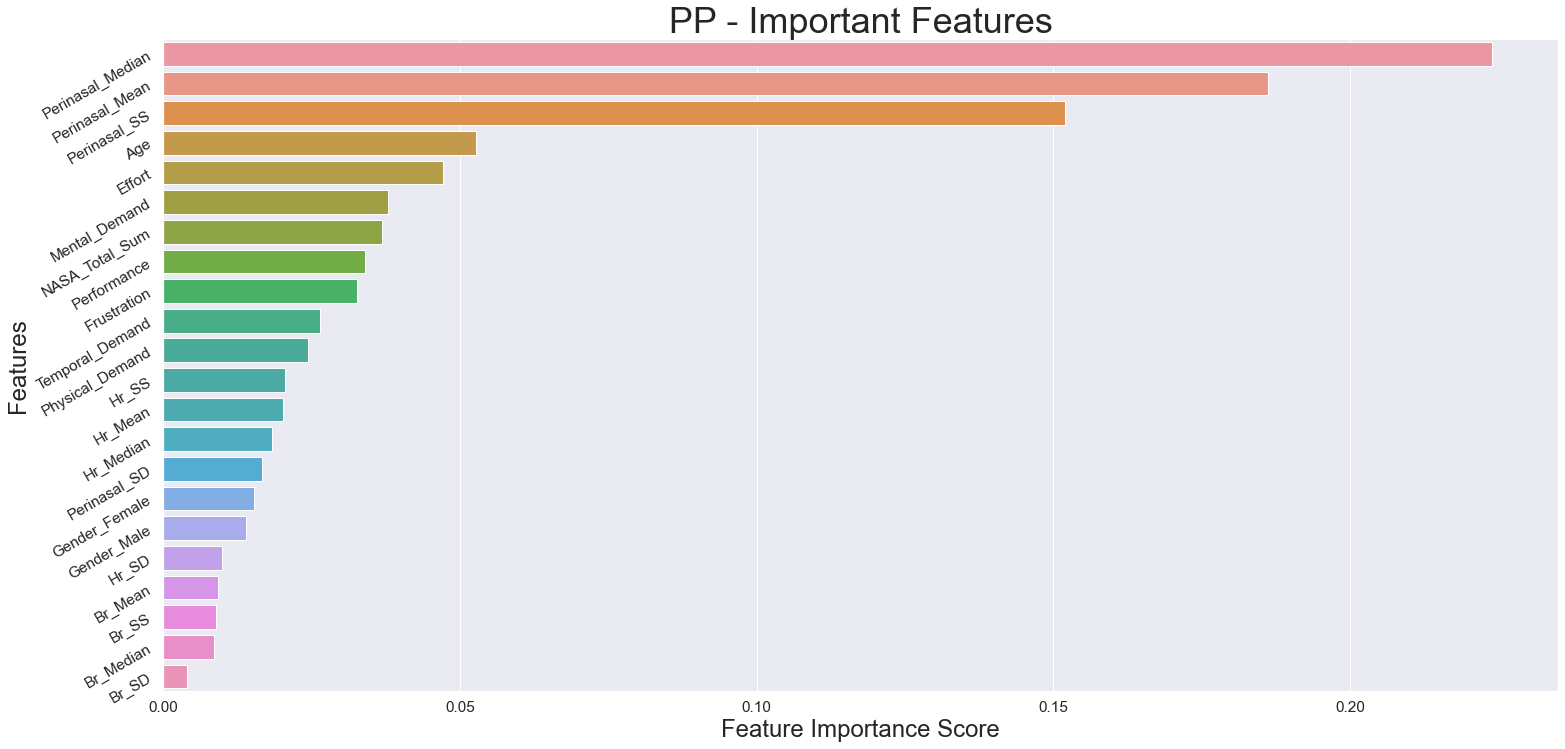

      0   1
0  1318   3
1    65  98


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


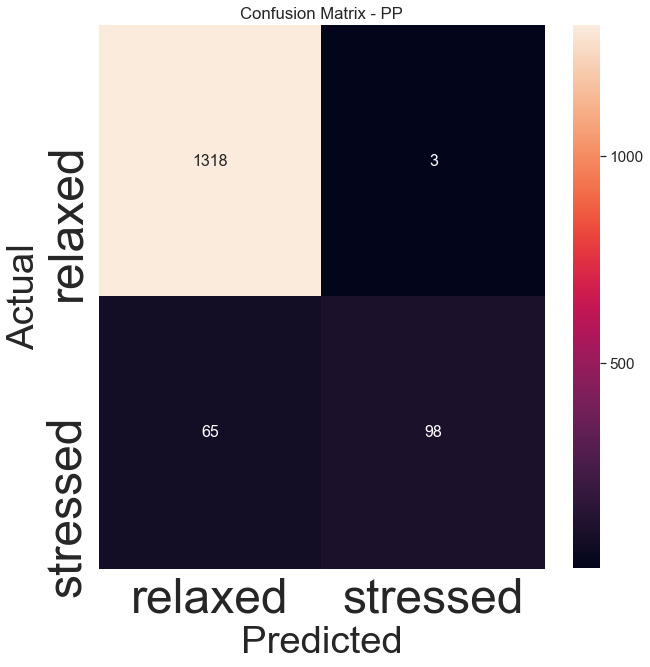

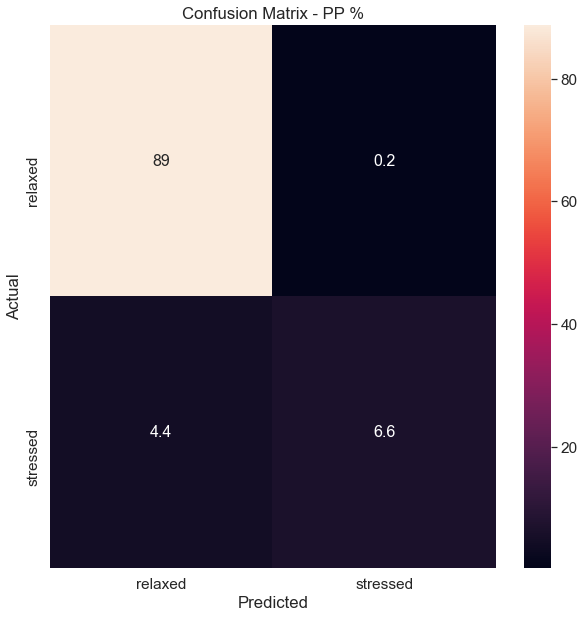

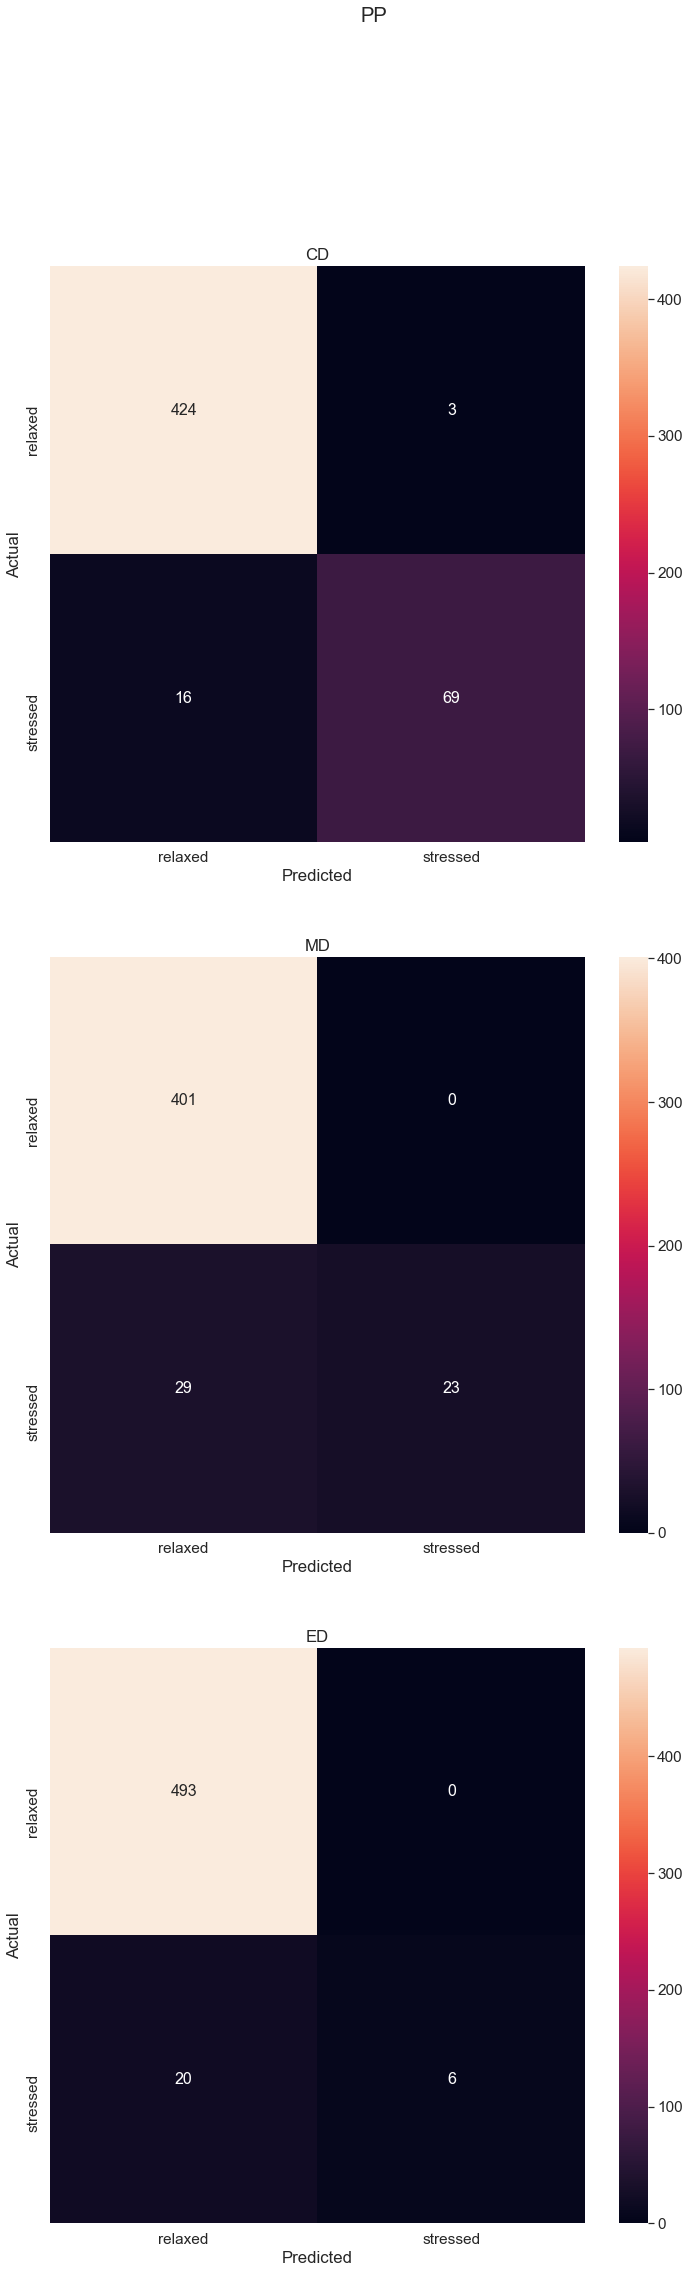

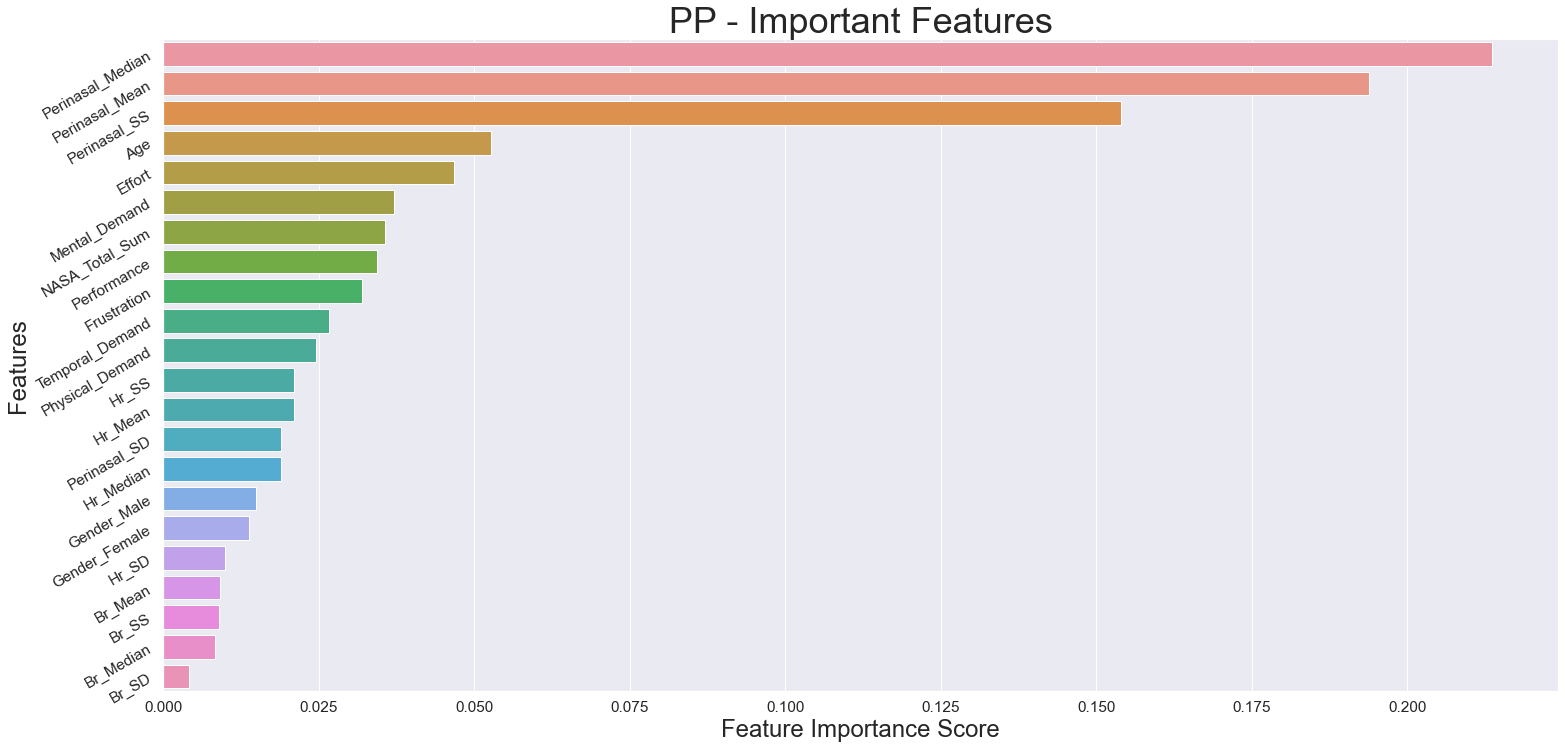

      0    1
0  1316    5
1    62  101


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


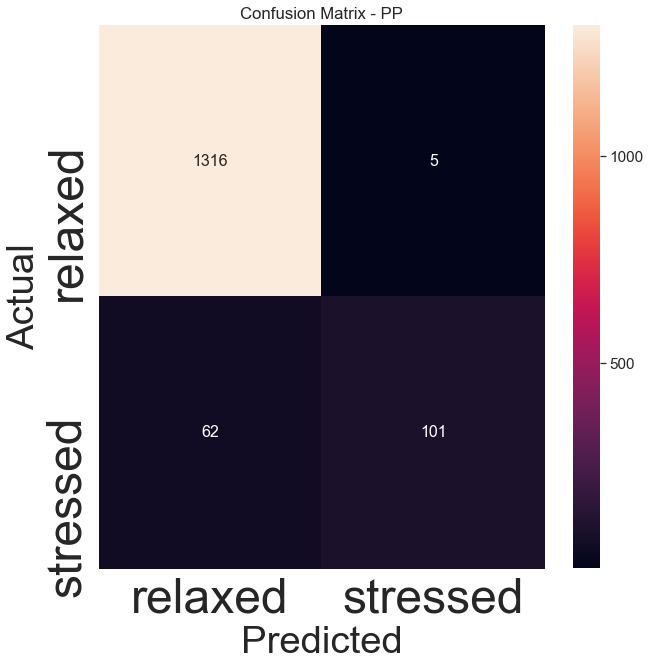

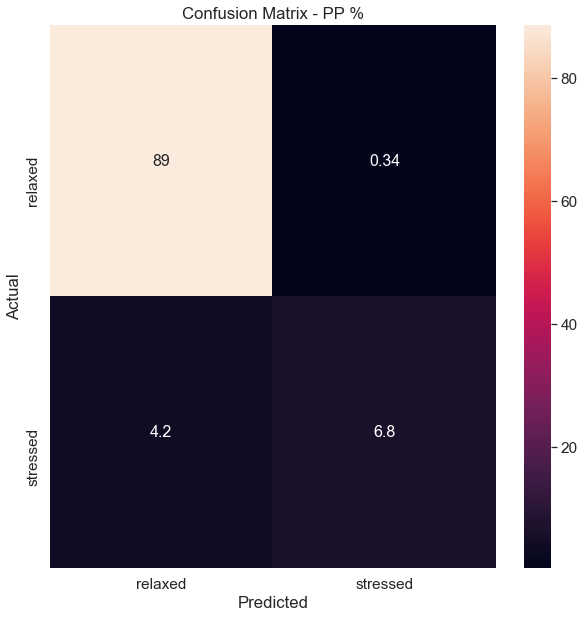

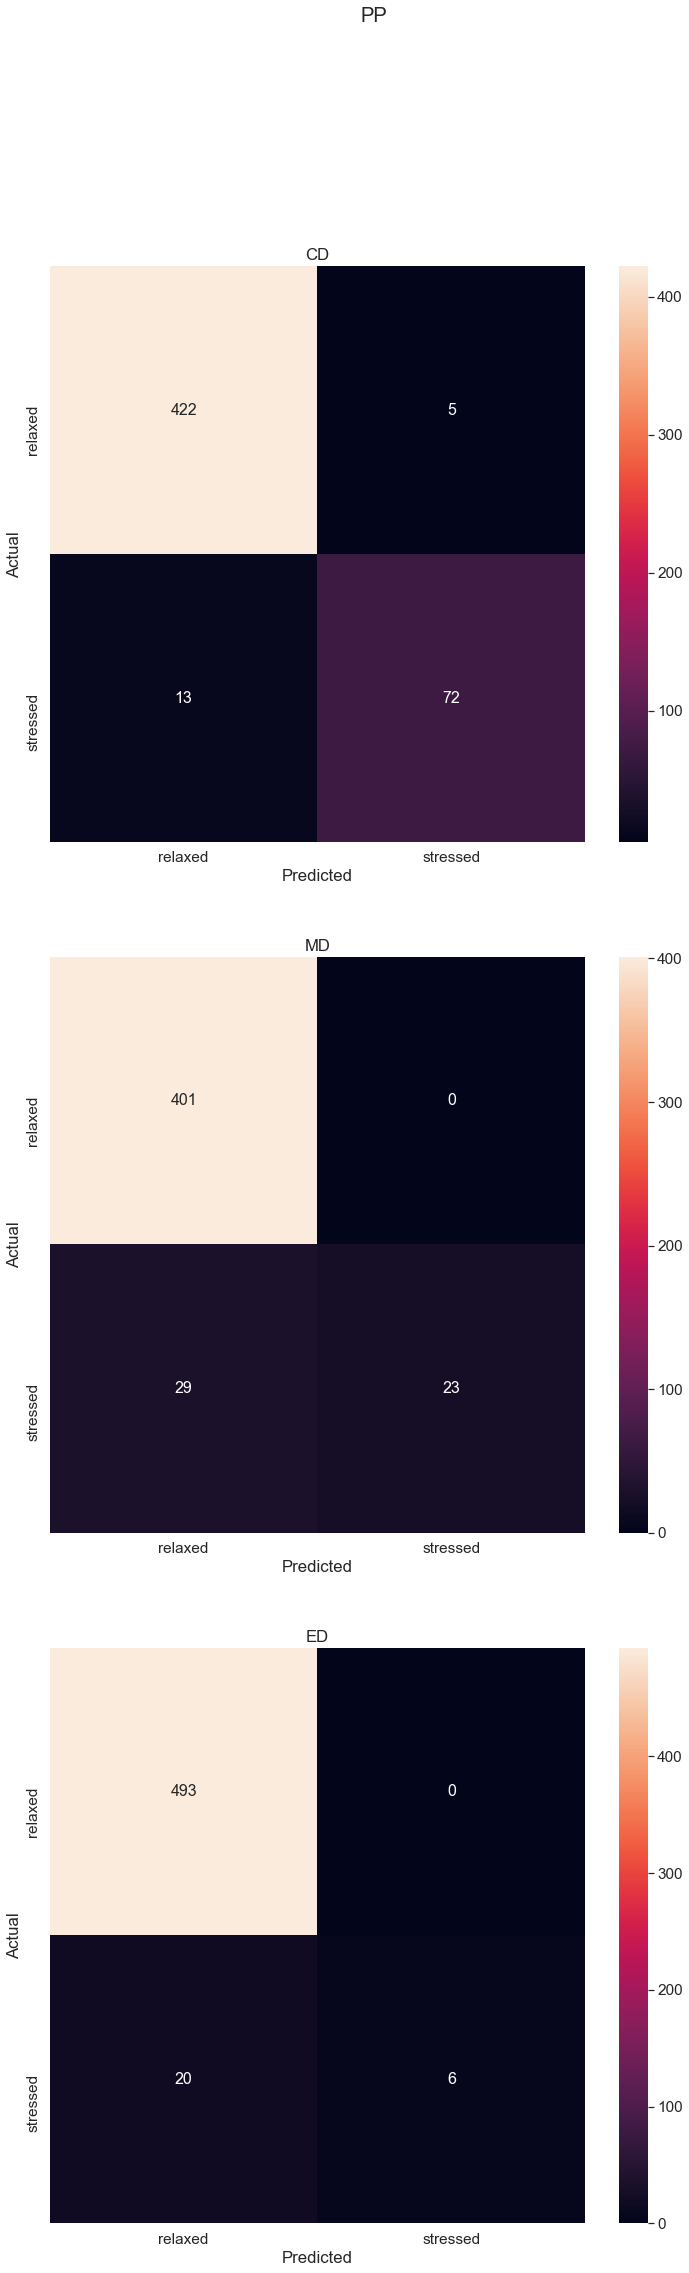

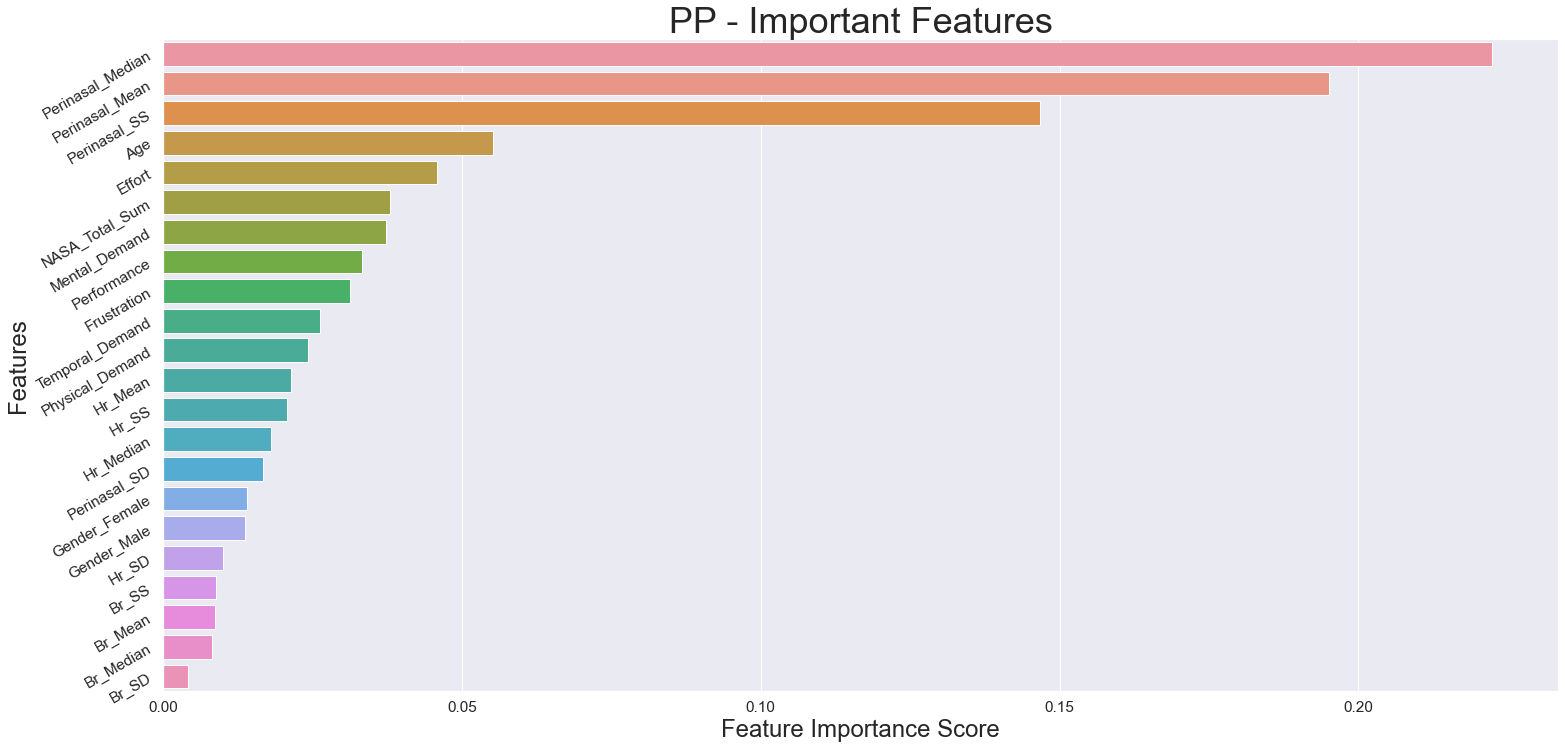

      0   1
0  1315   6
1    64  99


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


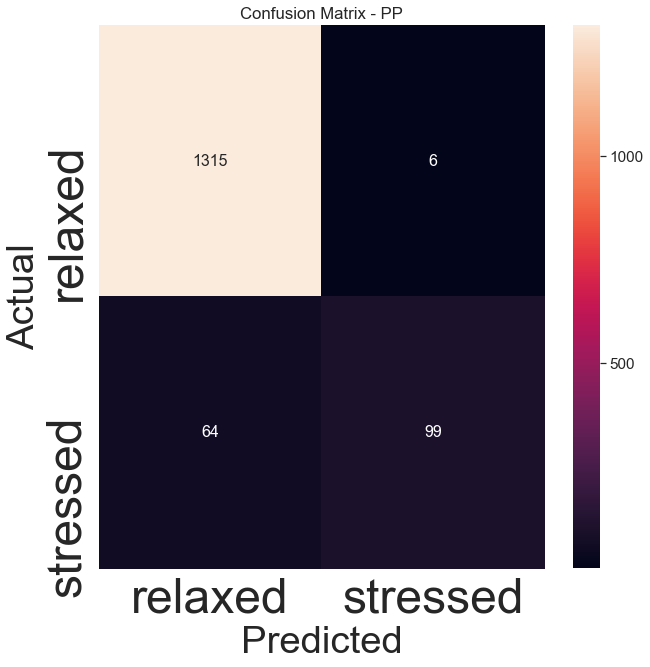

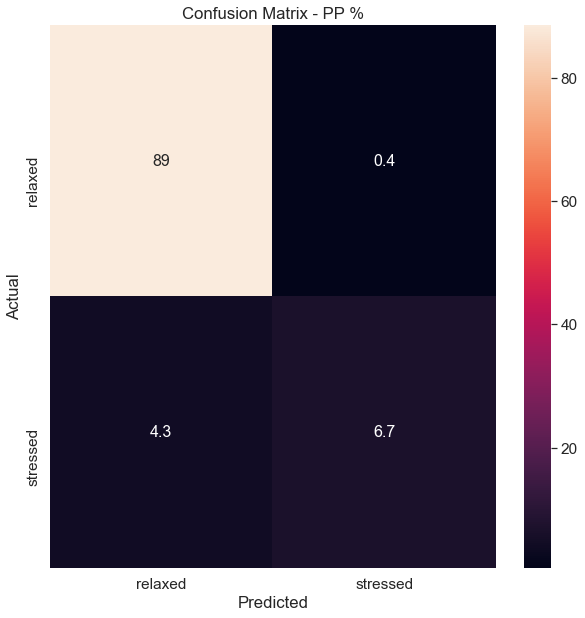

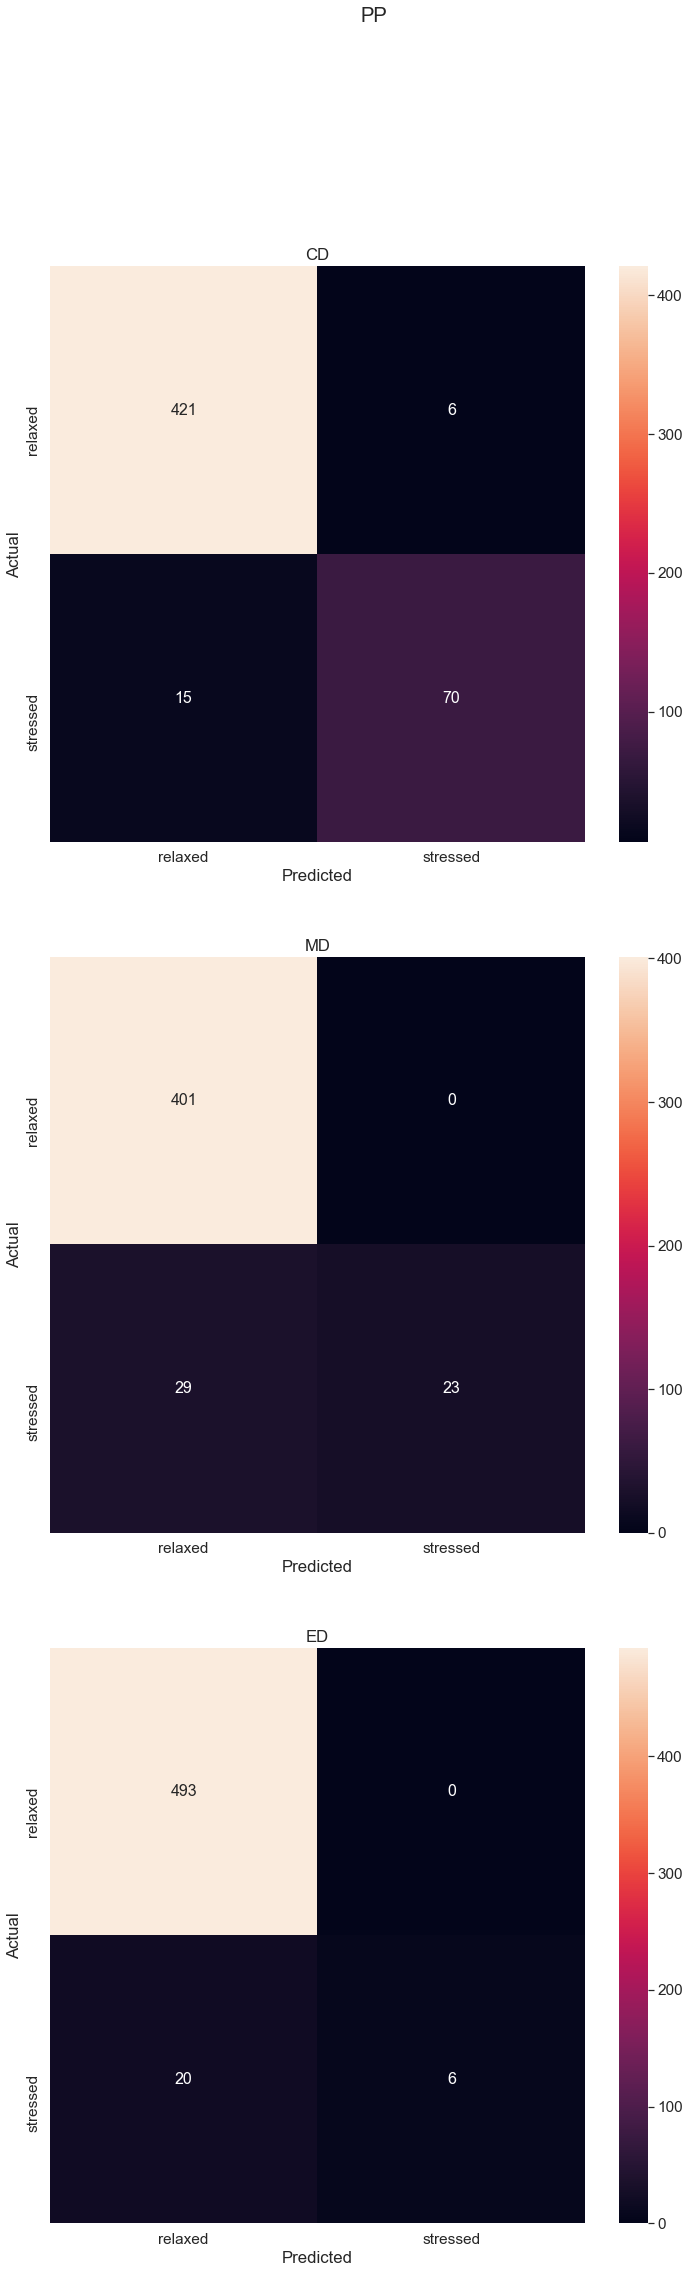

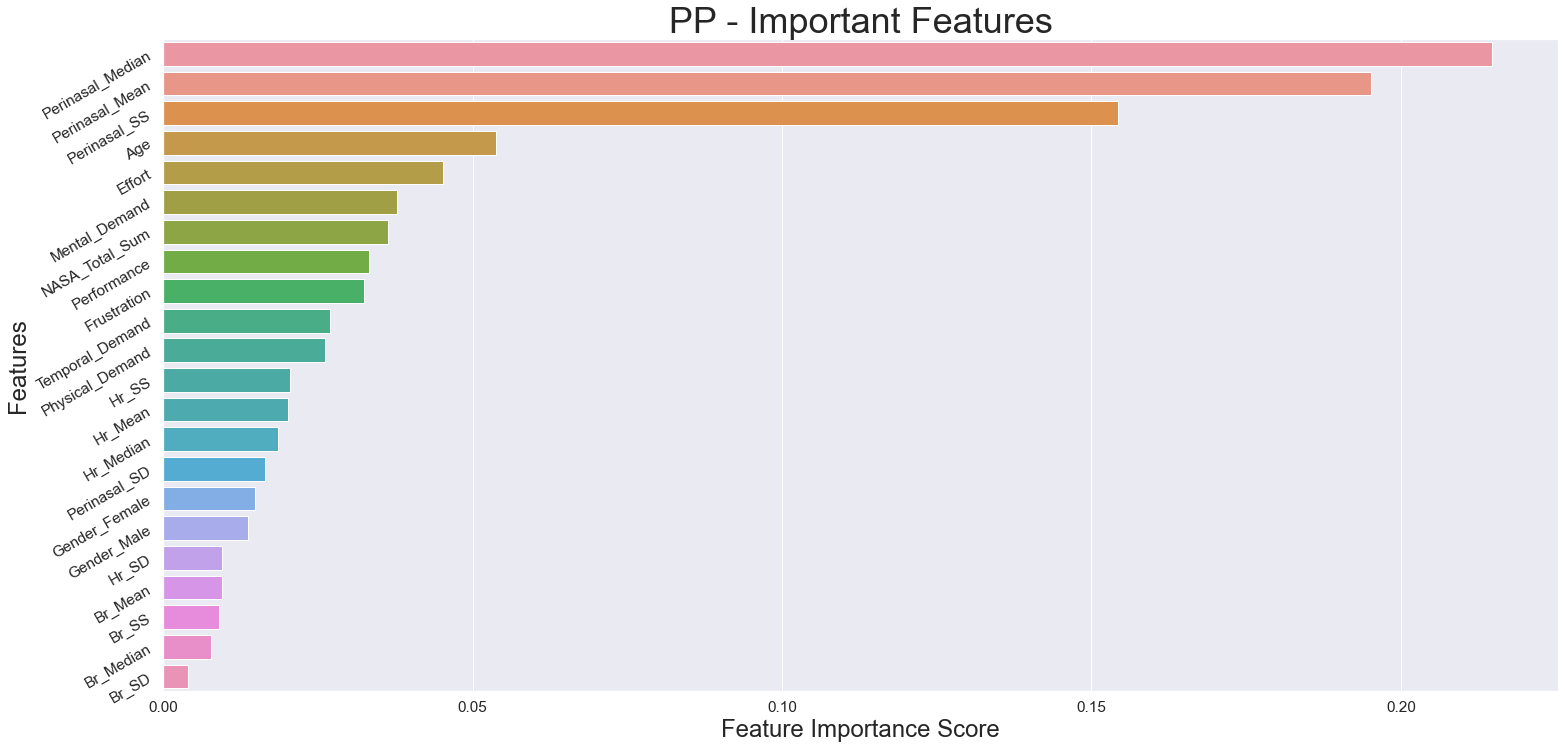

      0    1
0  1314    7
1    62  101


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


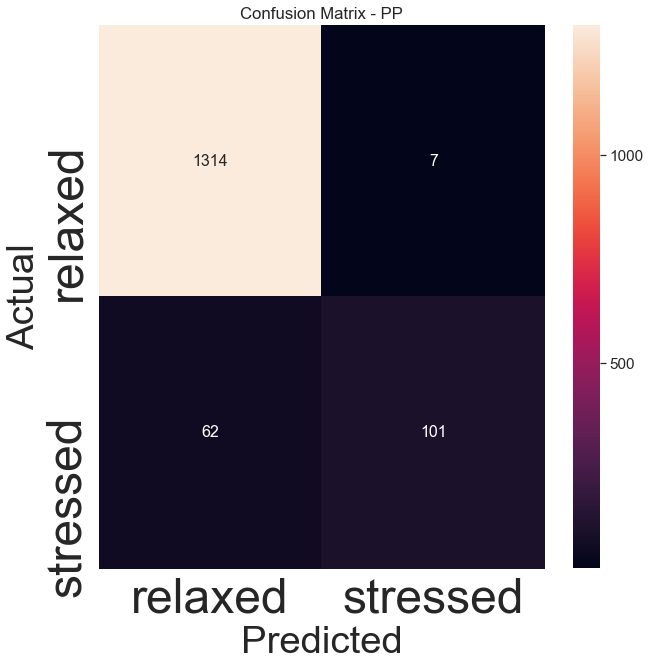

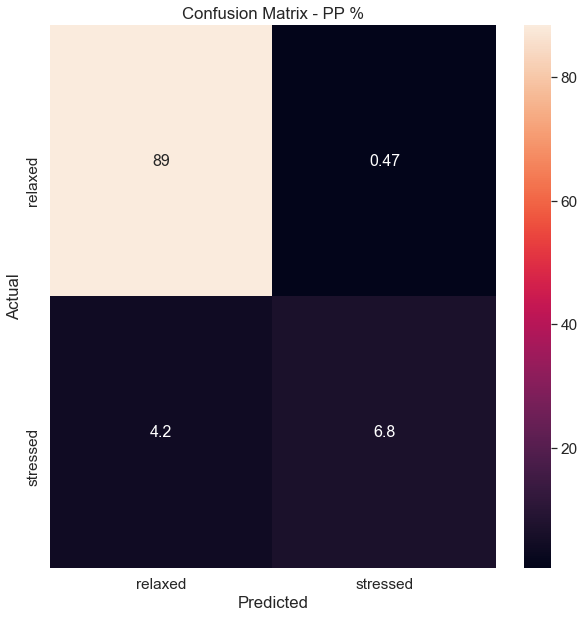

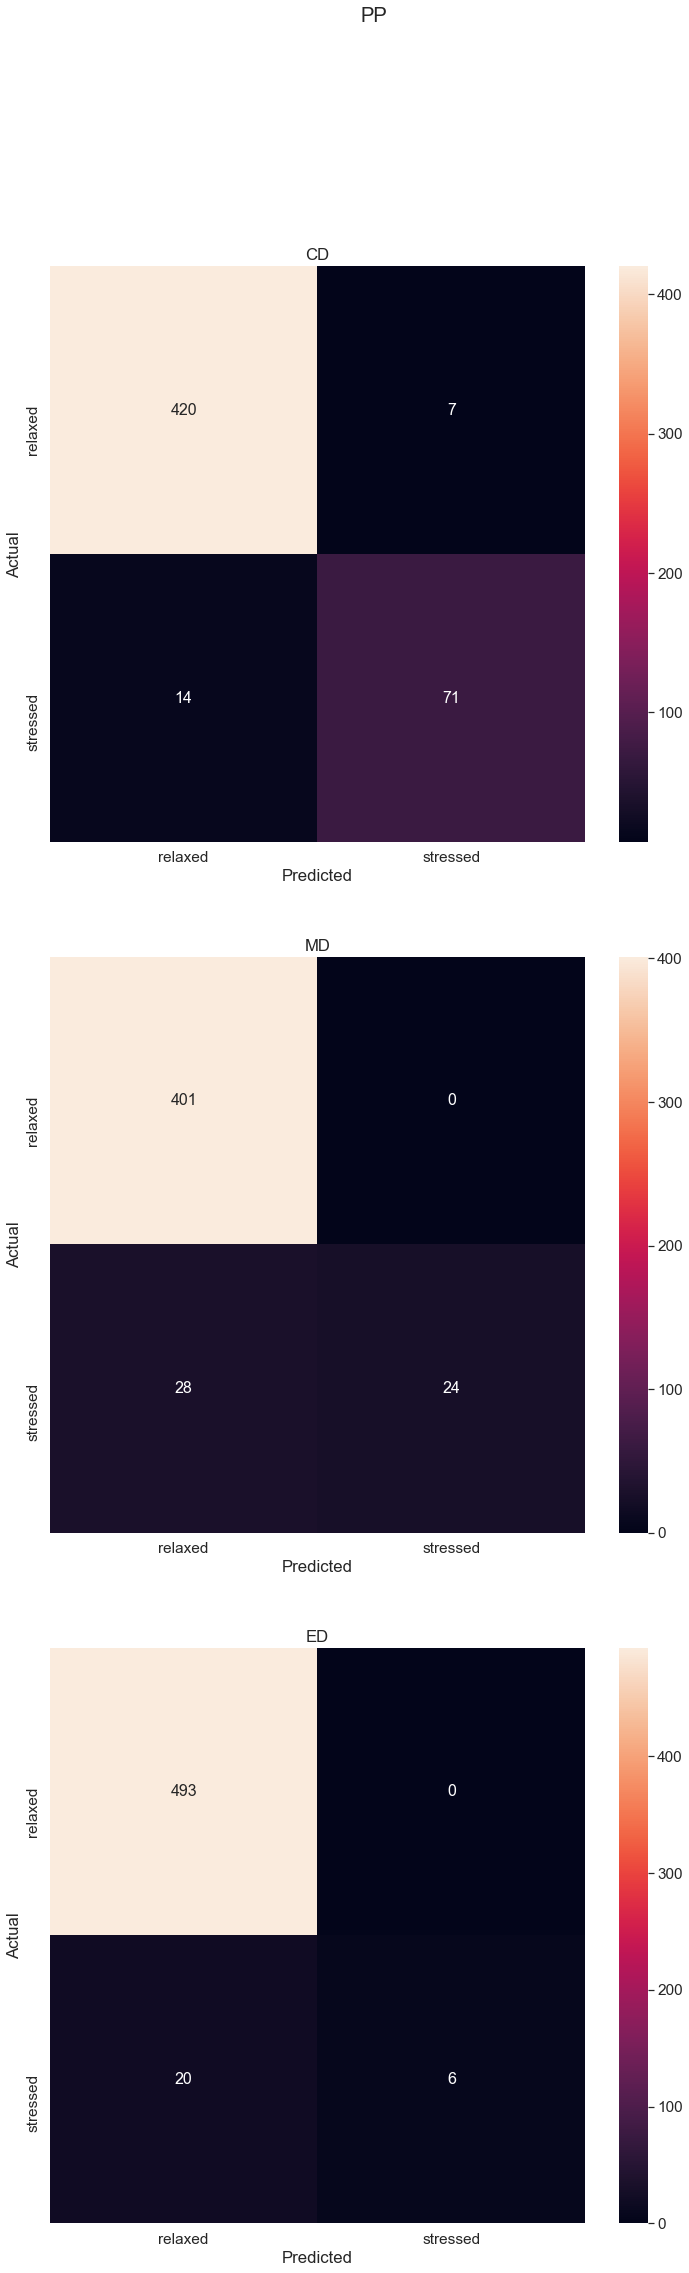

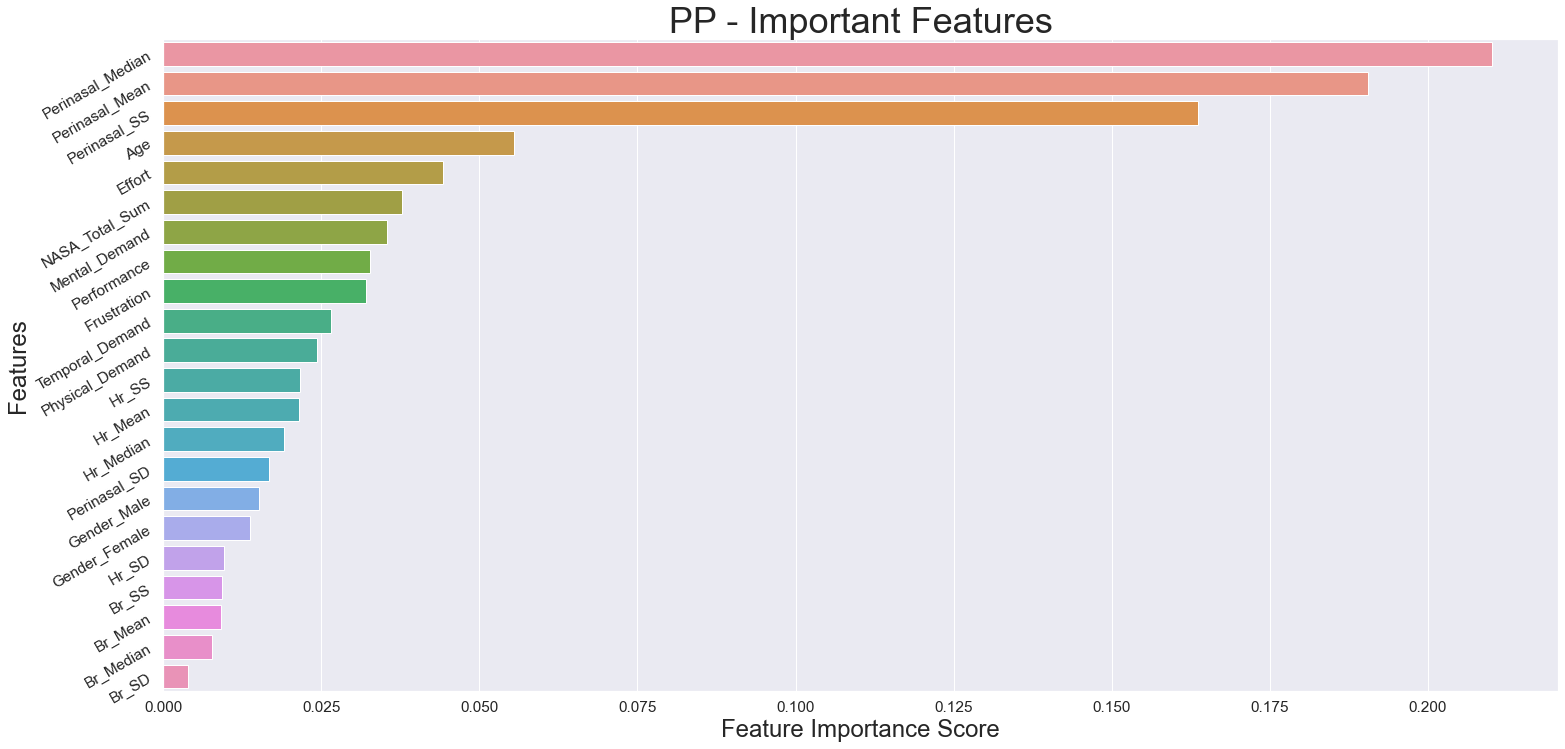

      0    1
0  1317    4
1    62  101


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


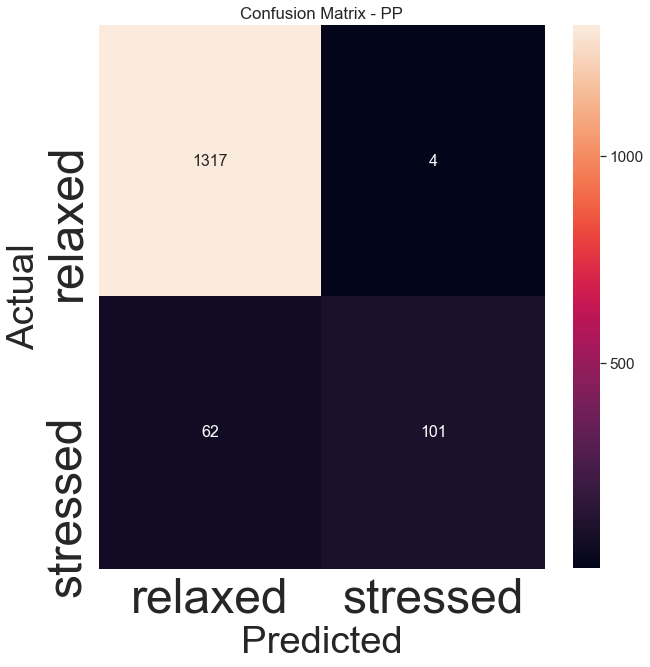

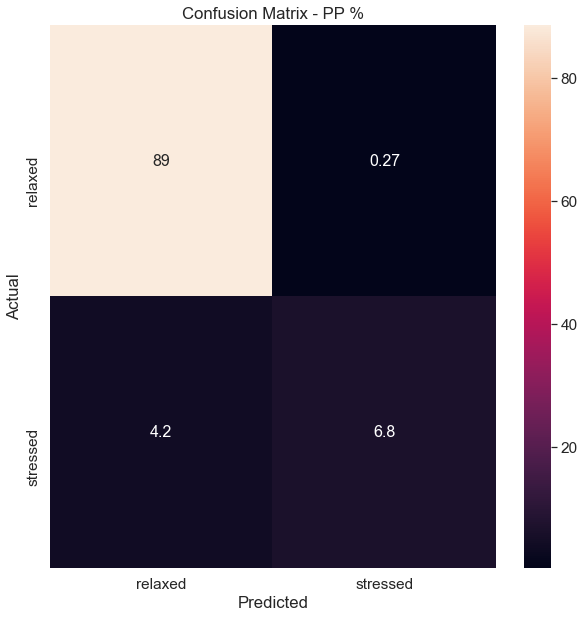

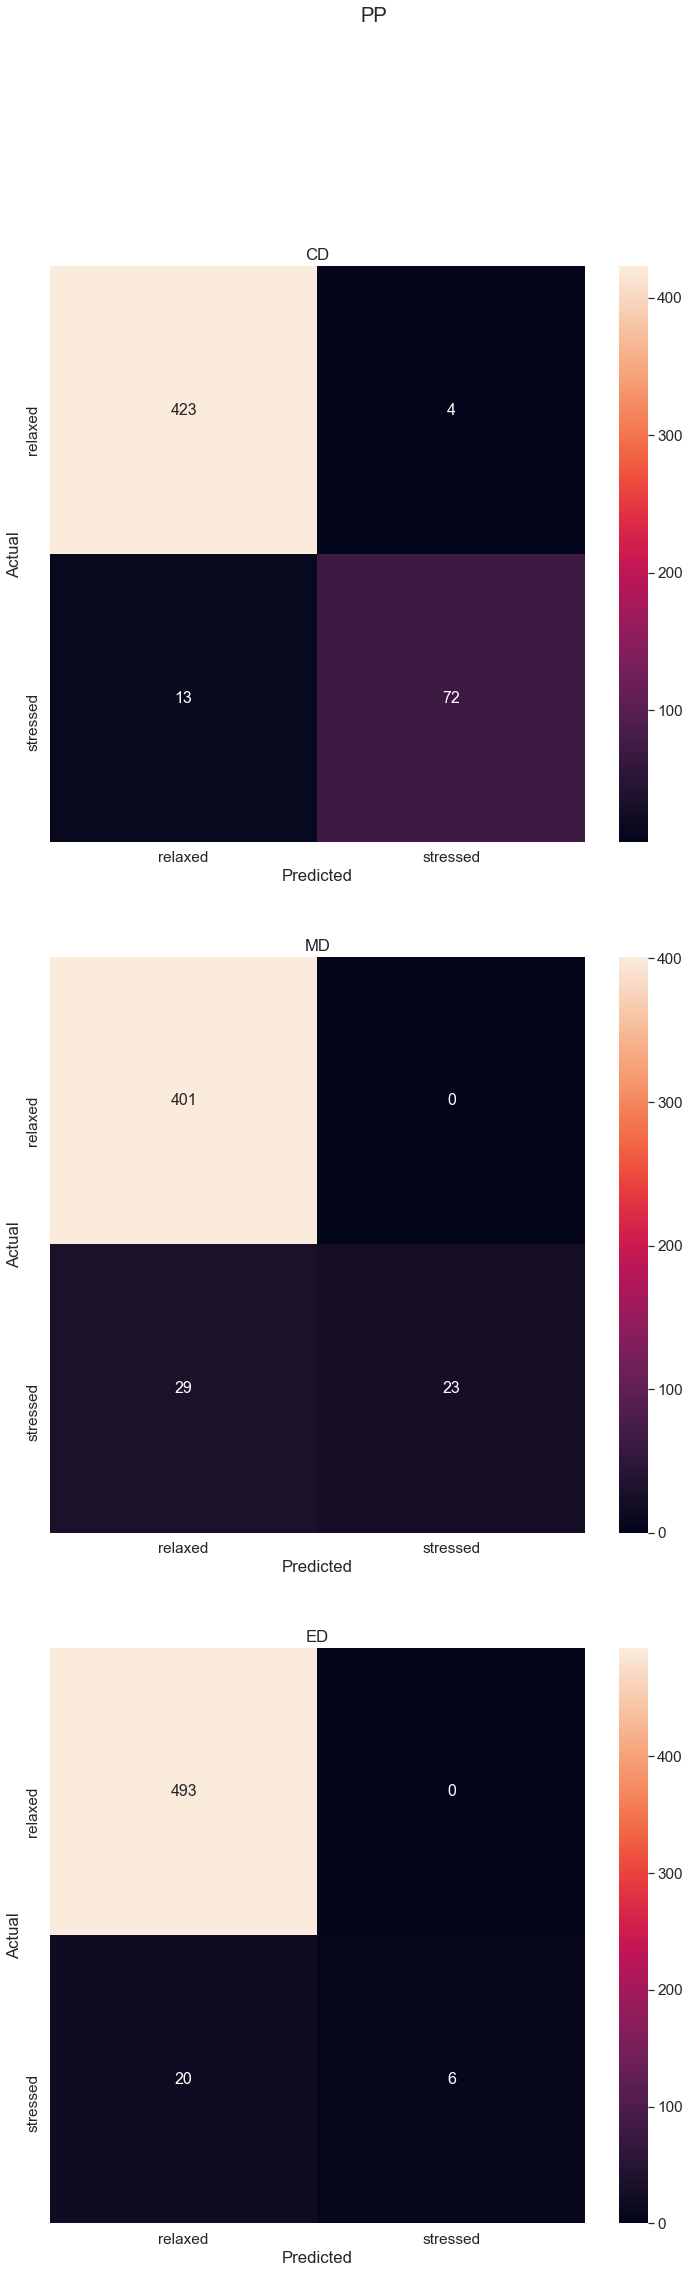

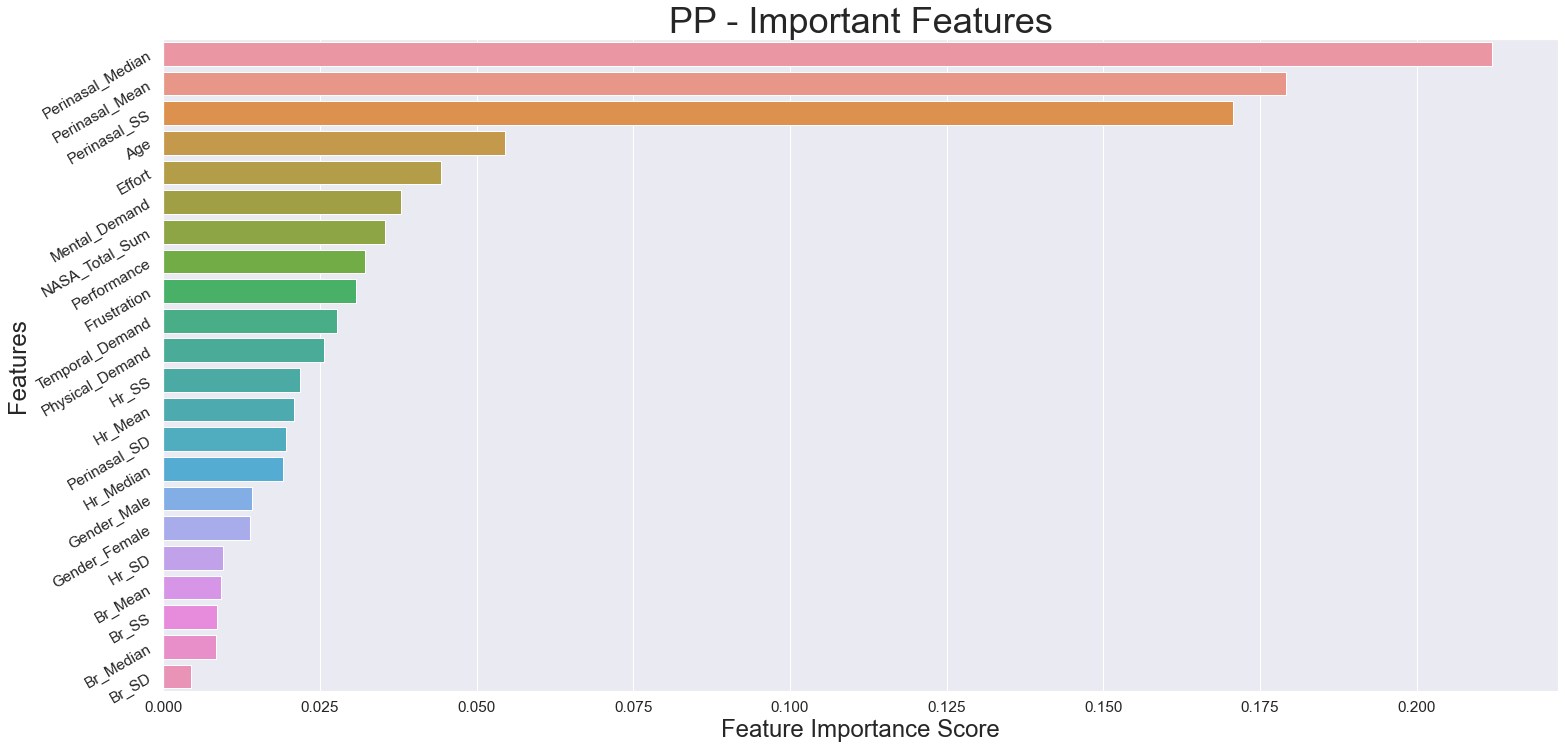

      0    1
0  1315    6
1    59  104


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


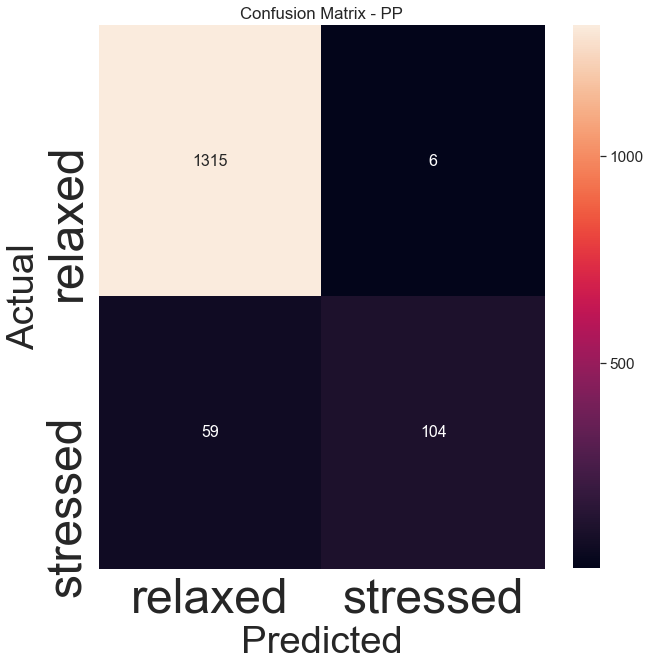

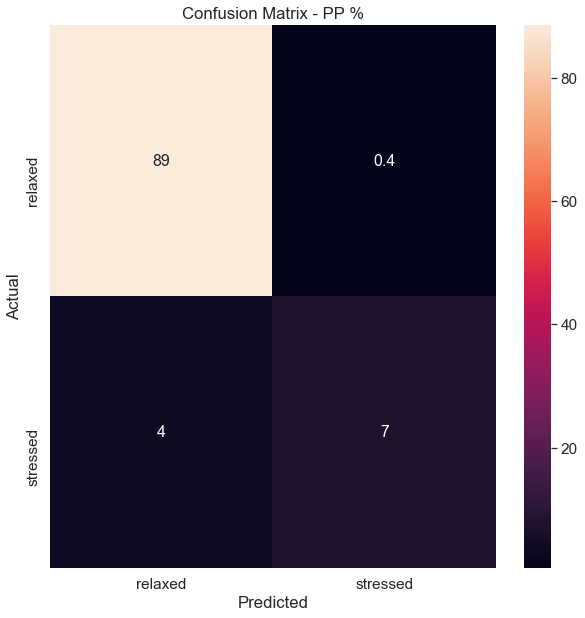

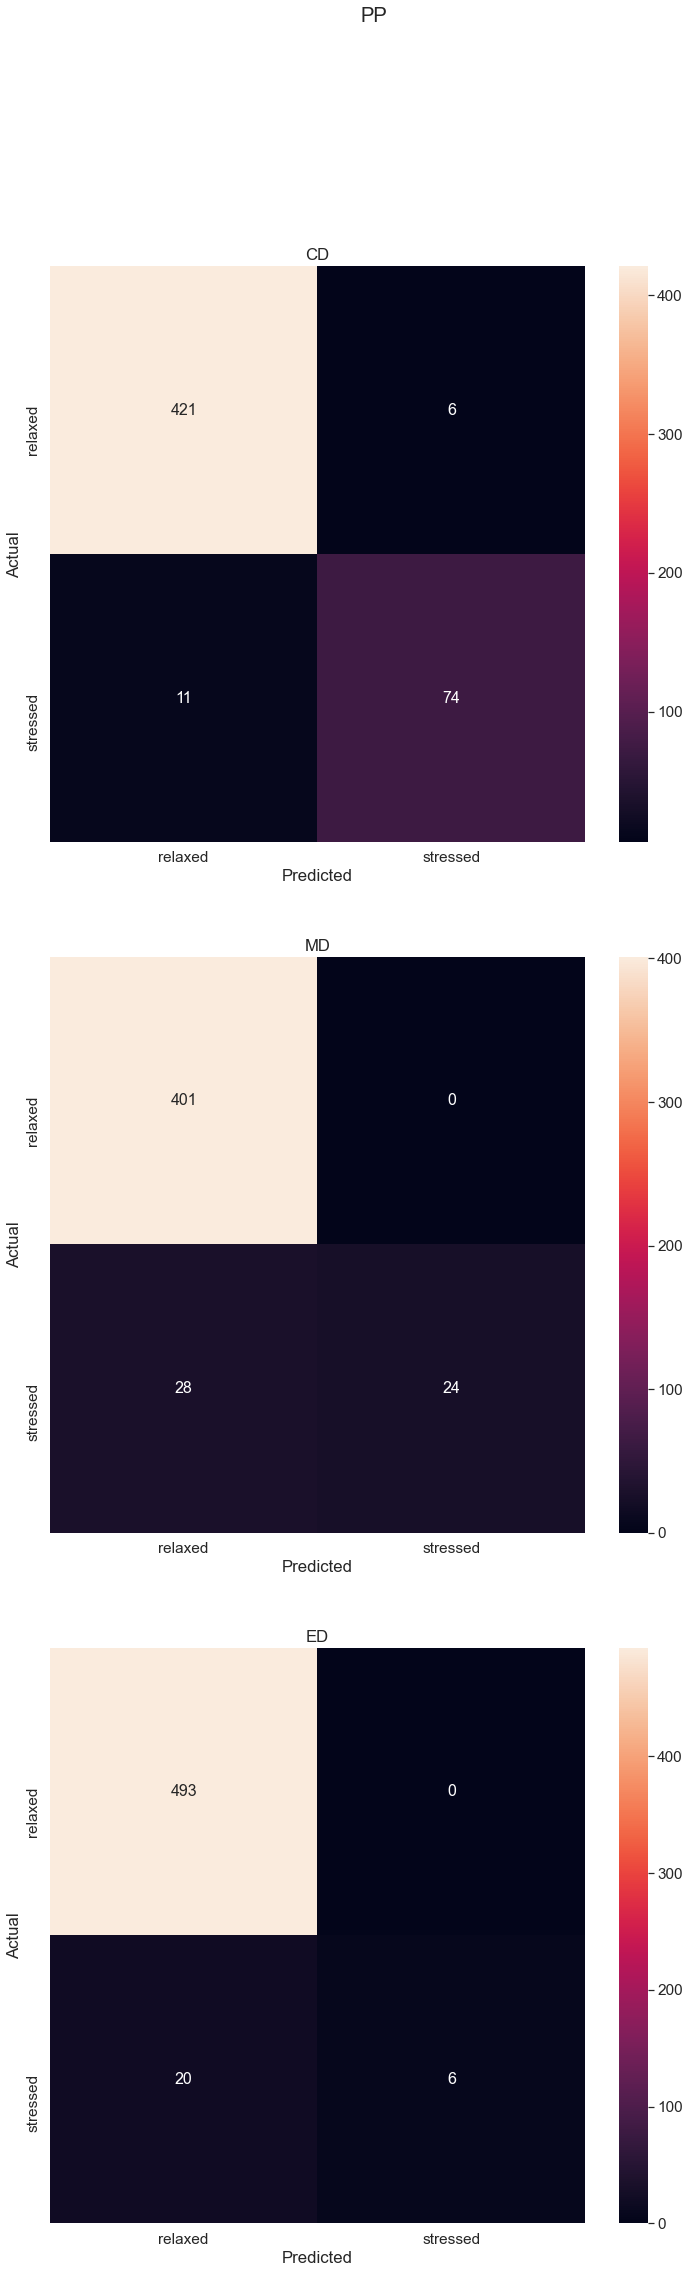

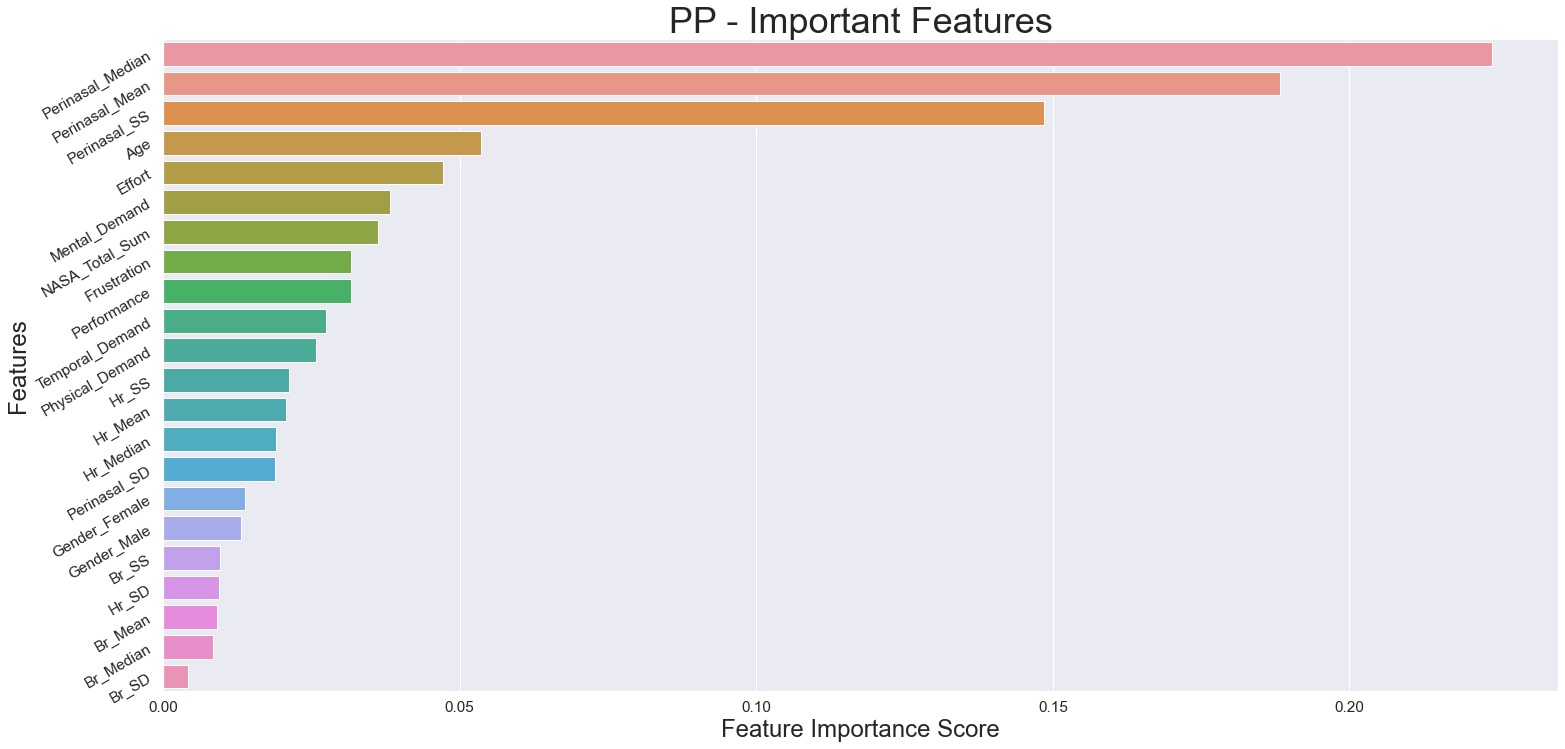

      0   1
0  1317   4
1    65  98


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


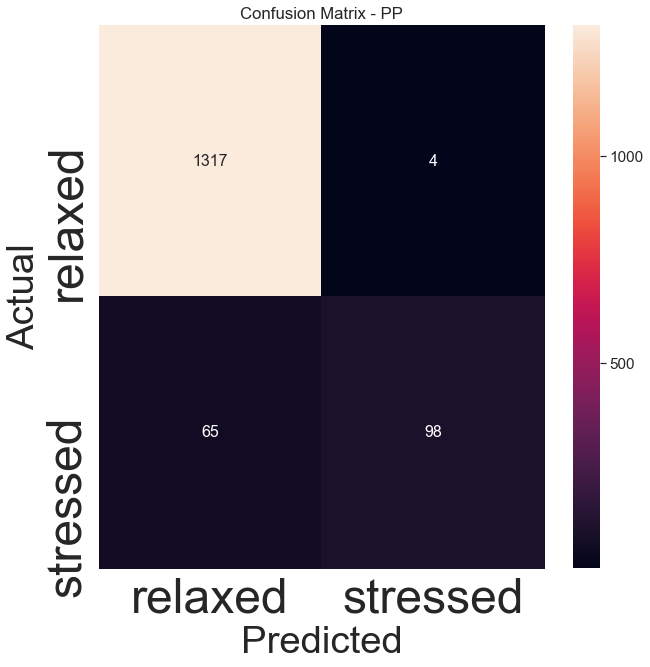

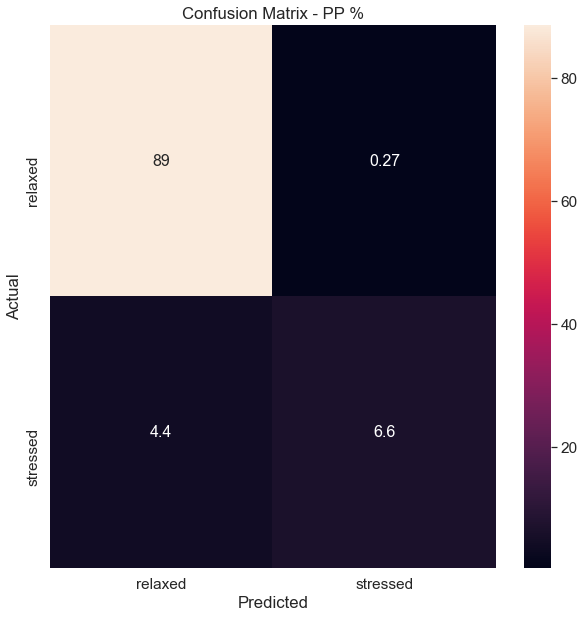

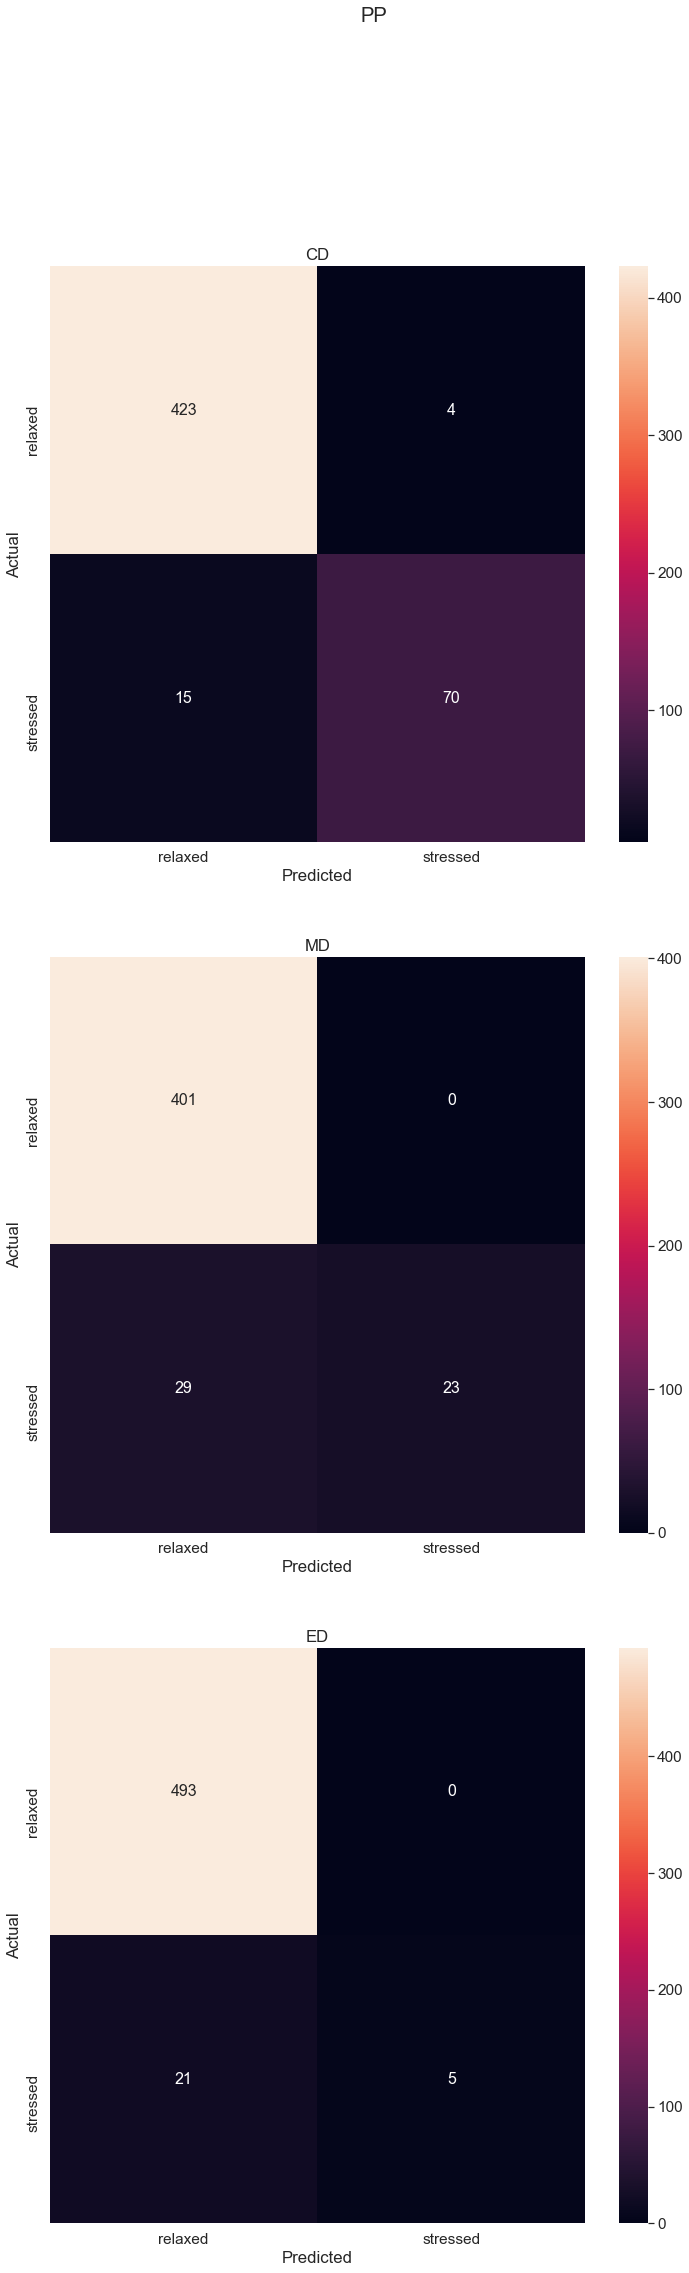

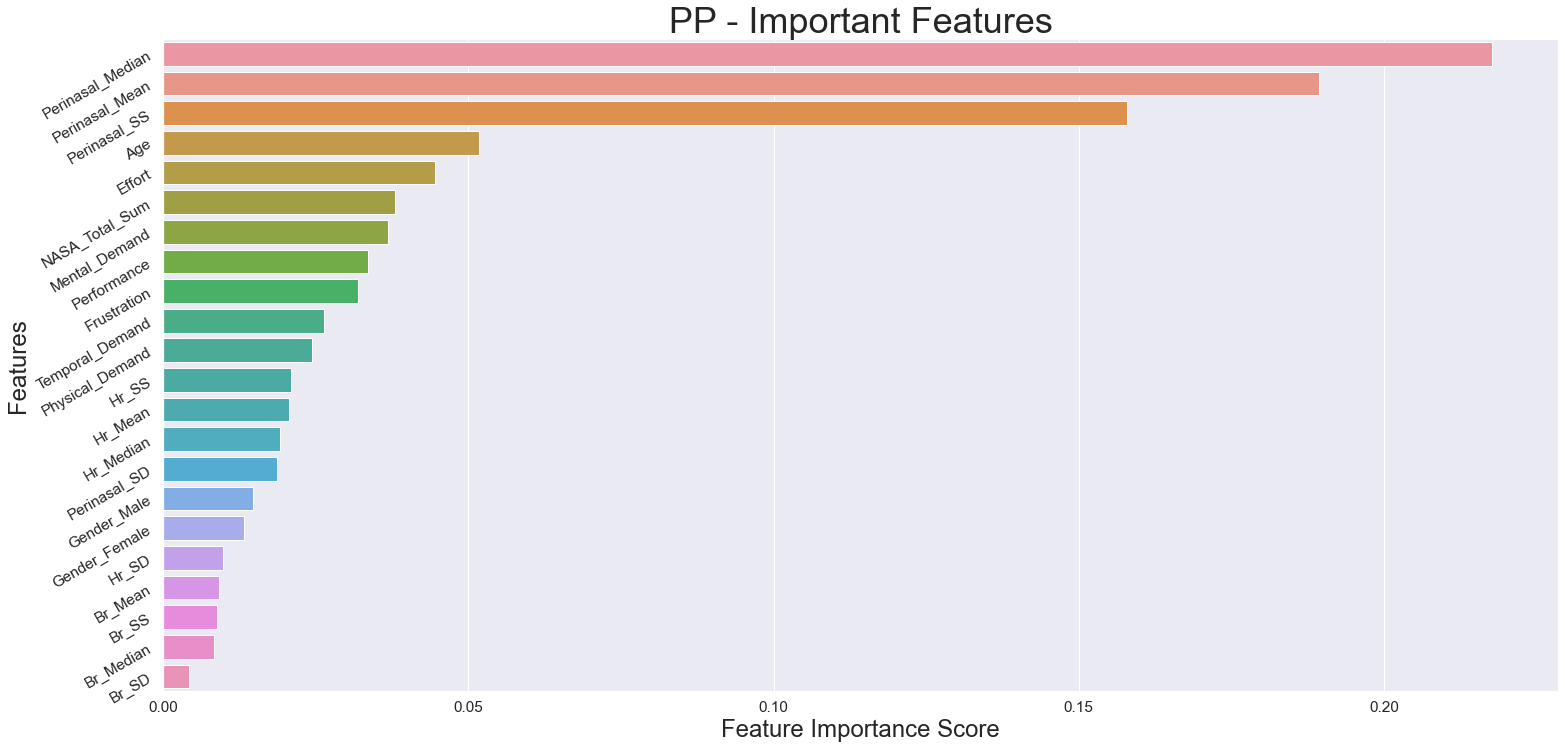

      0    1
0  1318    3
1    61  102


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


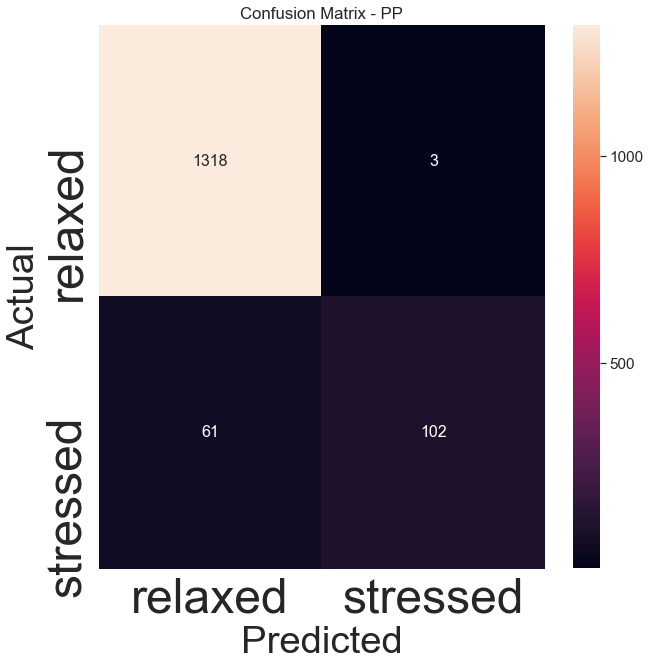

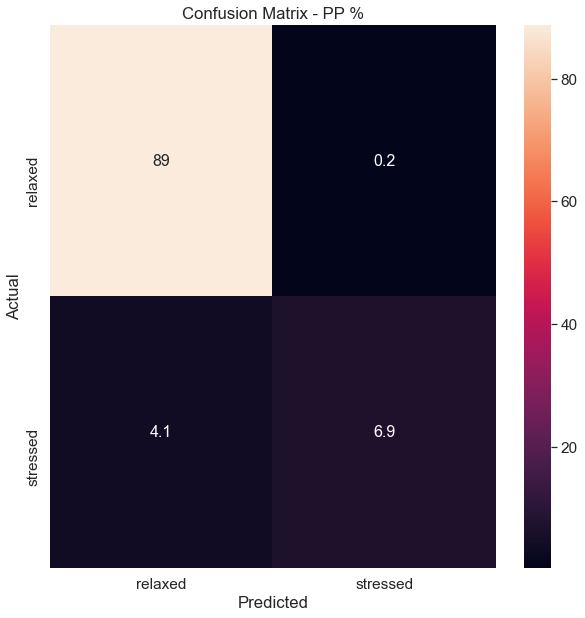

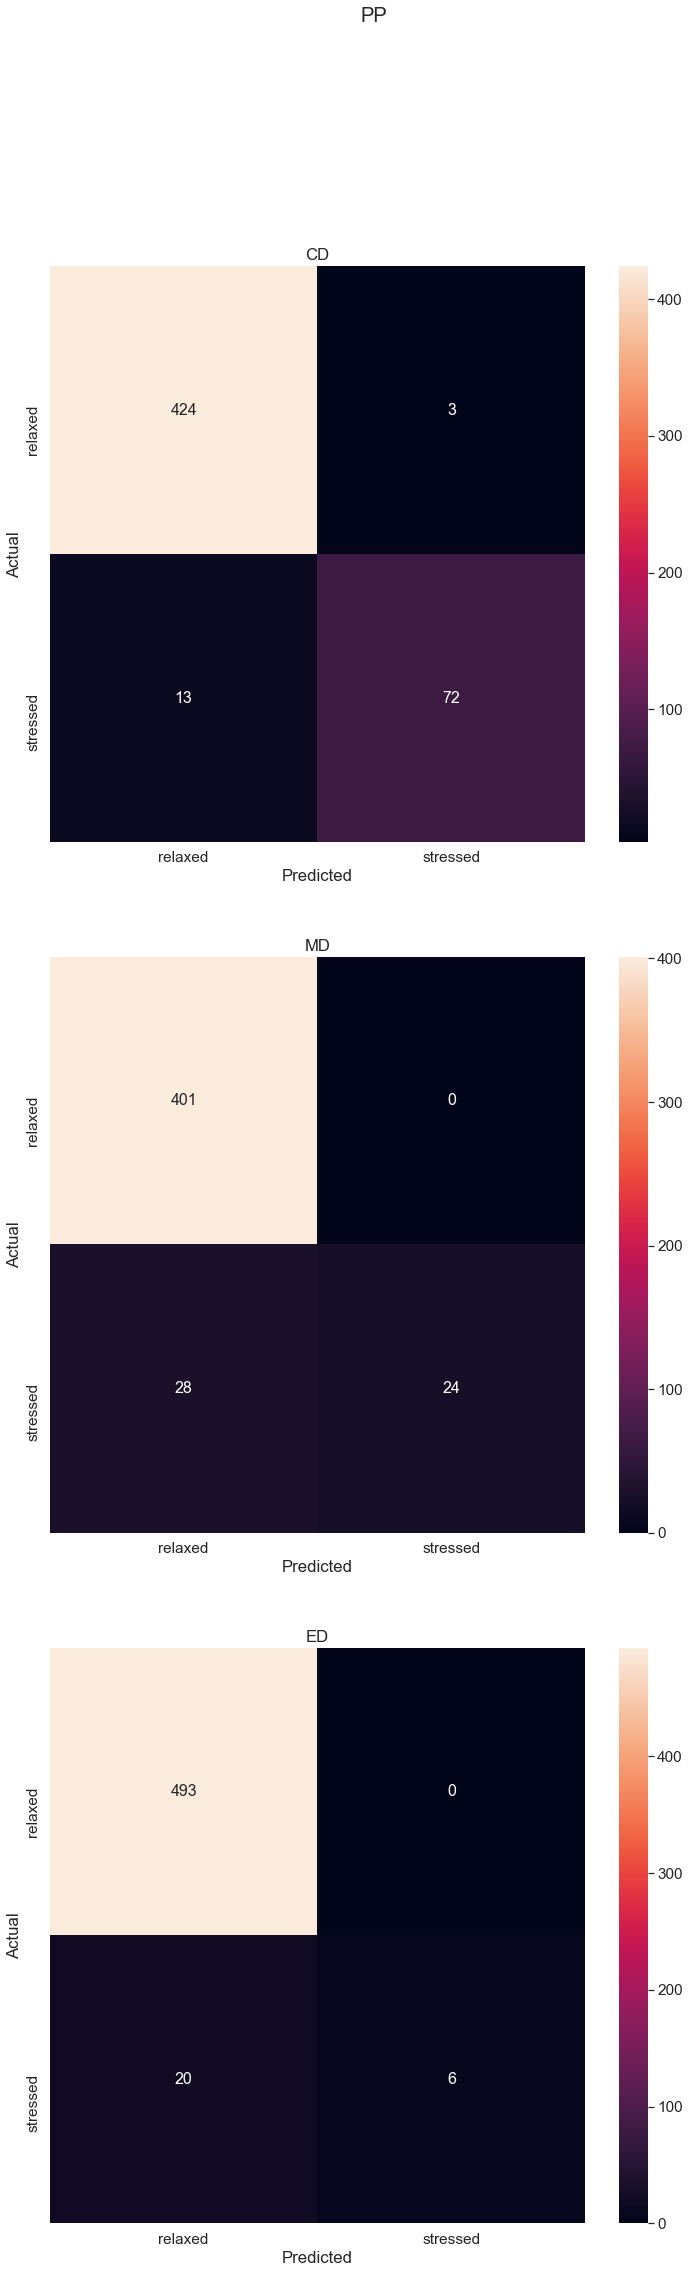

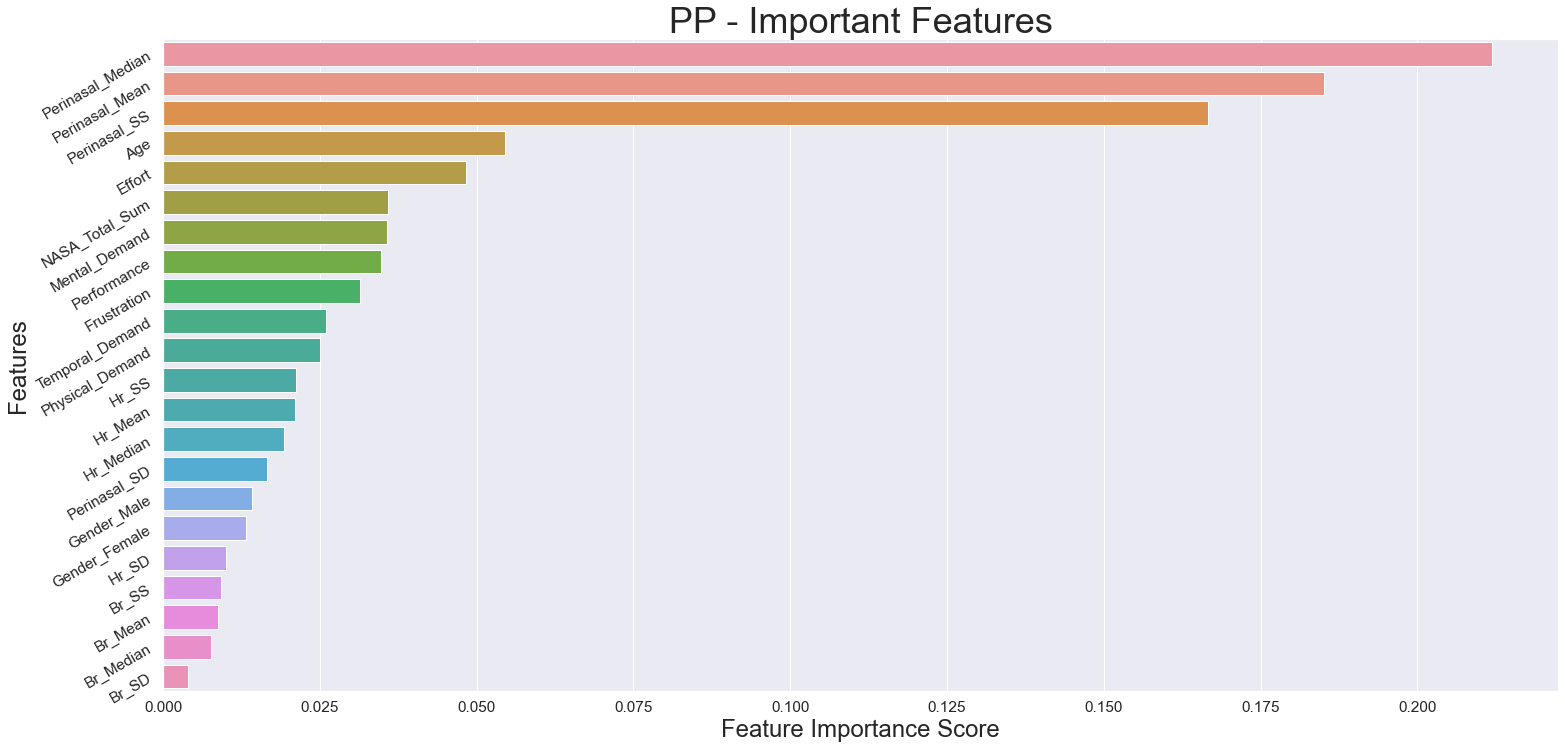

      0    1
0  1312    9
1    63  100


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


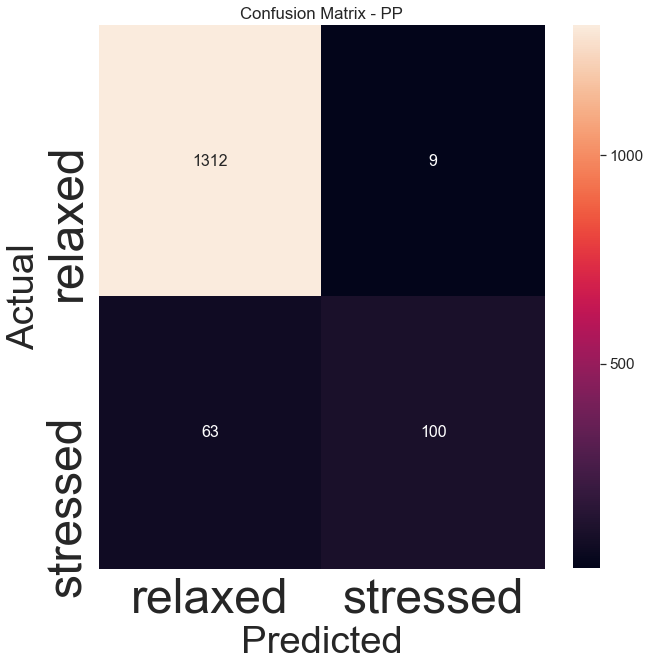

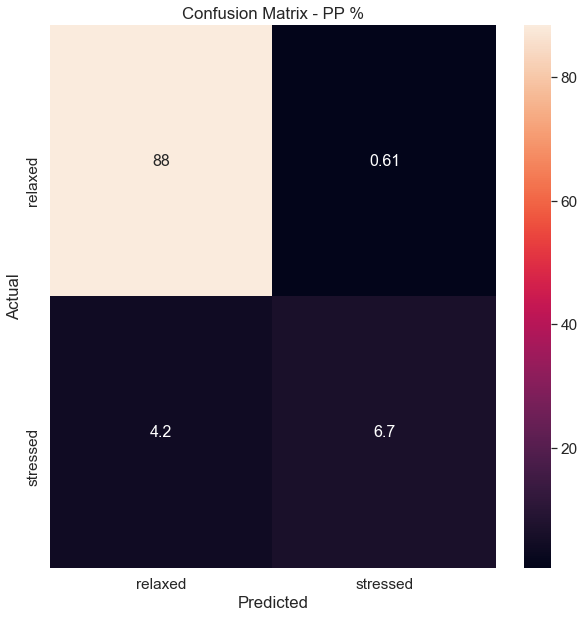

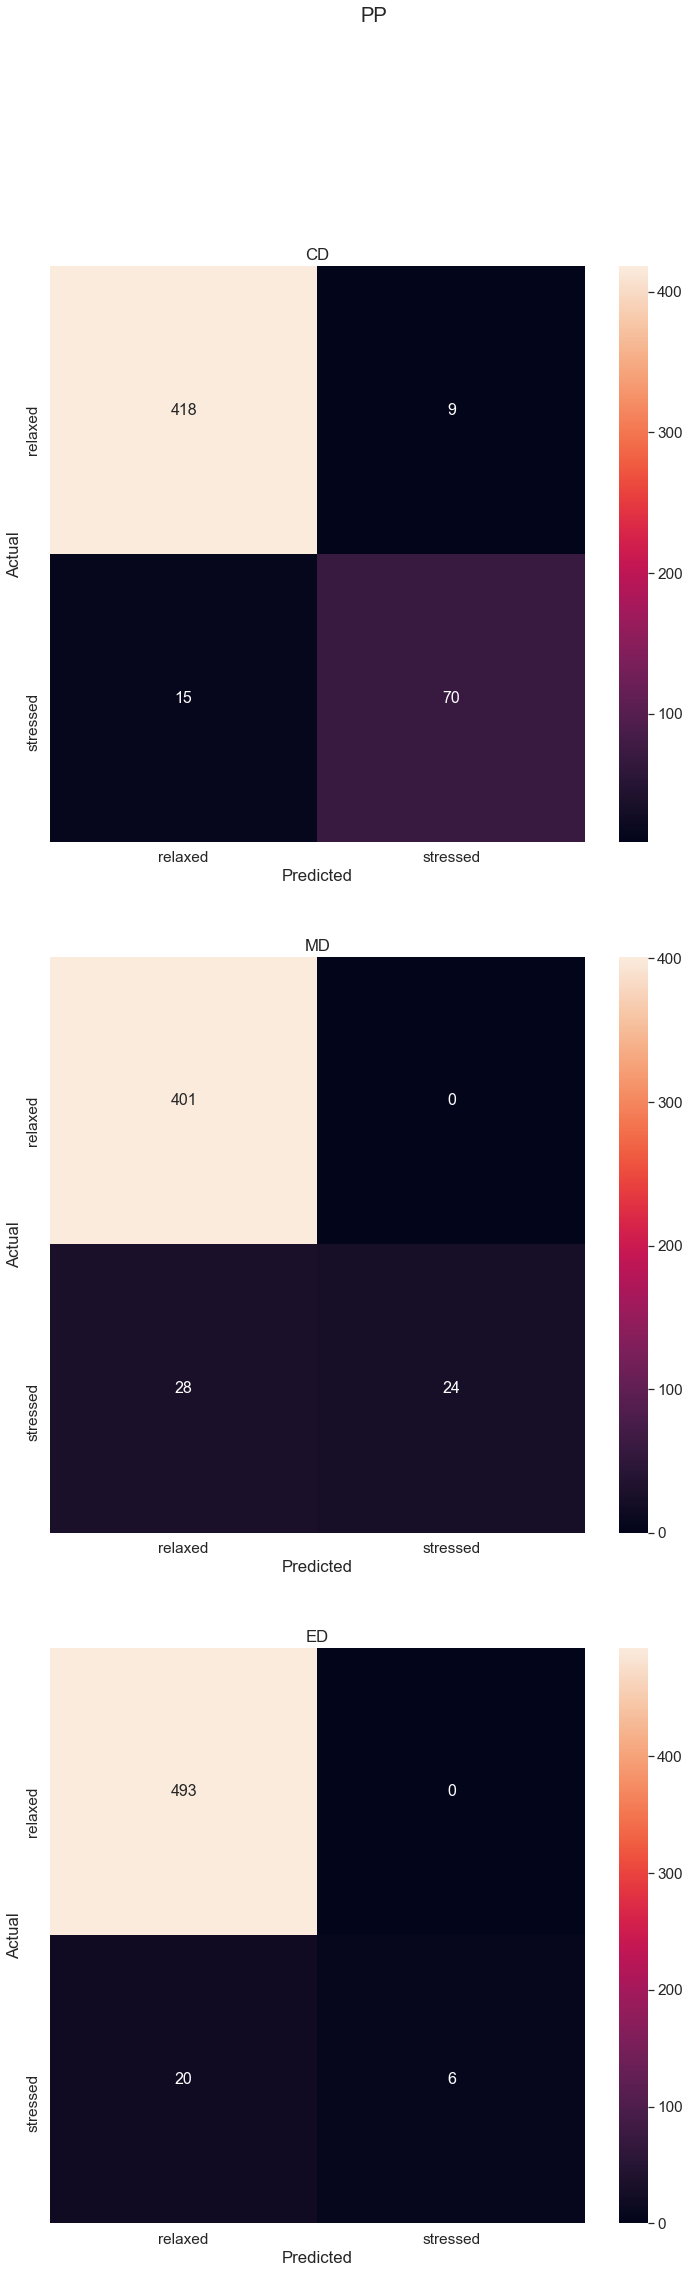

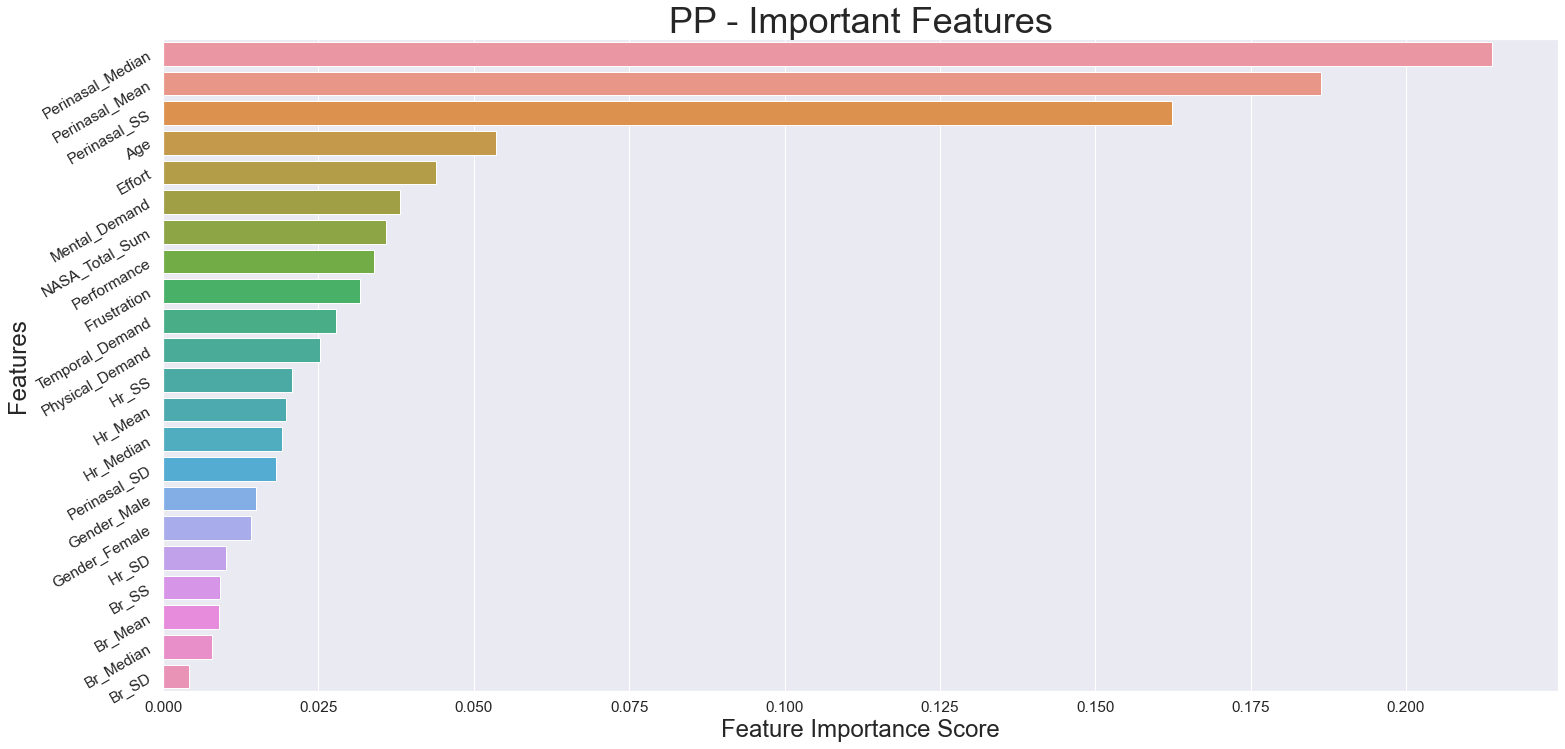

      0    1
0  1315    6
1    63  100


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


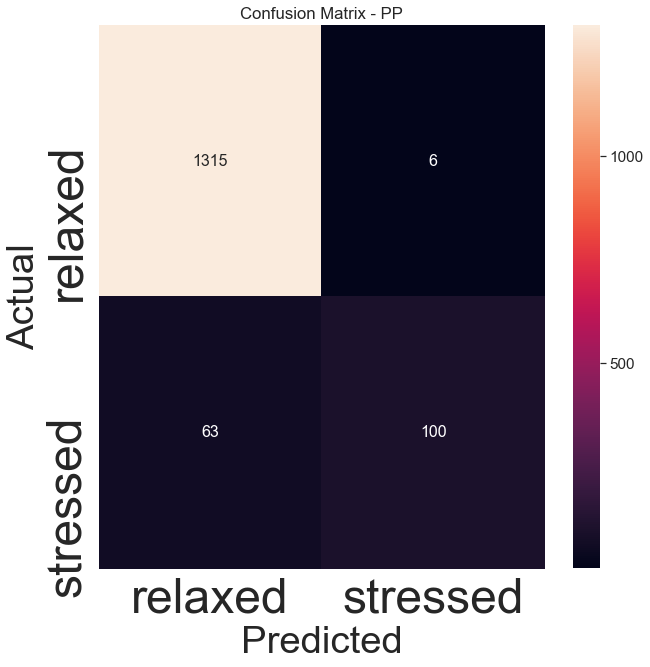

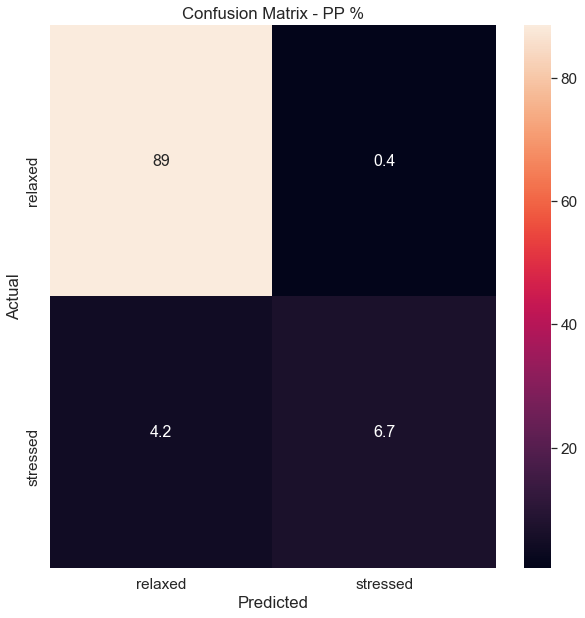

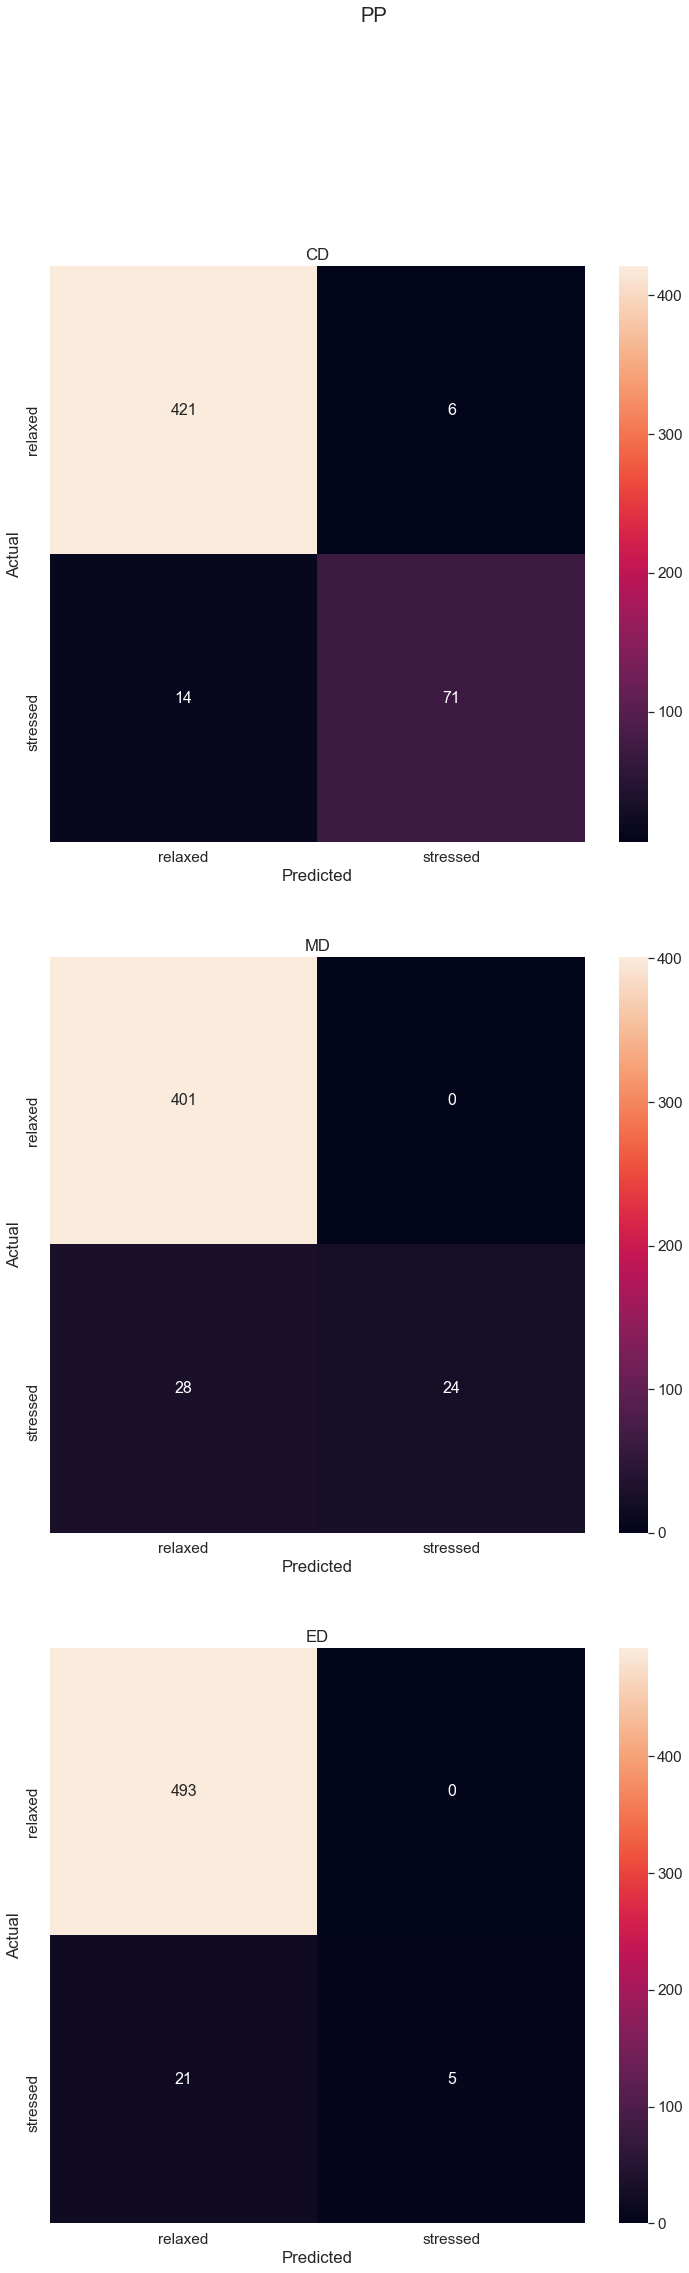

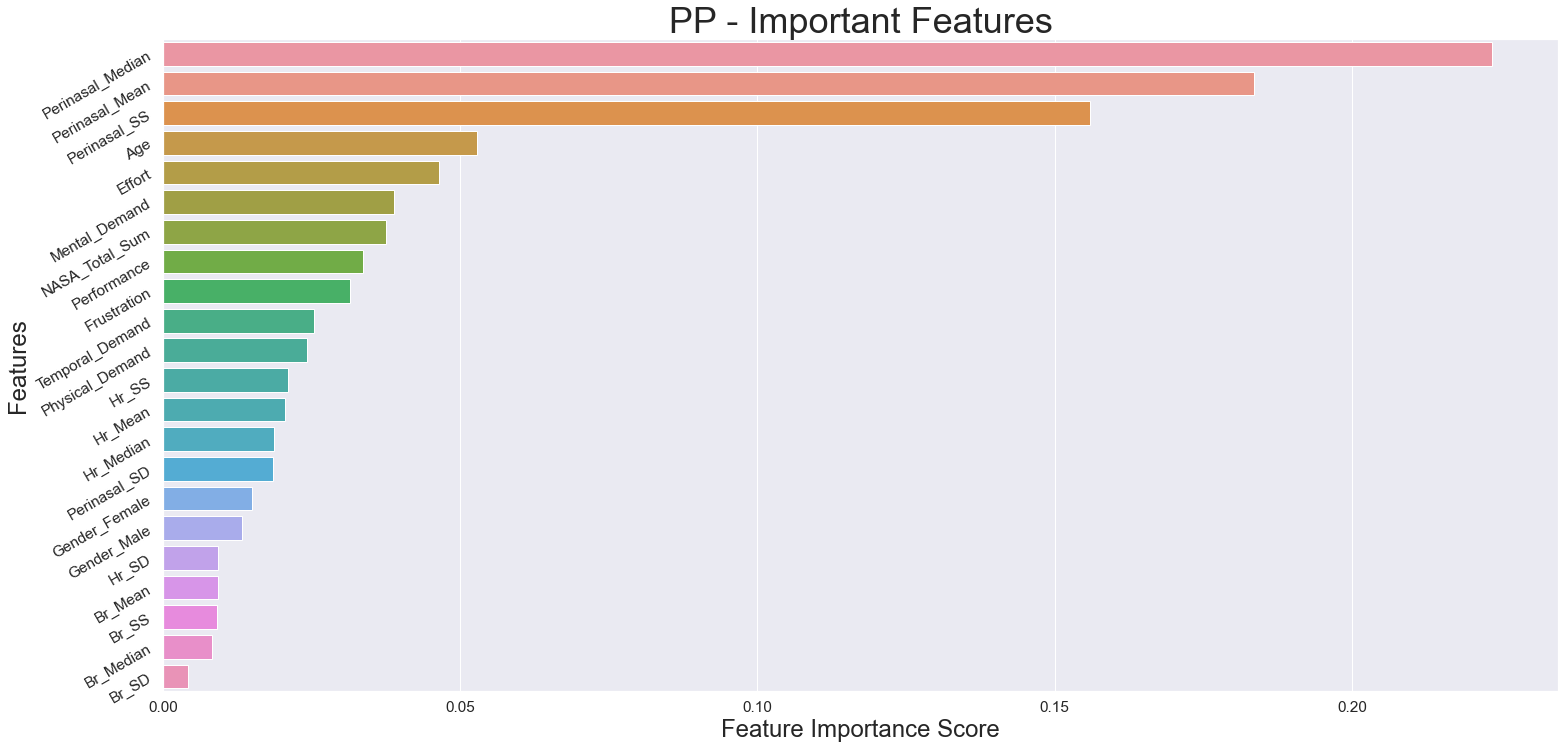

      0   1
0  1316   5
1    66  97


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


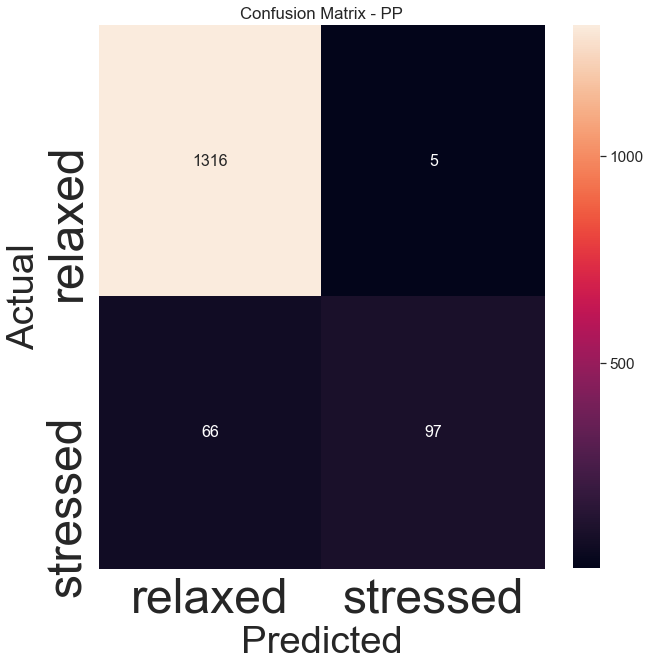

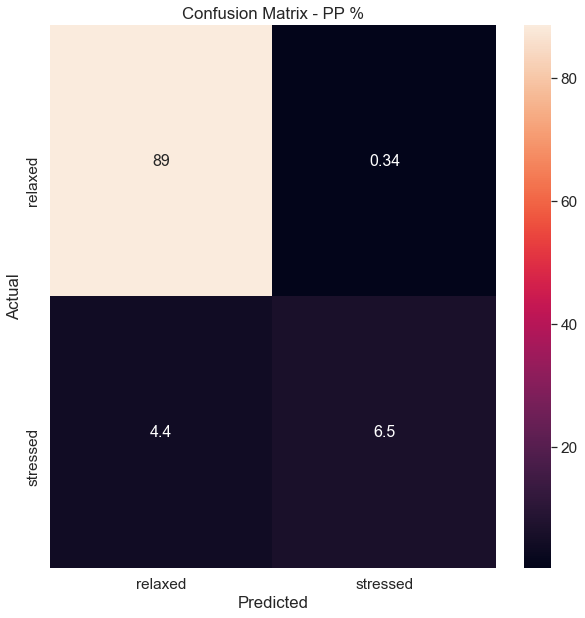

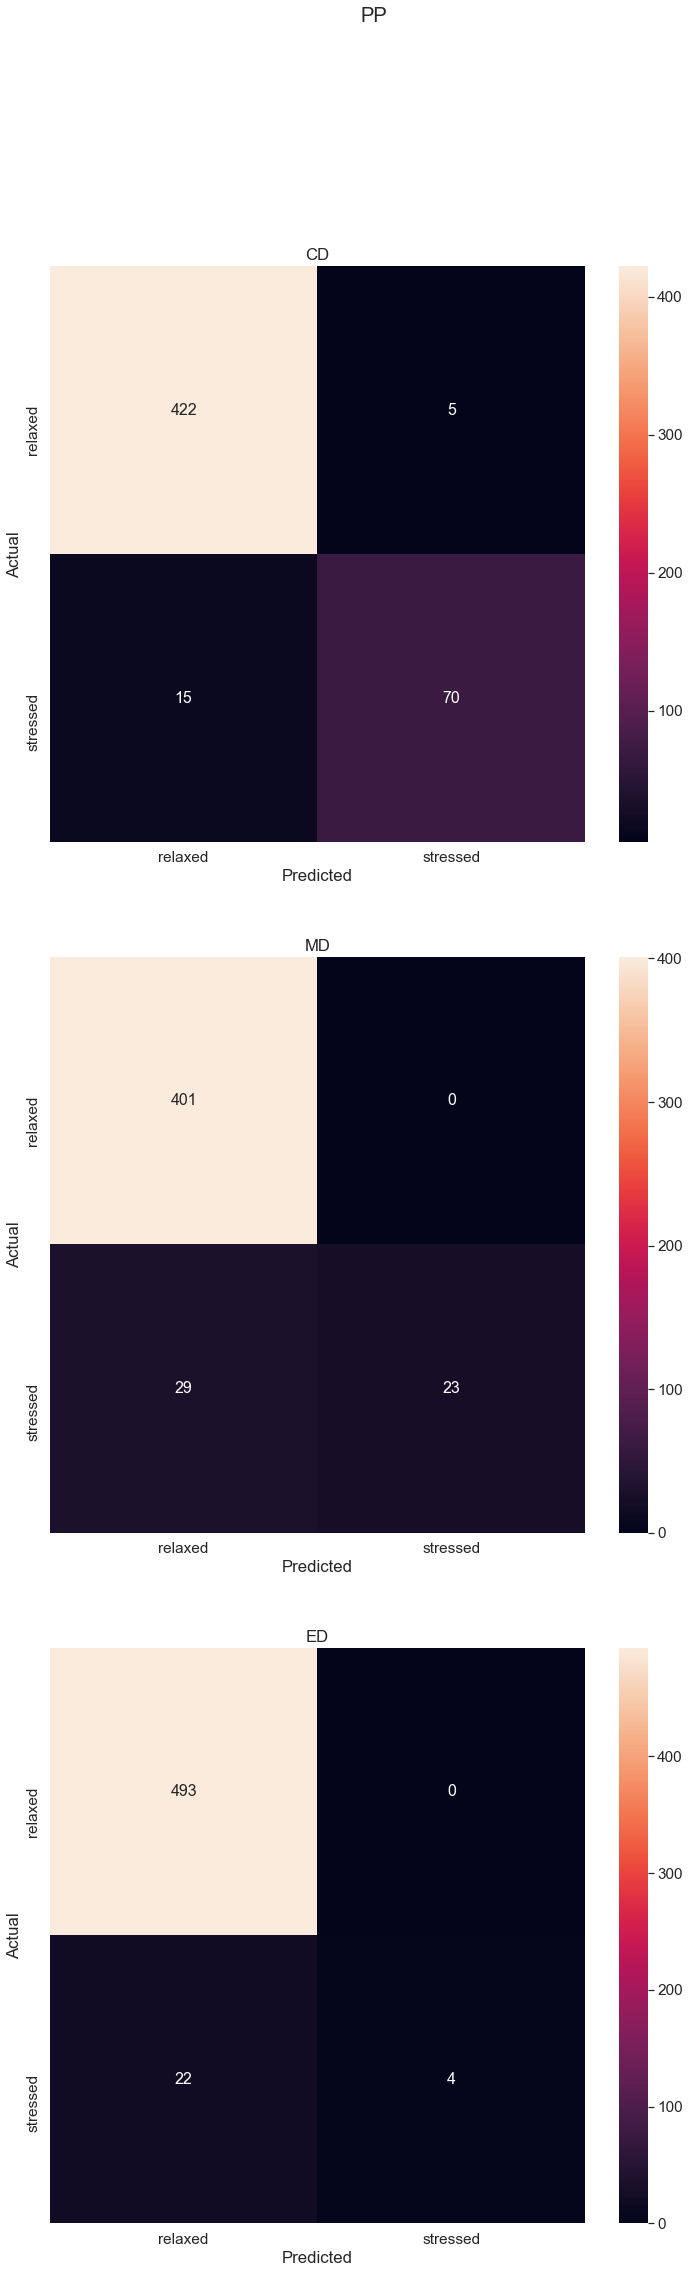

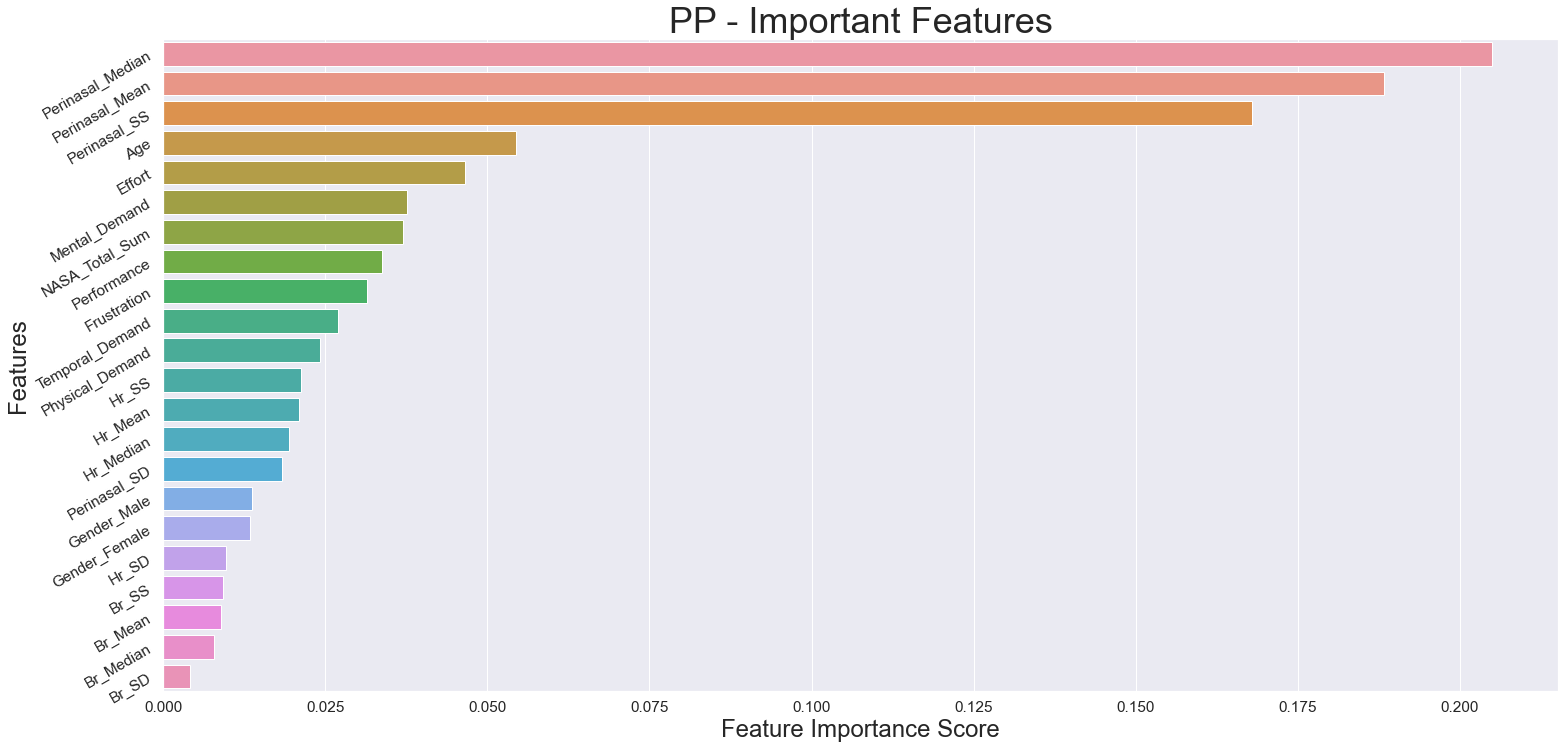

      0   1
0  1318   3
1    65  98


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


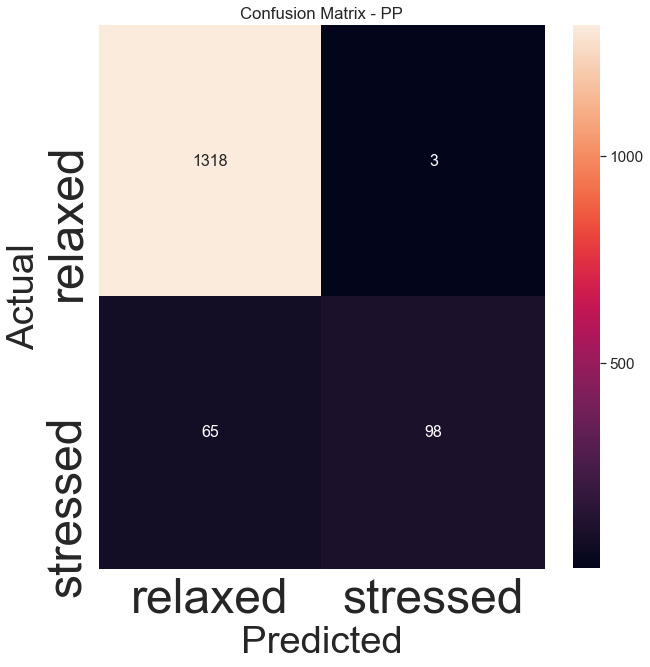

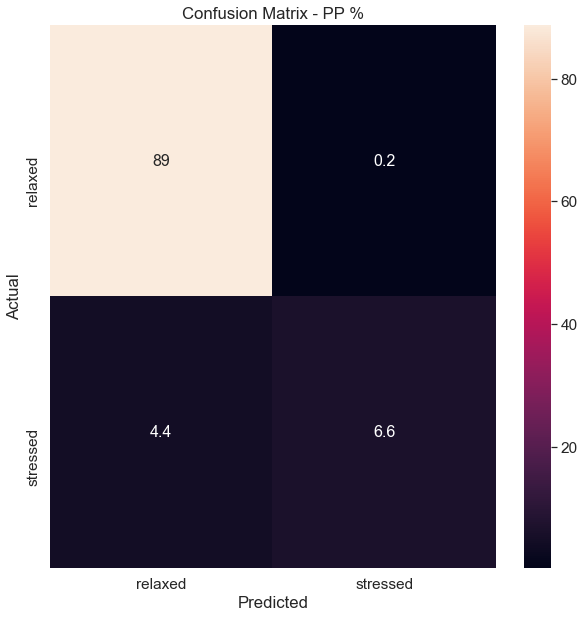

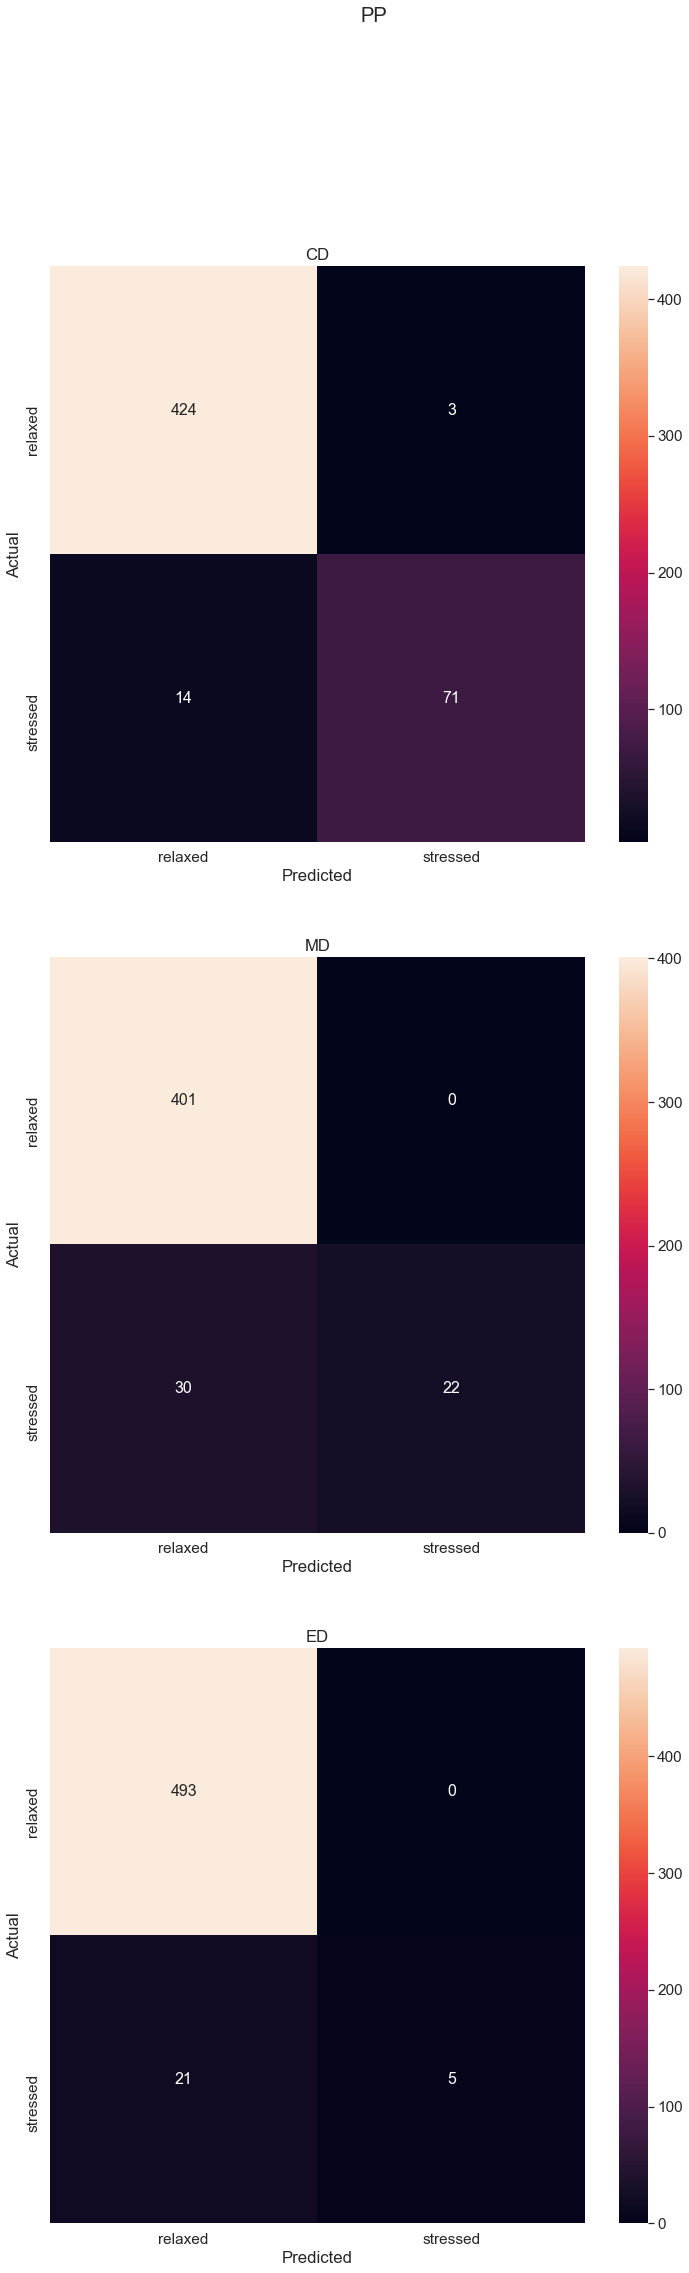

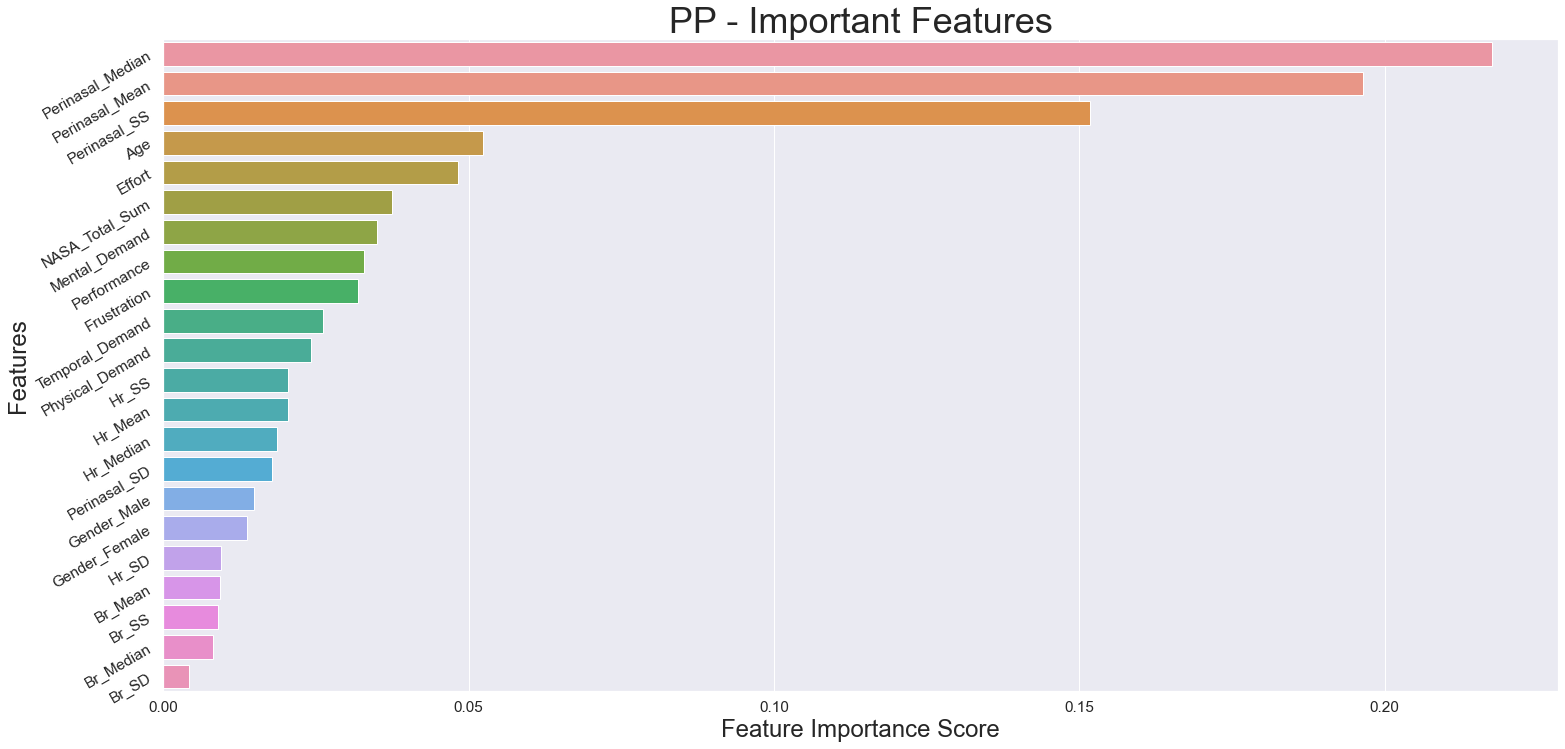

      0    1
0  1318    3
1    63  100


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


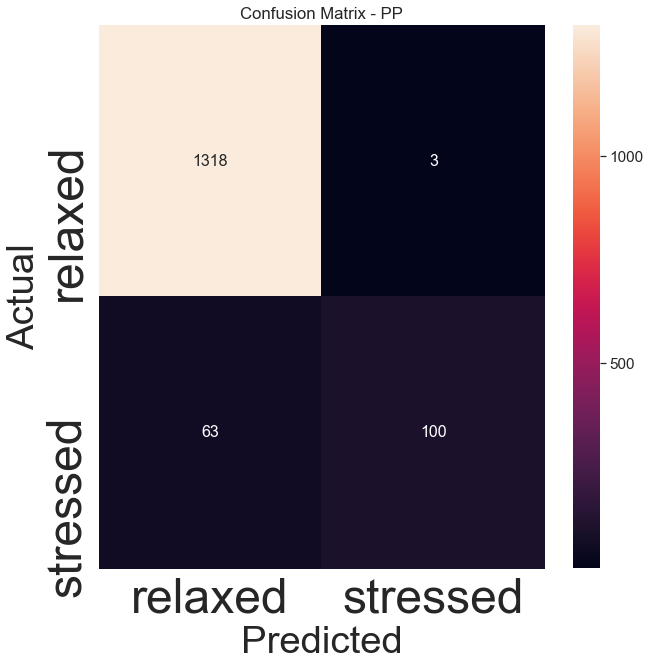

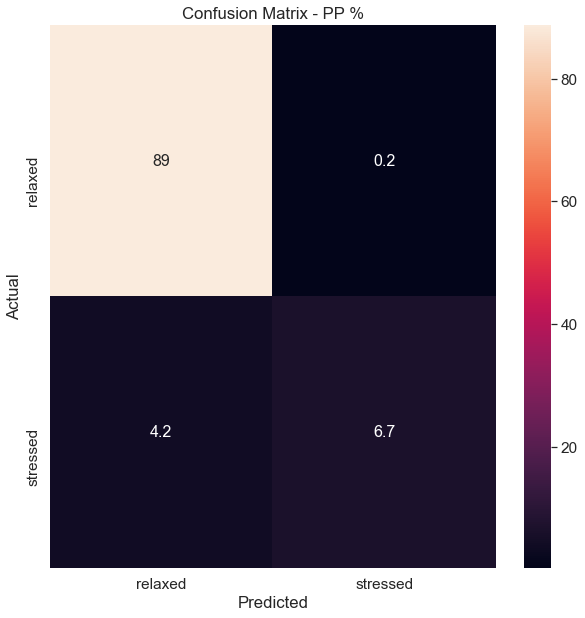

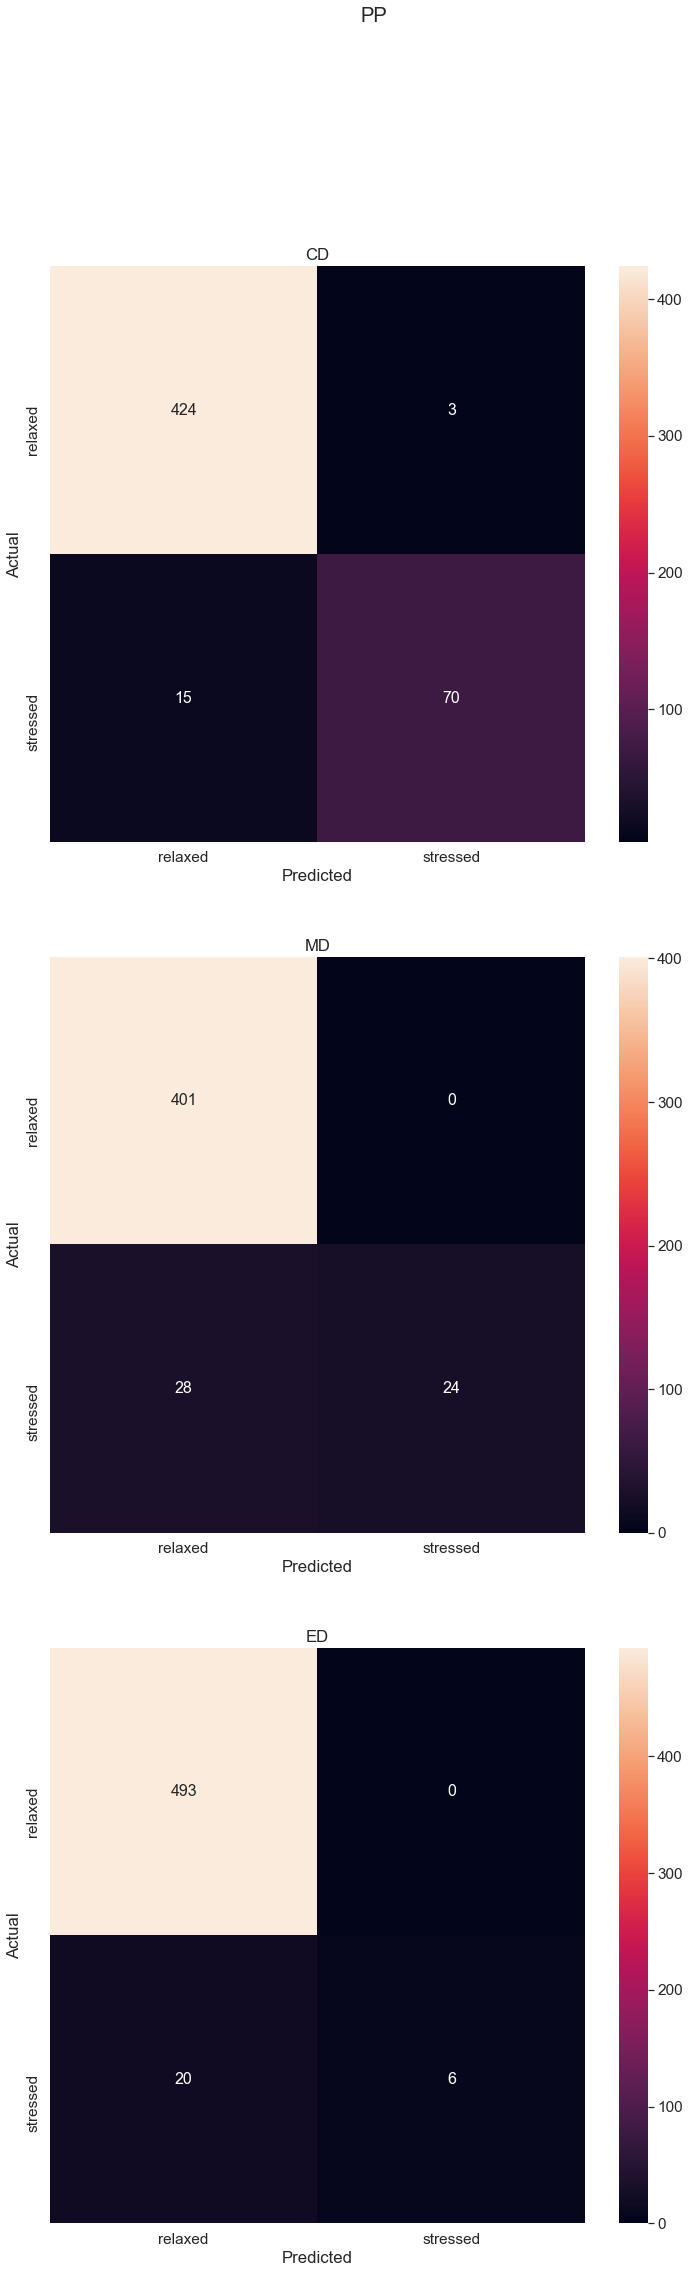

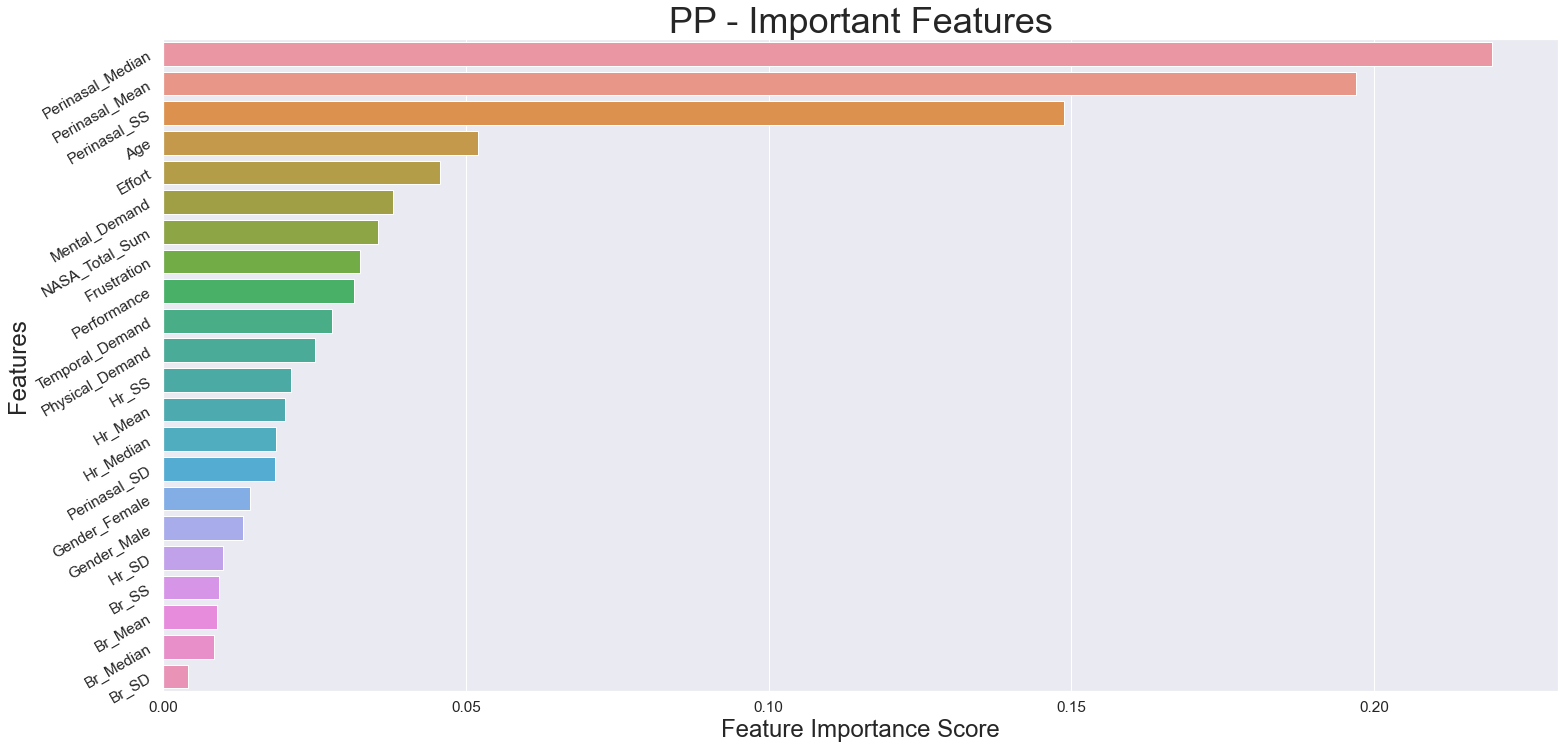

      0    1
0  1316    5
1    61  102


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


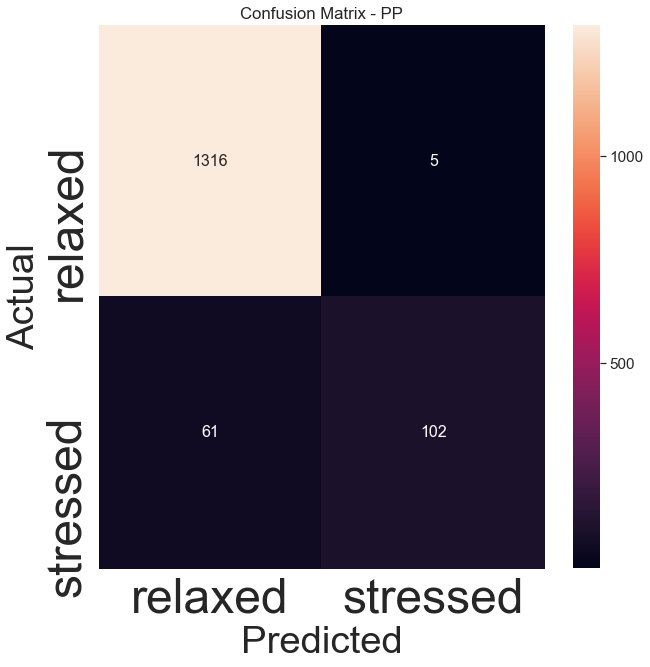

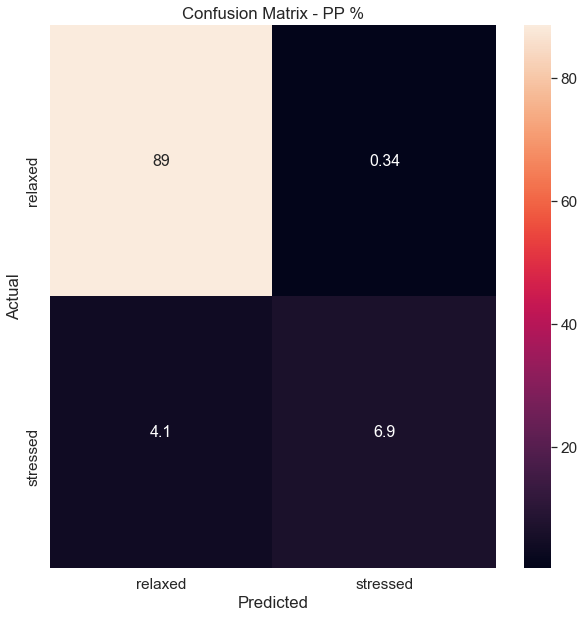

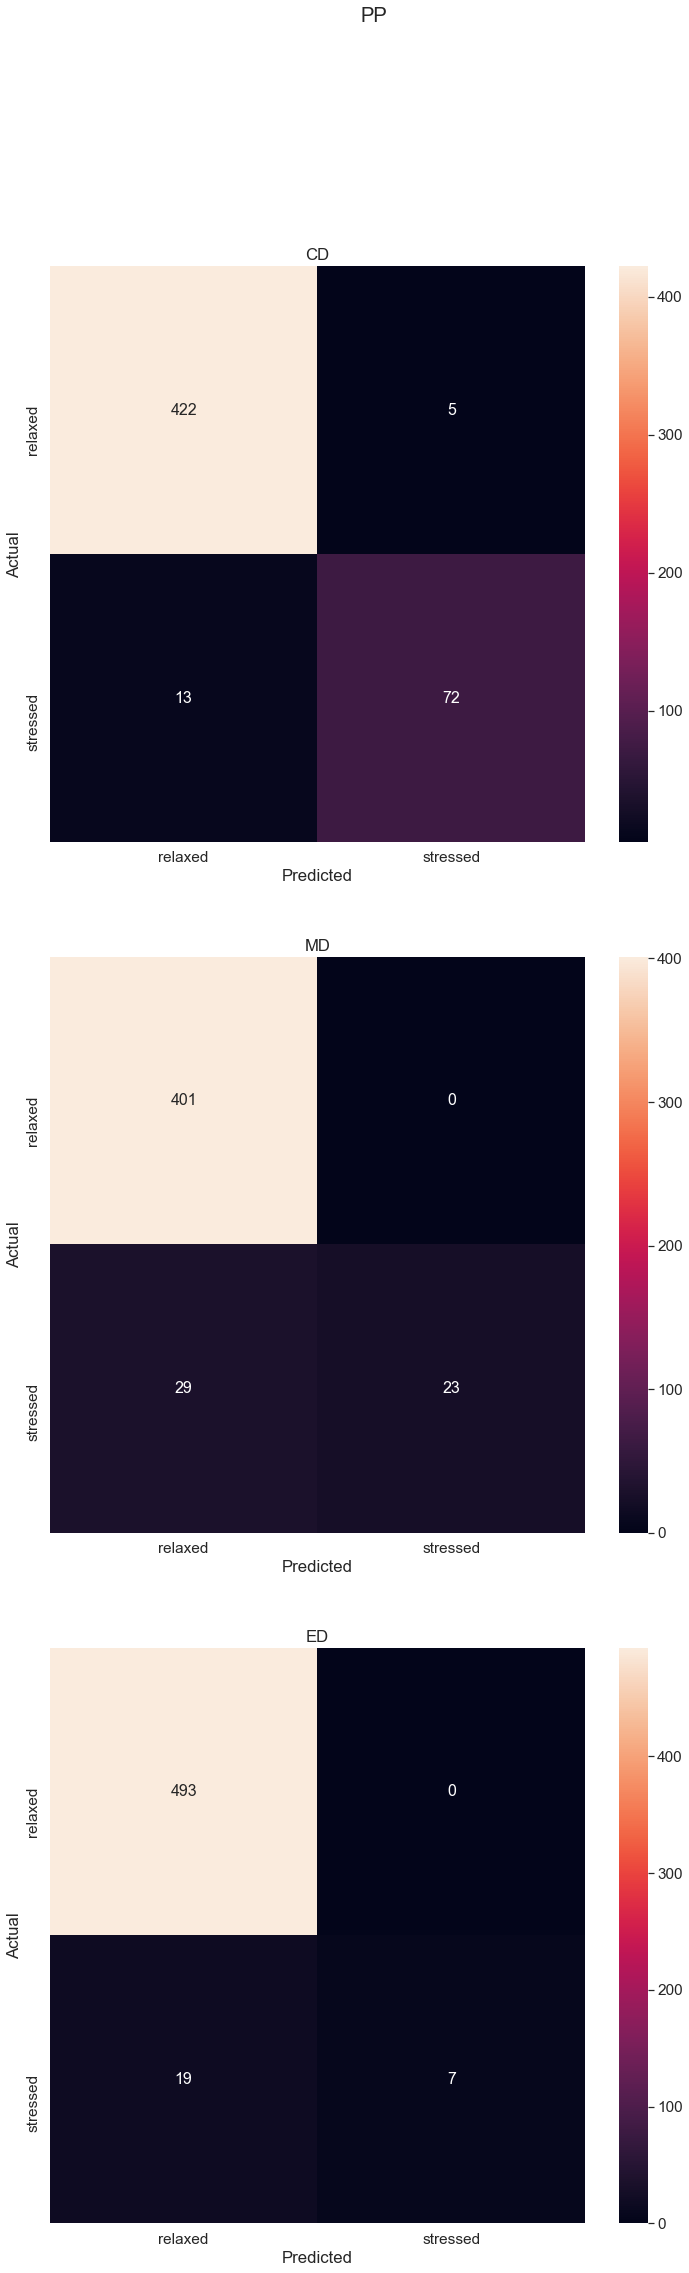

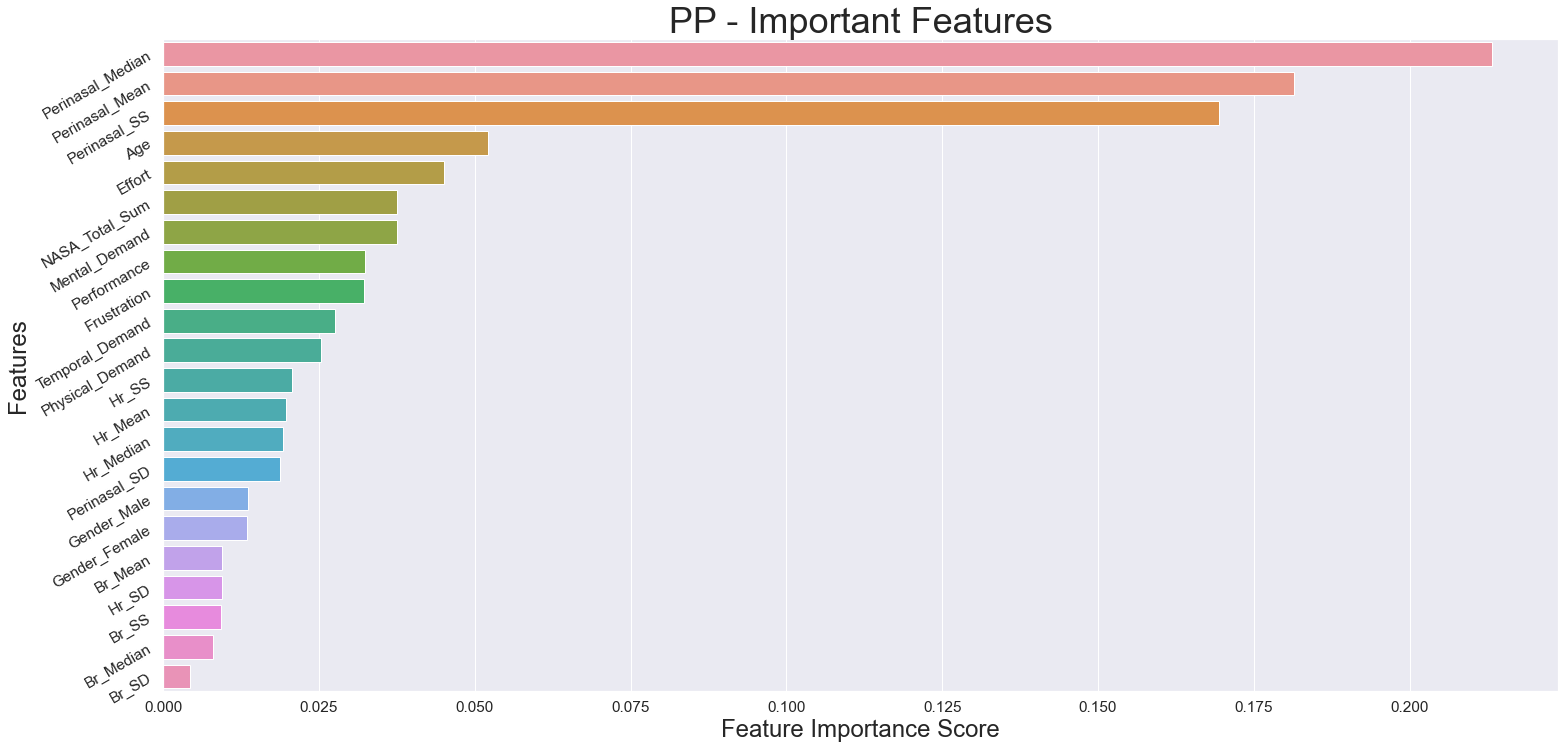

      0   1
0  1315   6
1    64  99


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


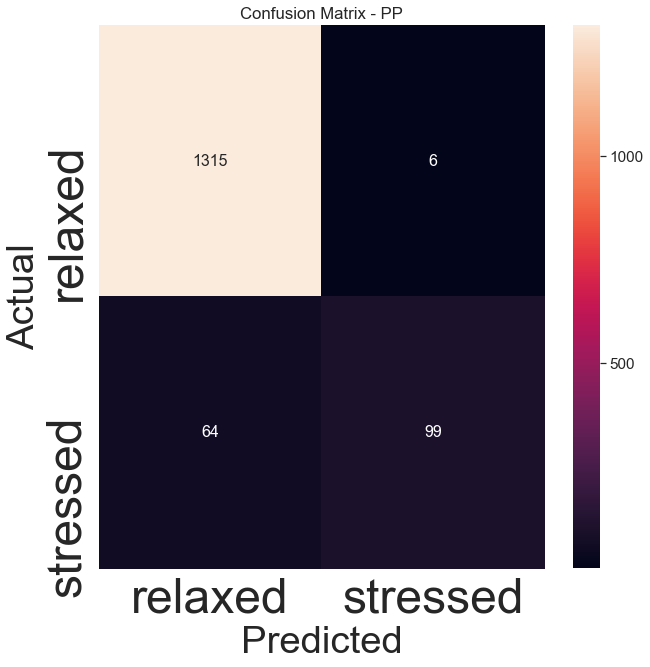

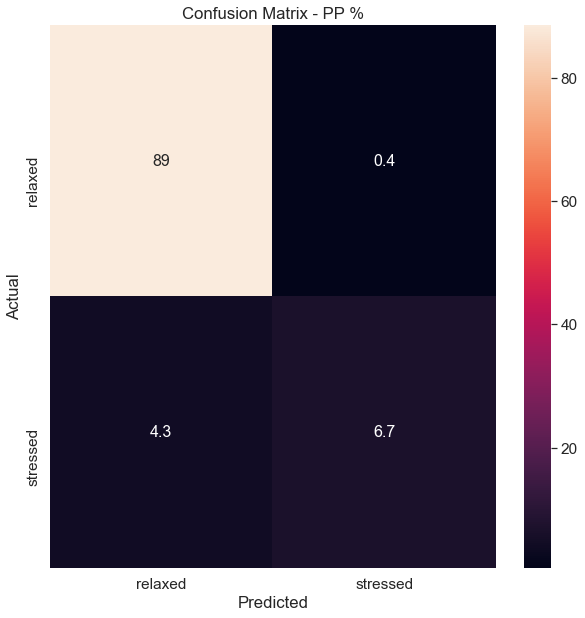

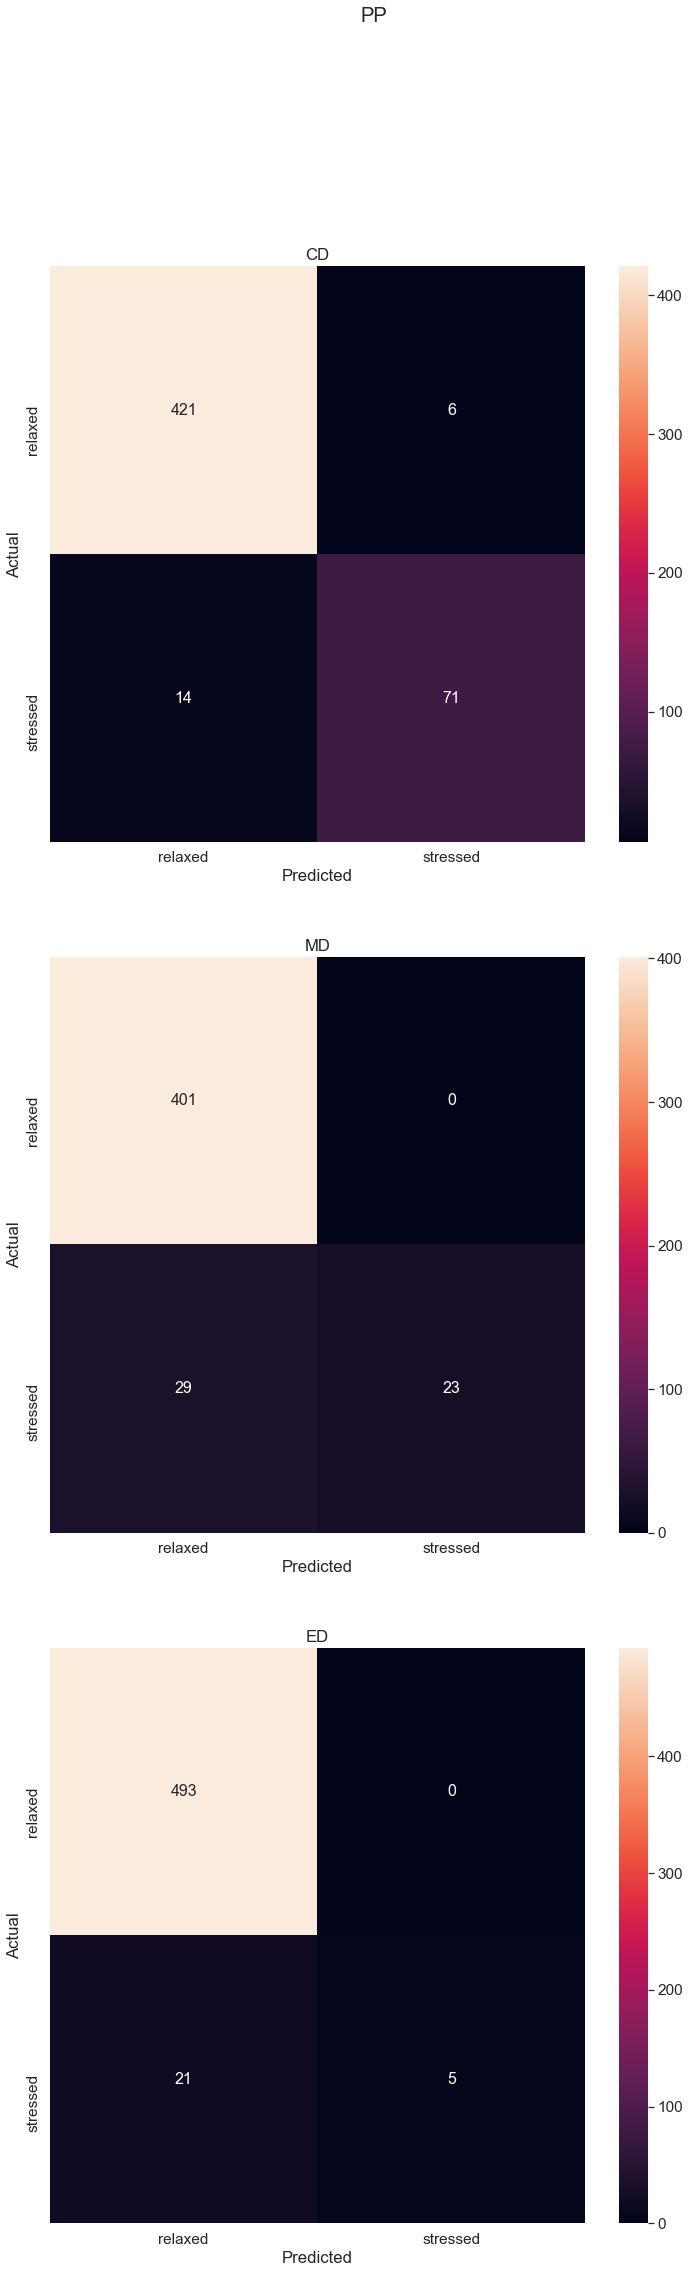

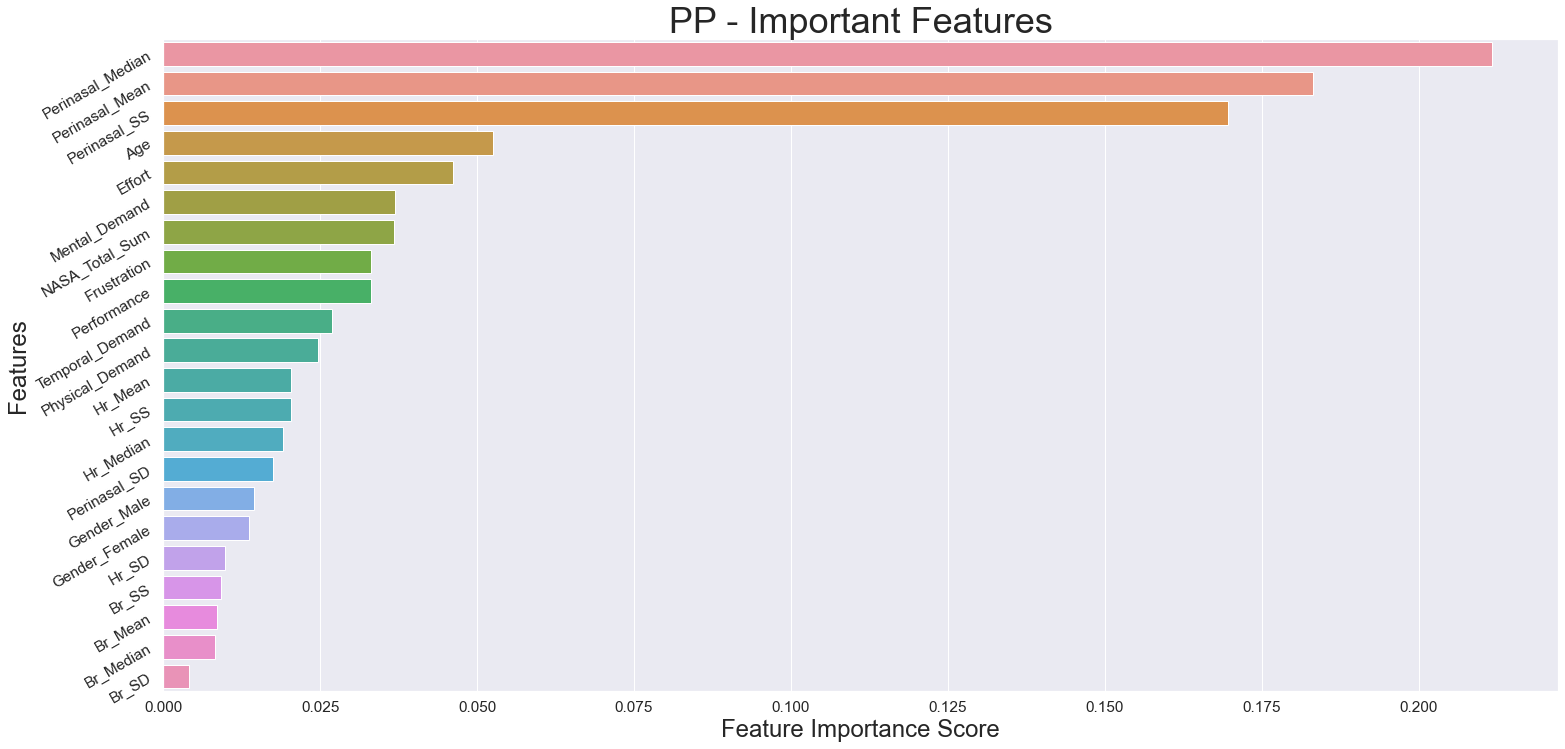

      0    1
0  1318    3
1    63  100


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


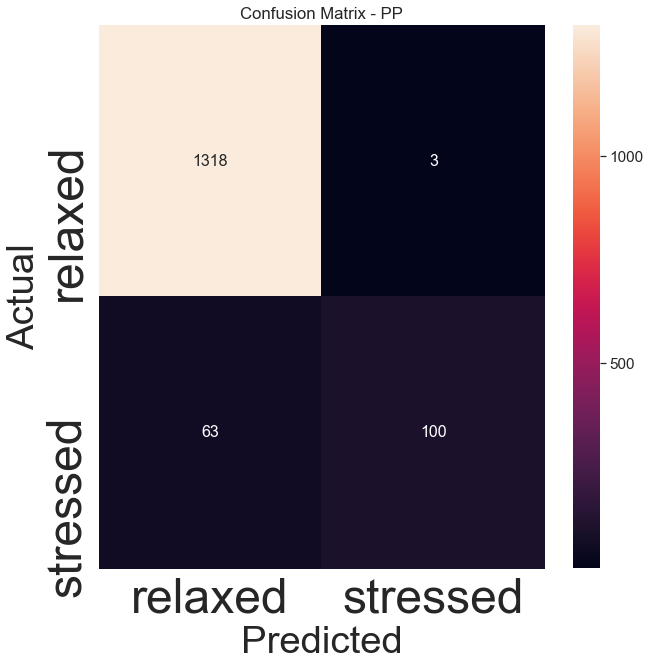

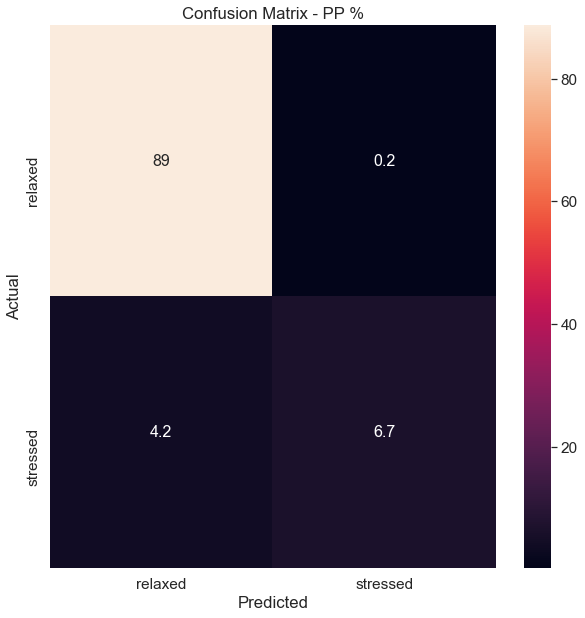

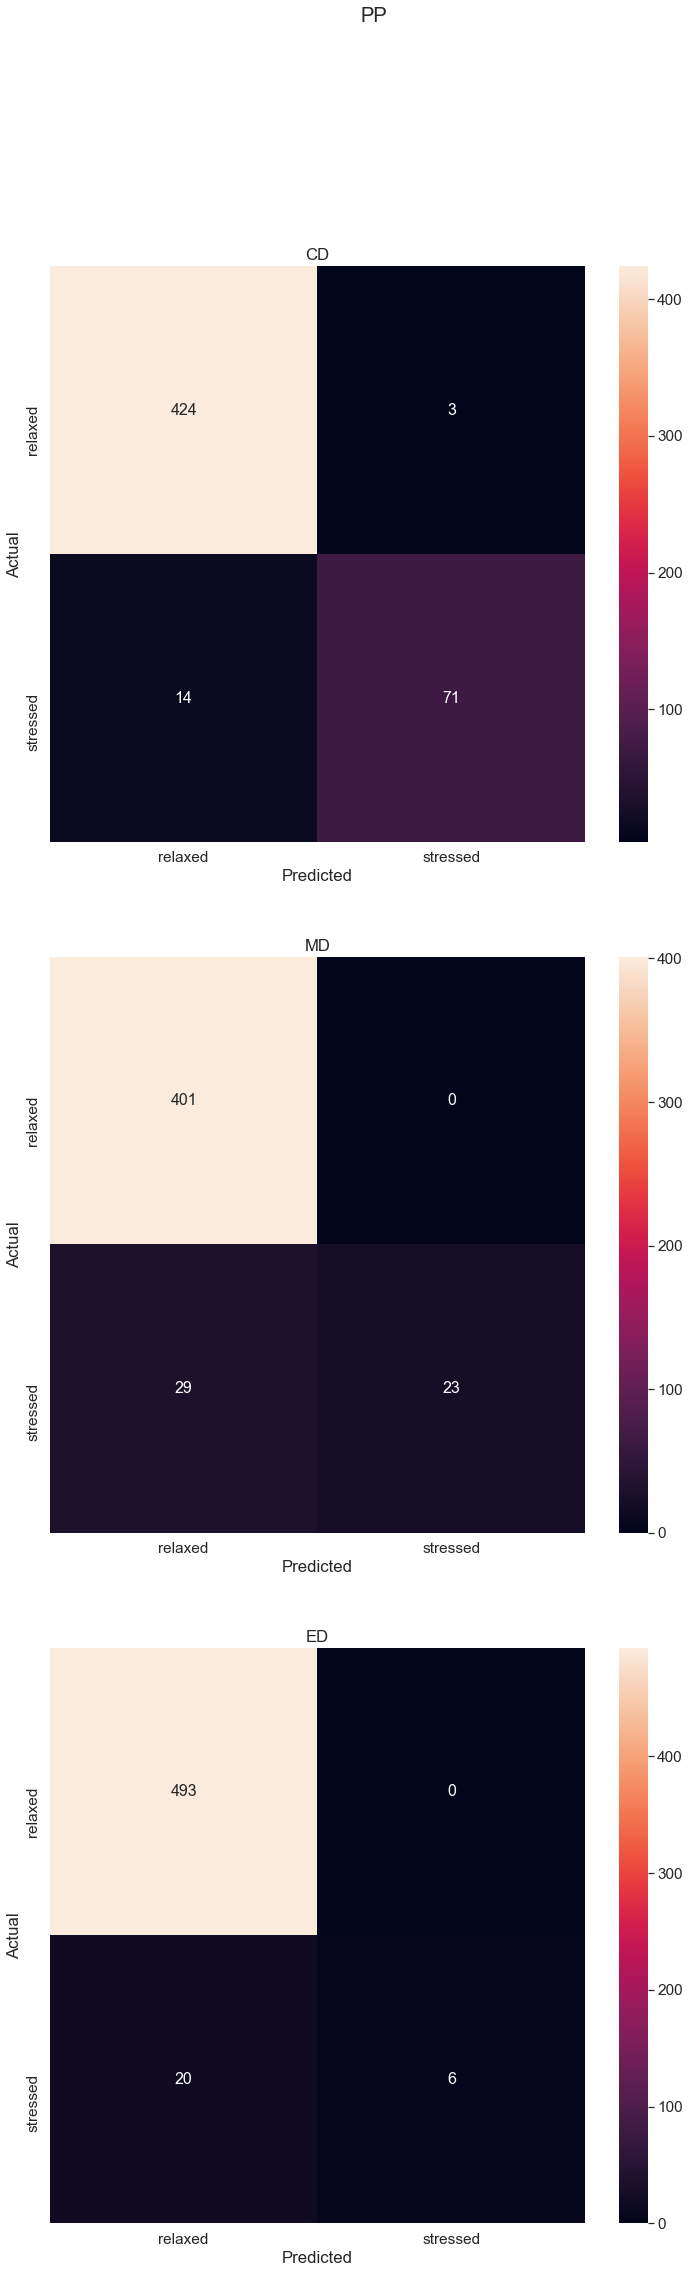

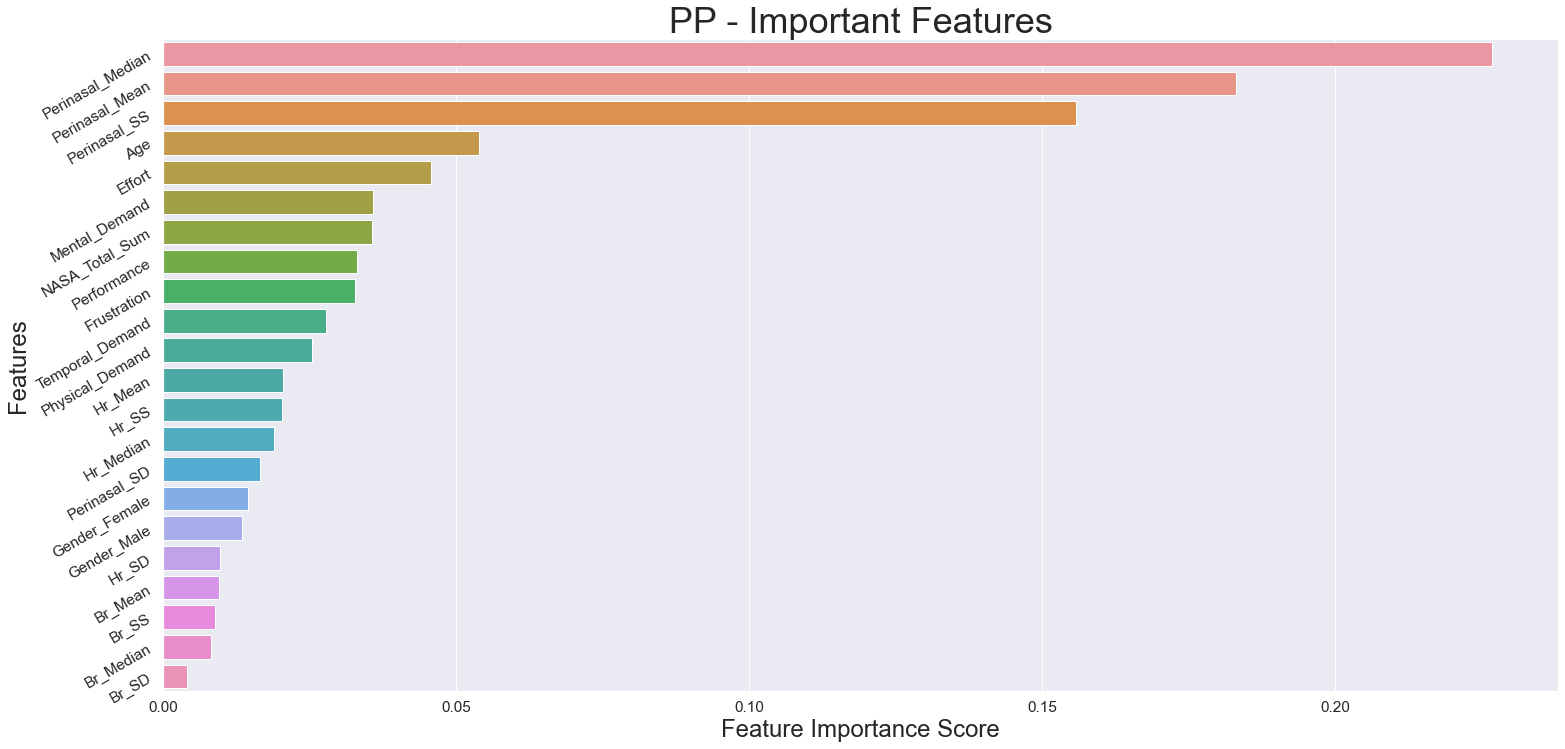

      0    1
0  1317    4
1    62  101


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


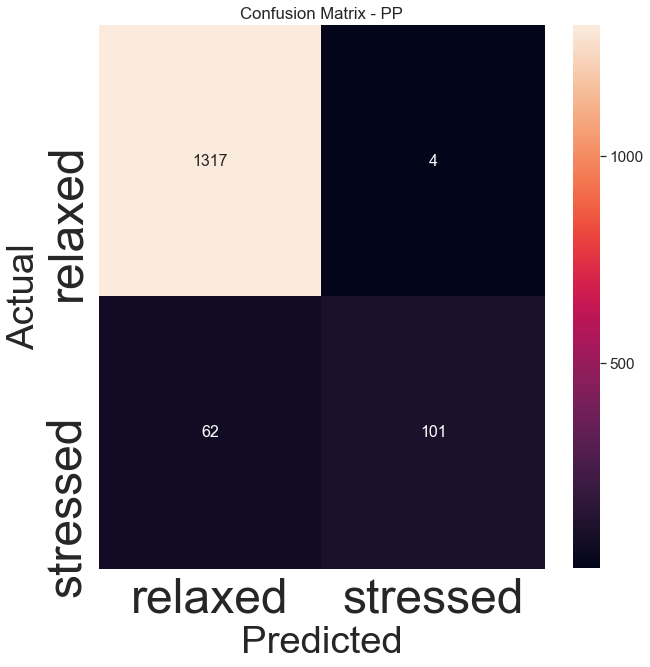

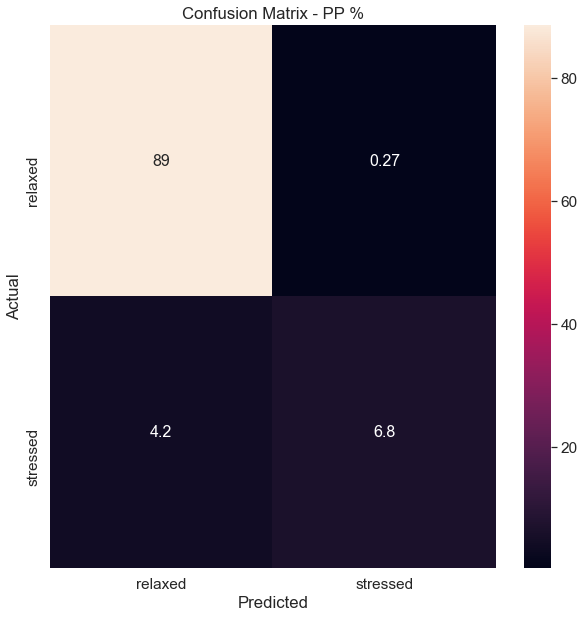

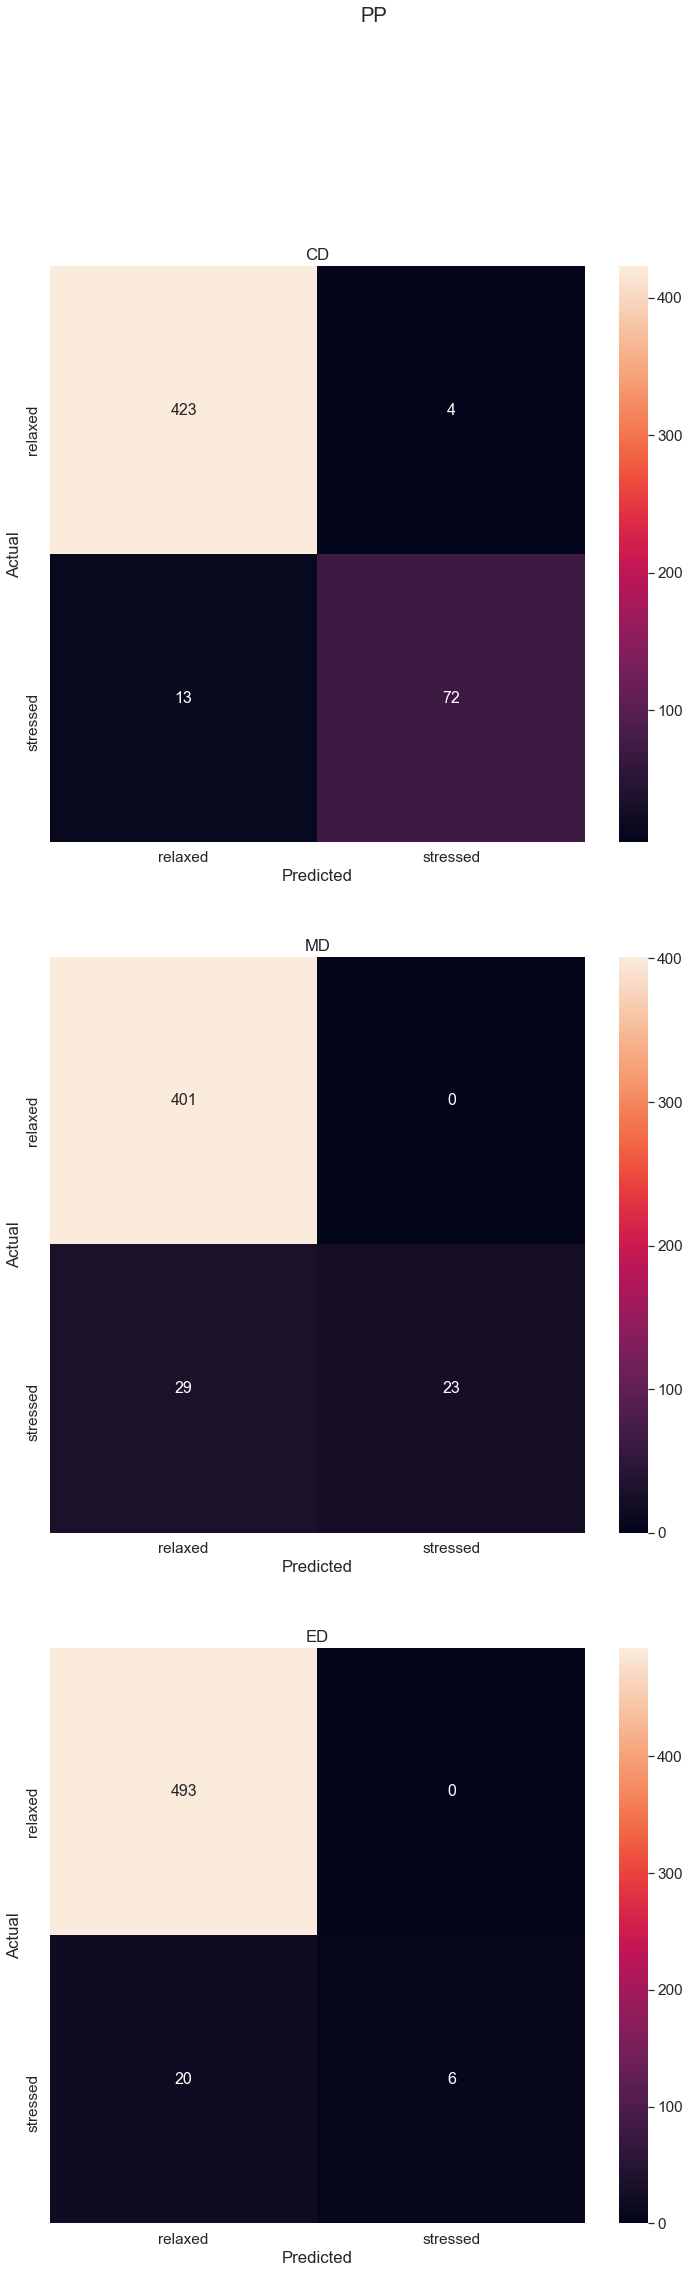

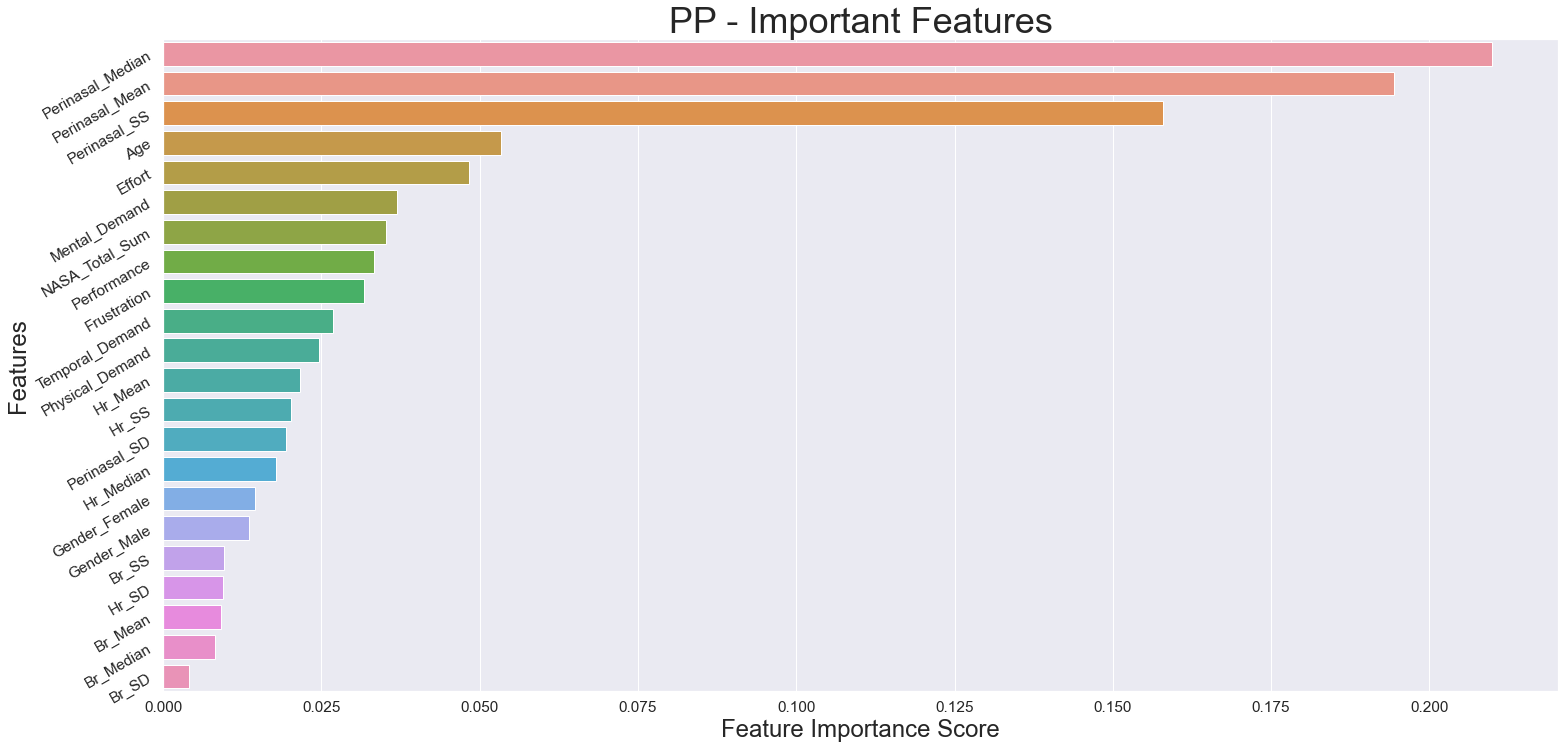

      0    1
0  1318    3
1    63  100


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


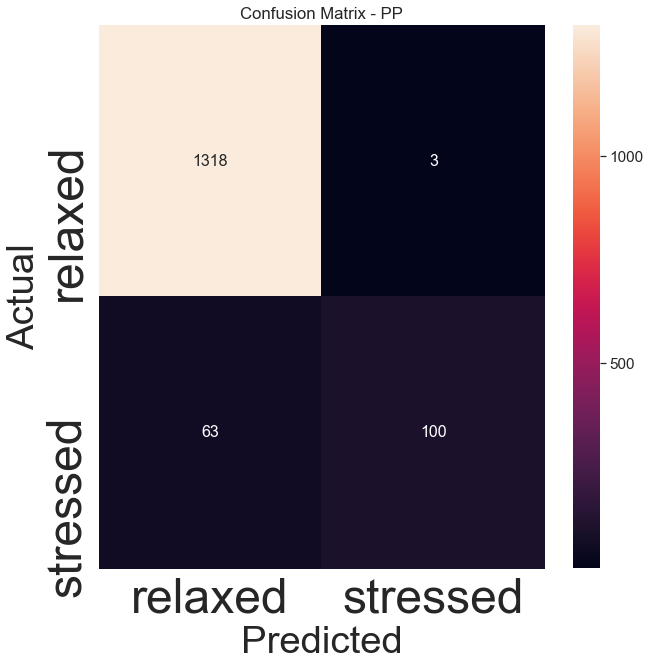

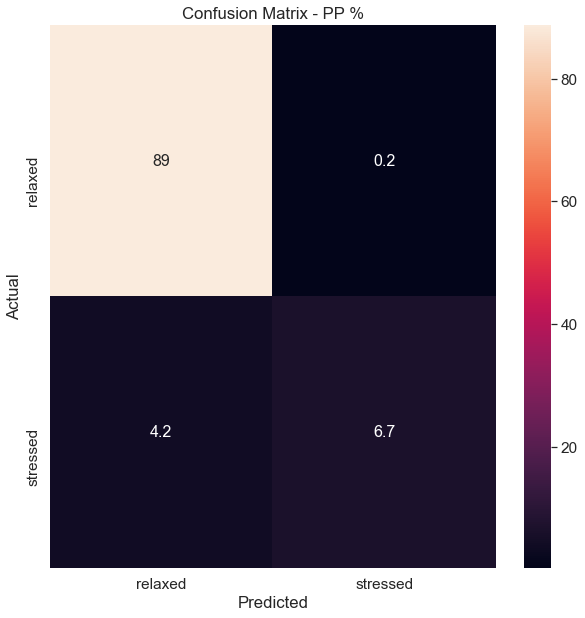

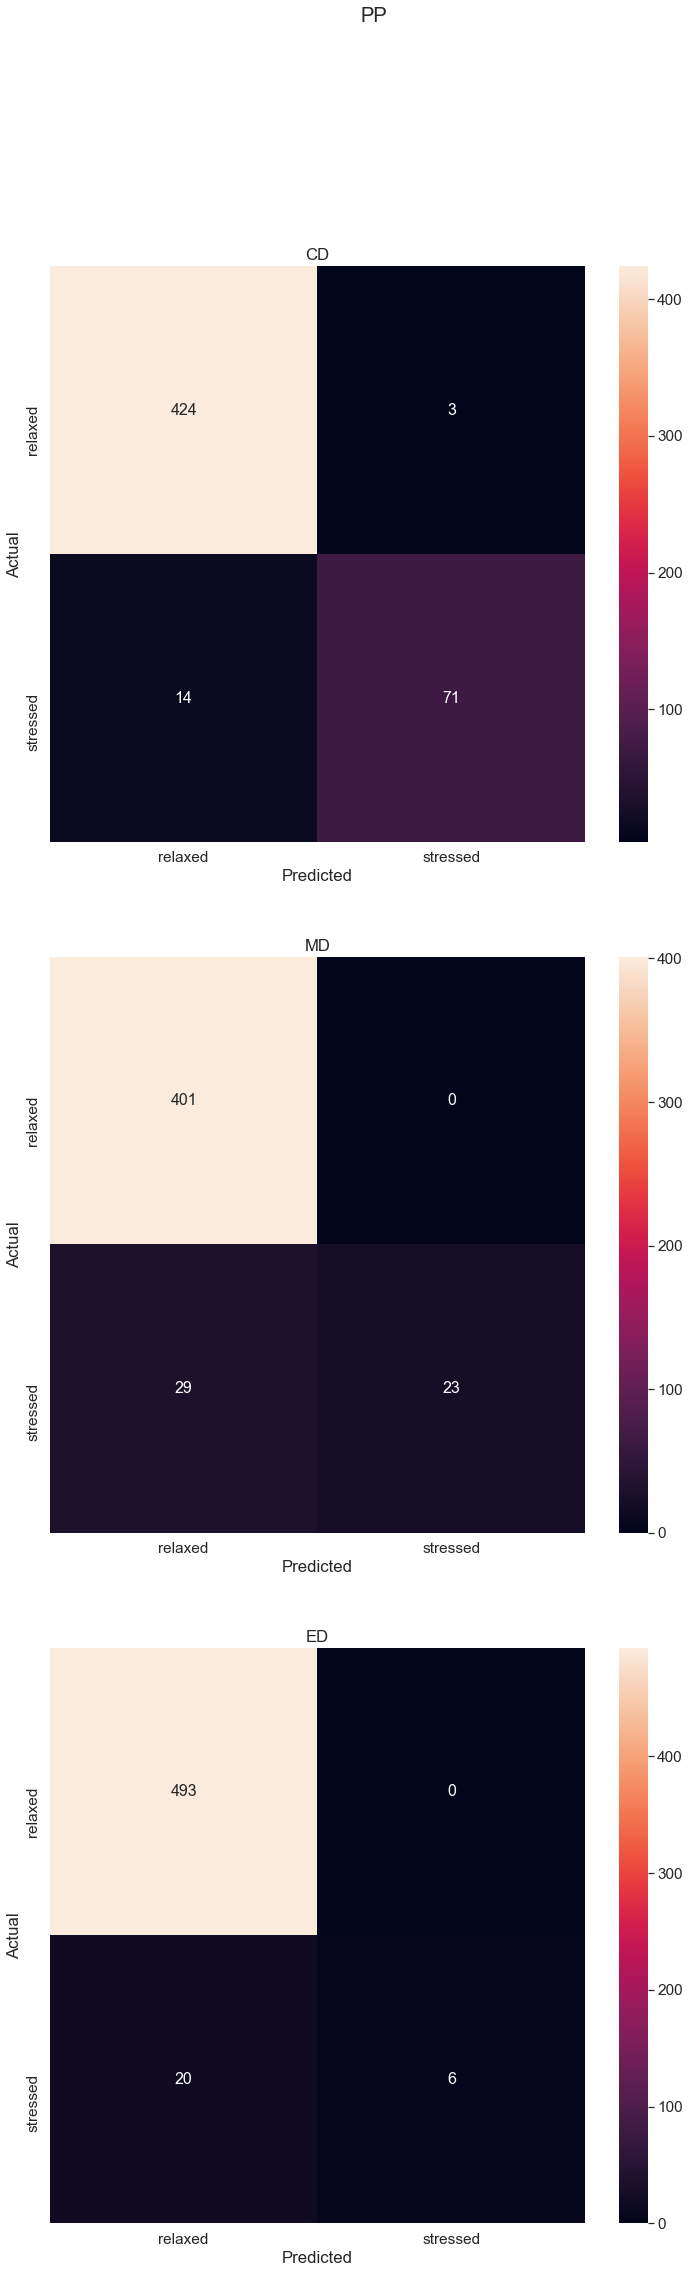

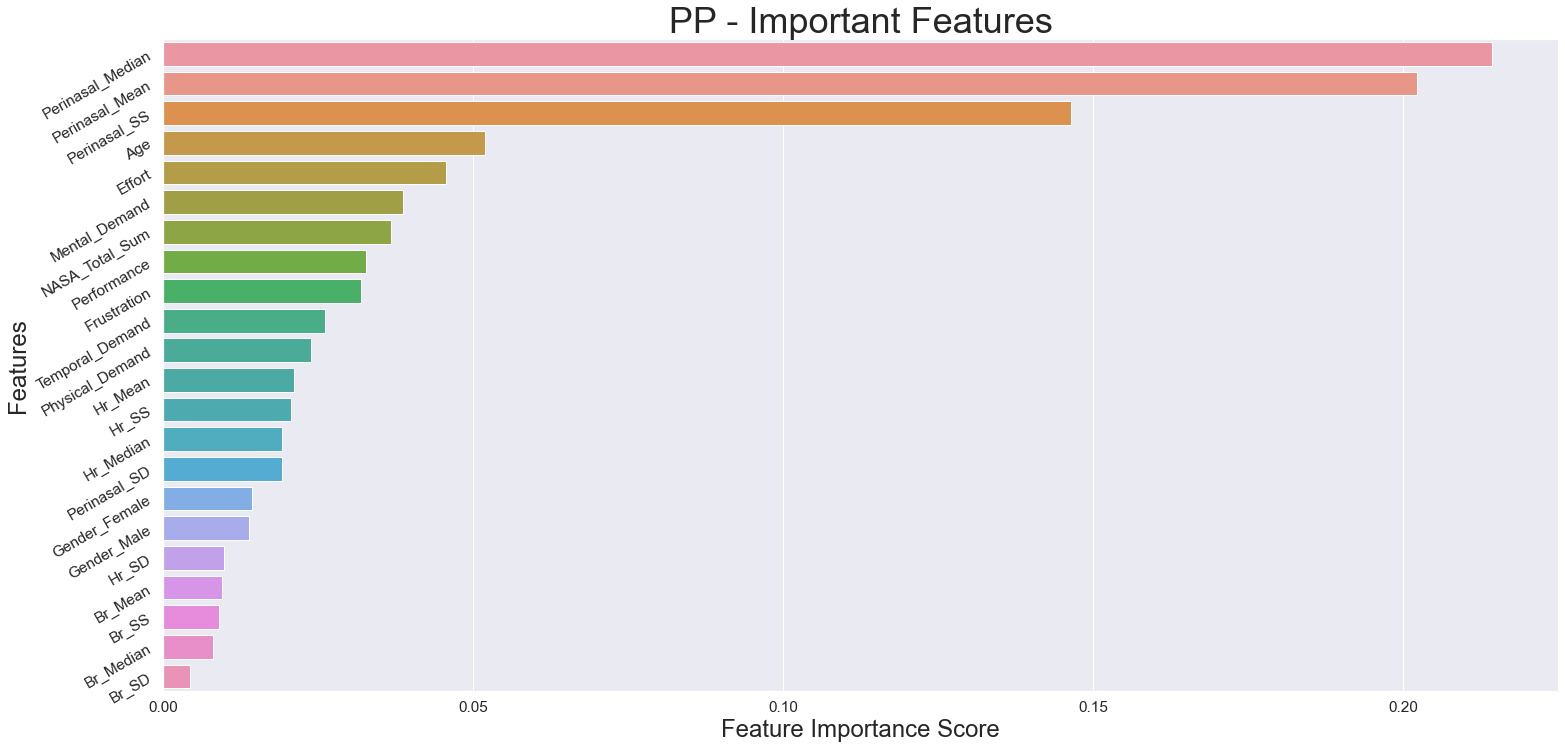

      0    1
0  1316    5
1    59  104


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


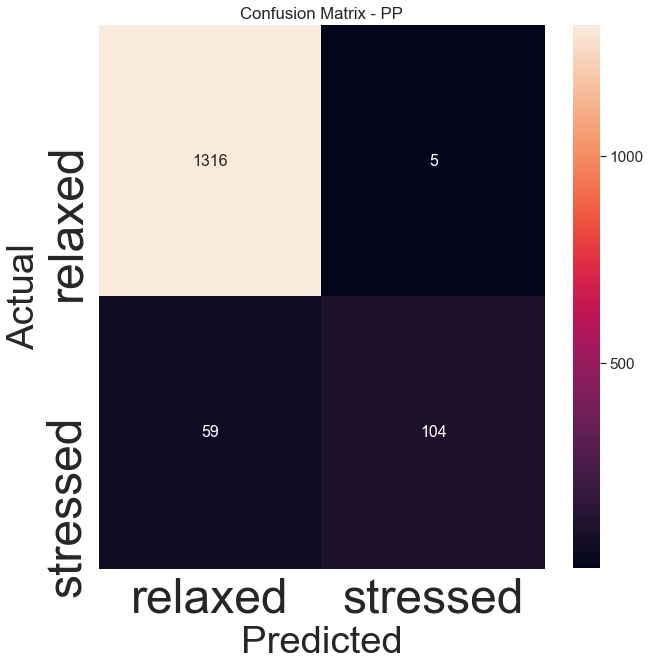

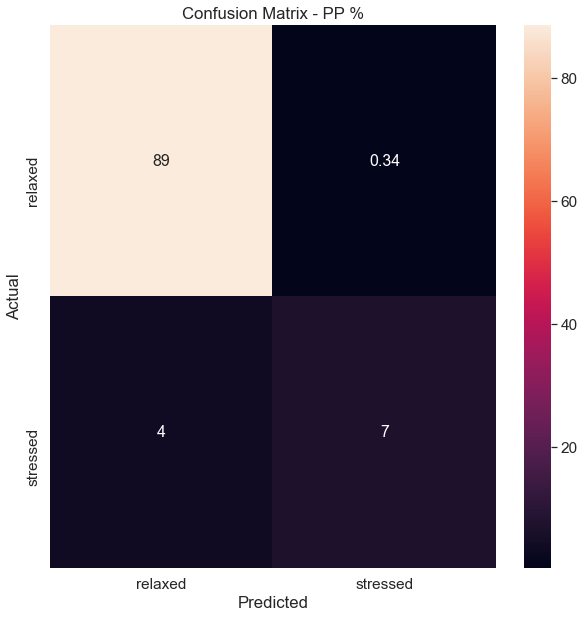

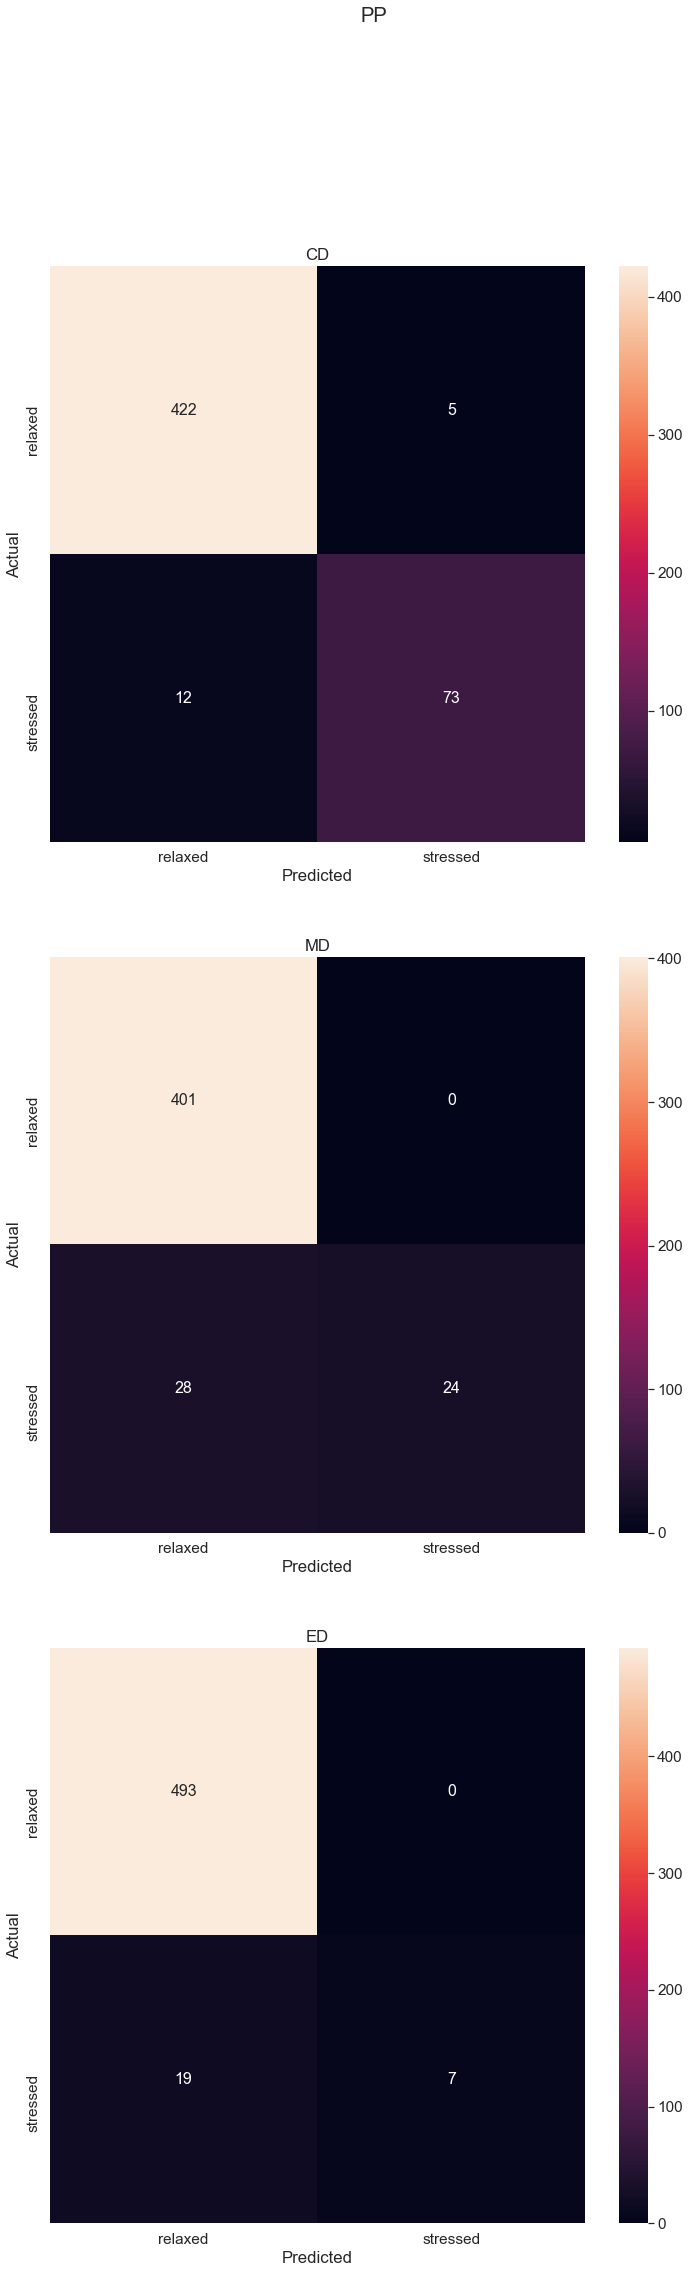

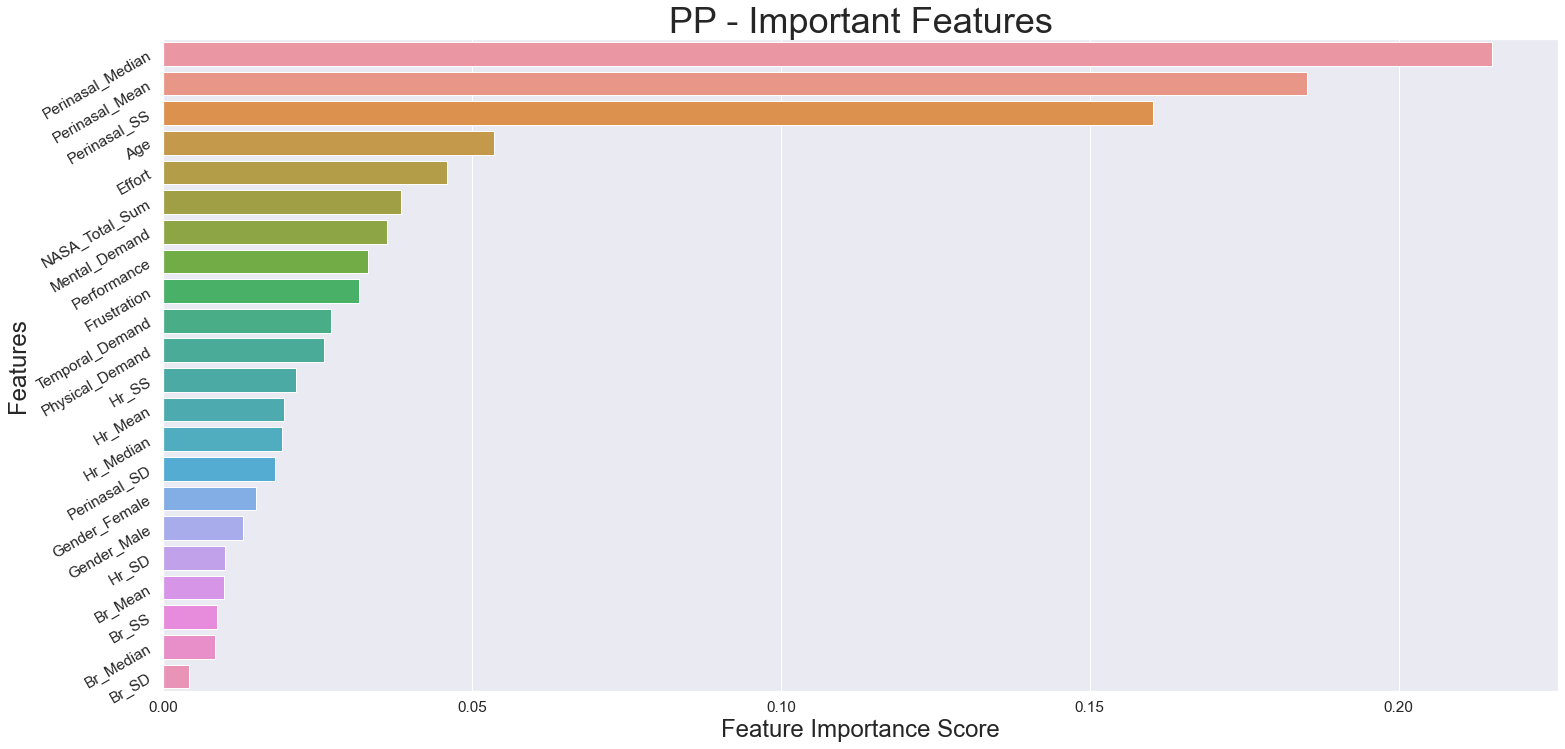

      0    1
0  1315    6
1    62  101


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


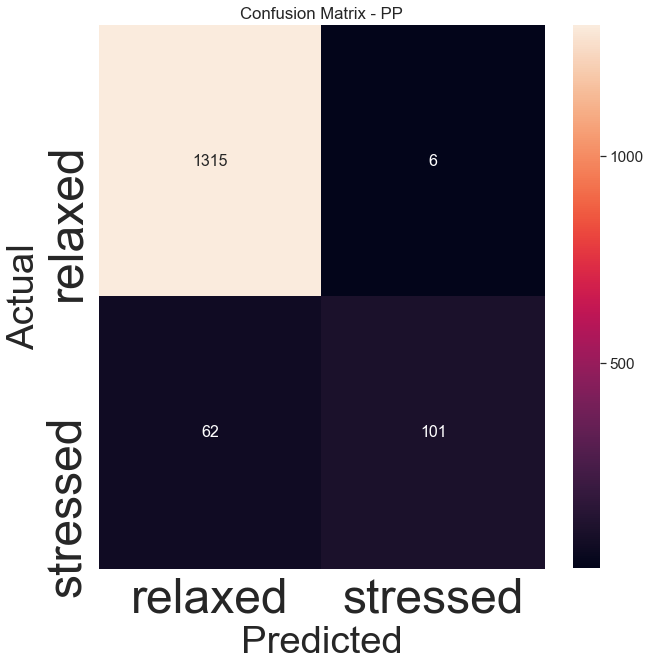

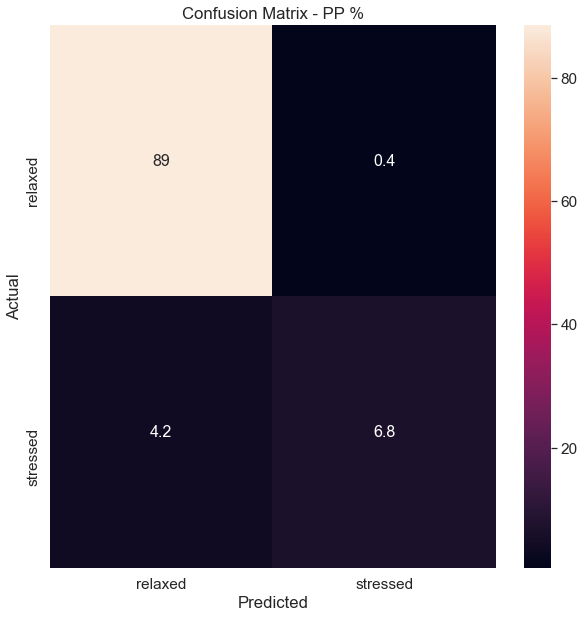

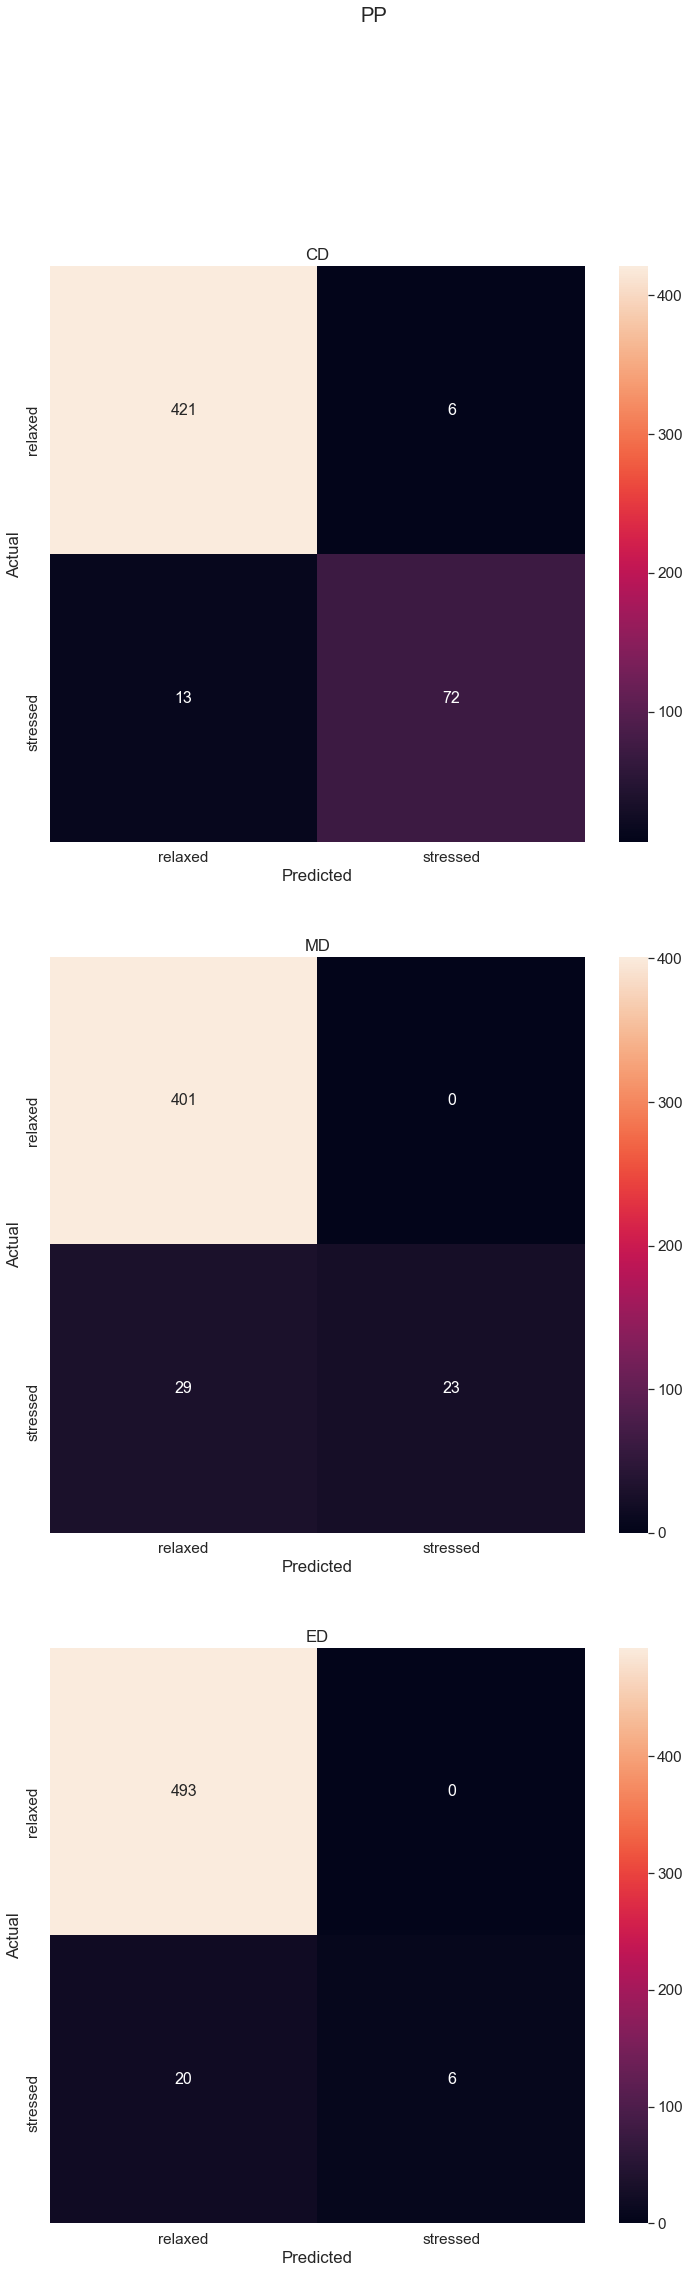

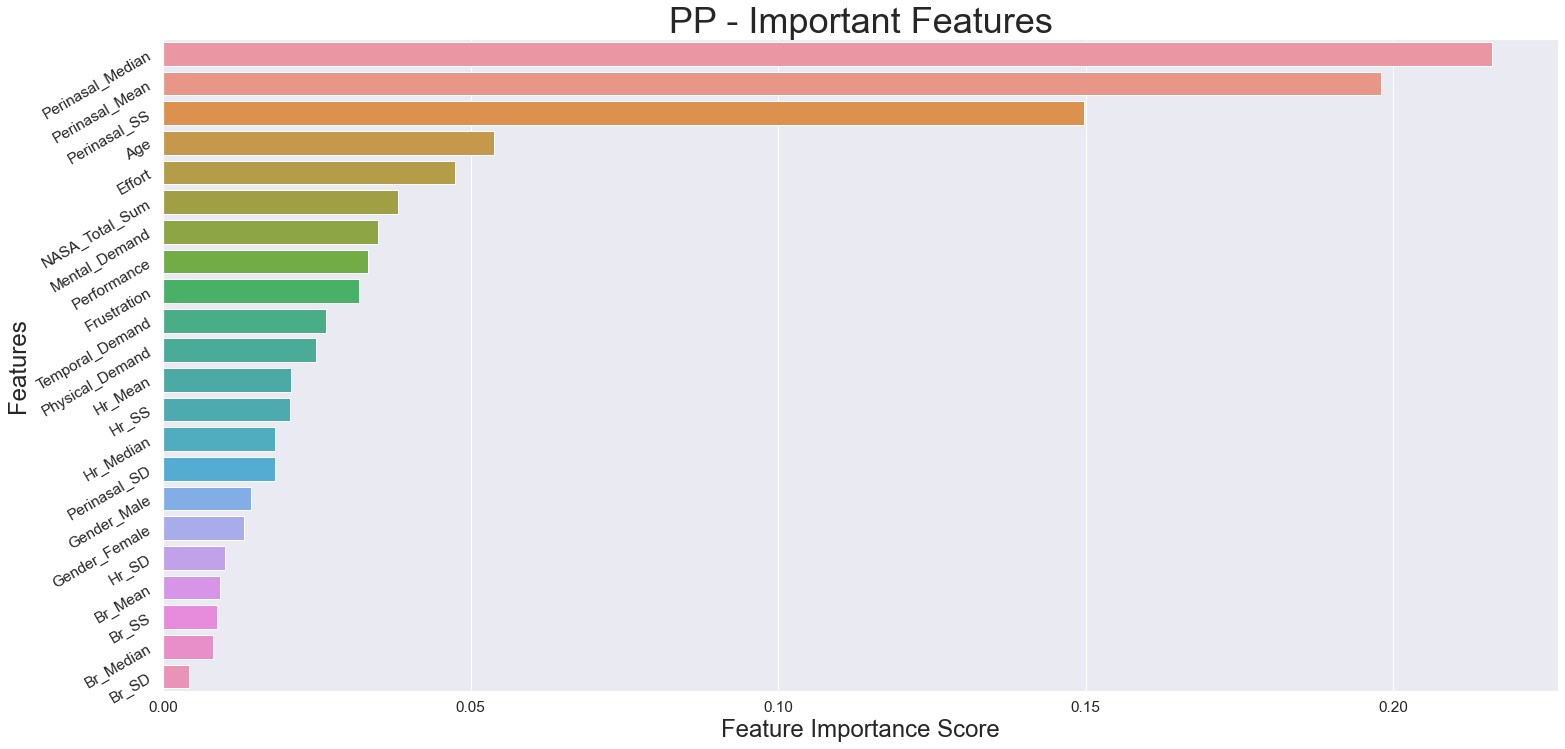

      0   1
0  1317   4
1    64  99


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


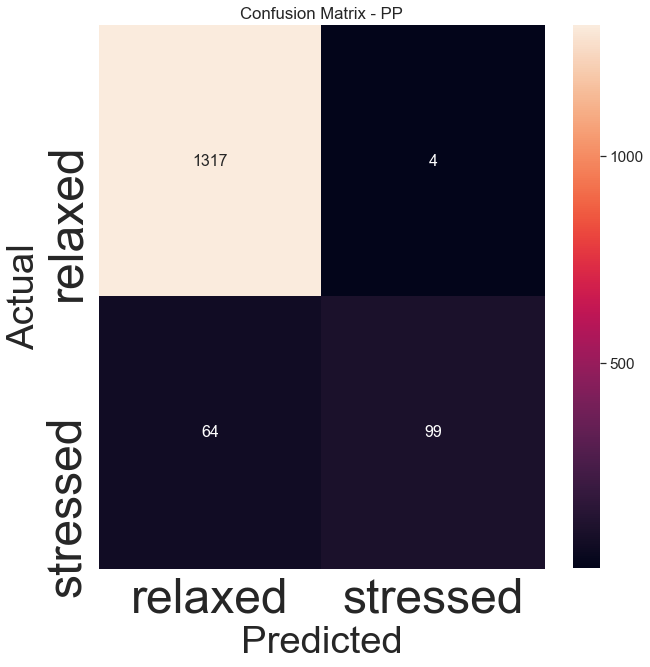

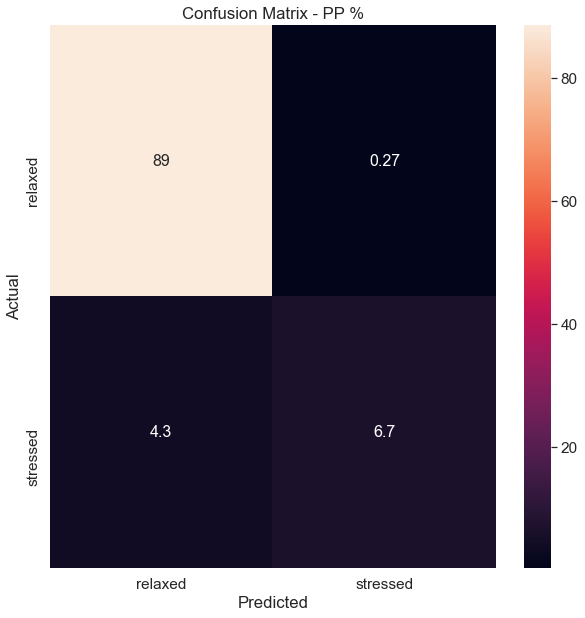

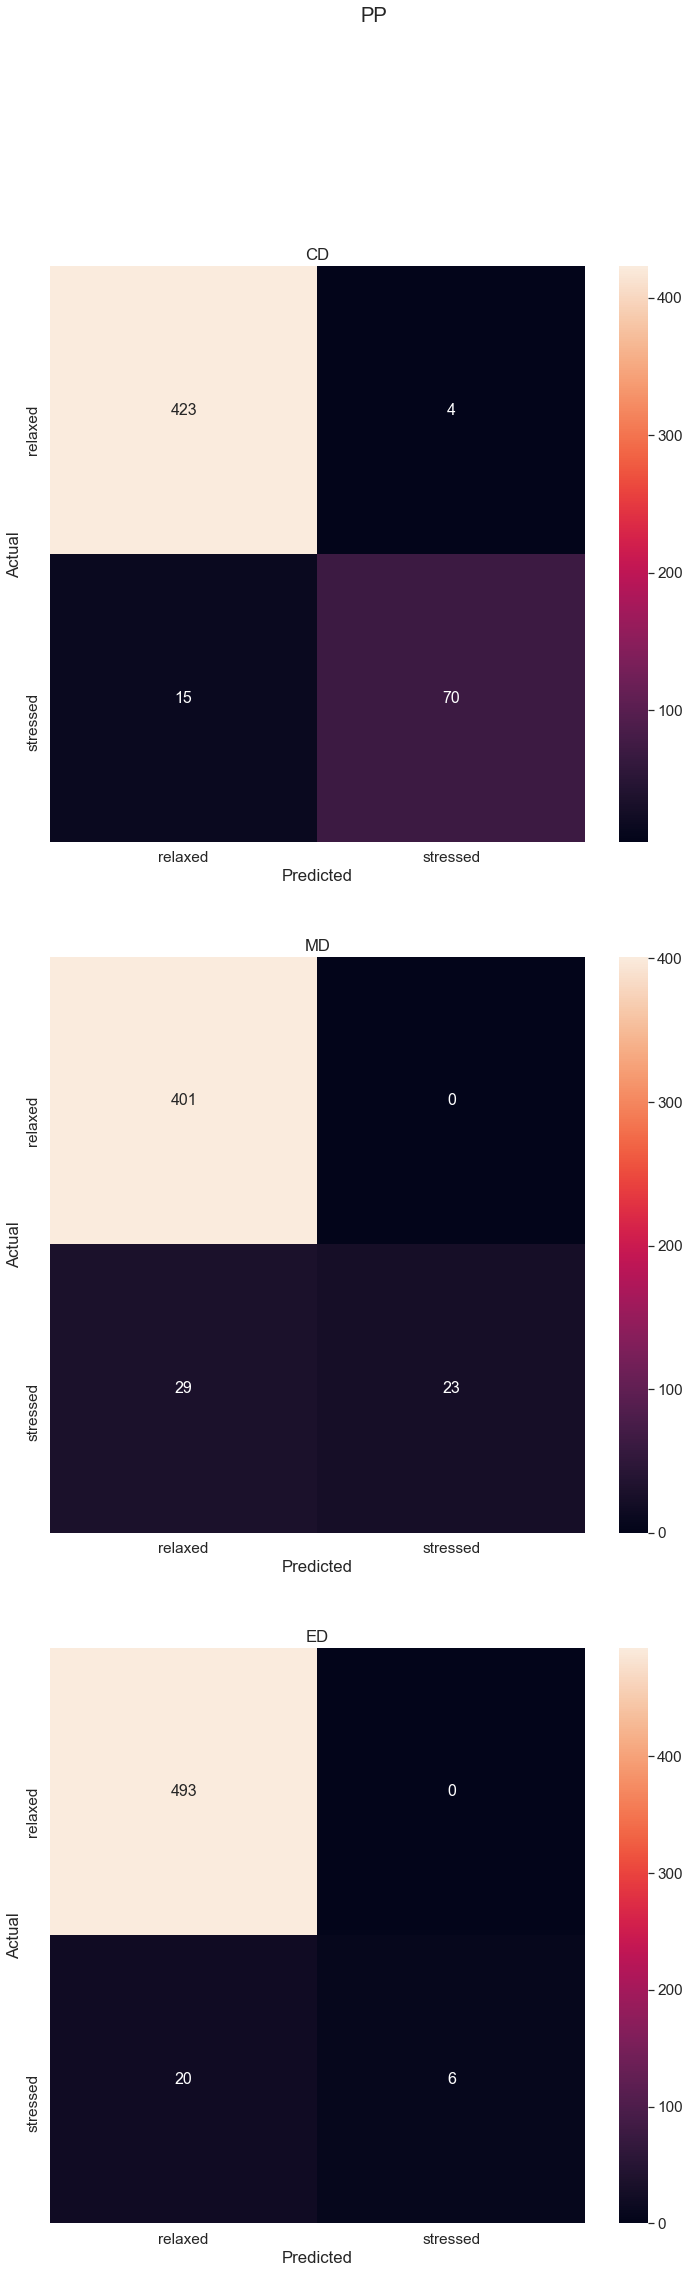

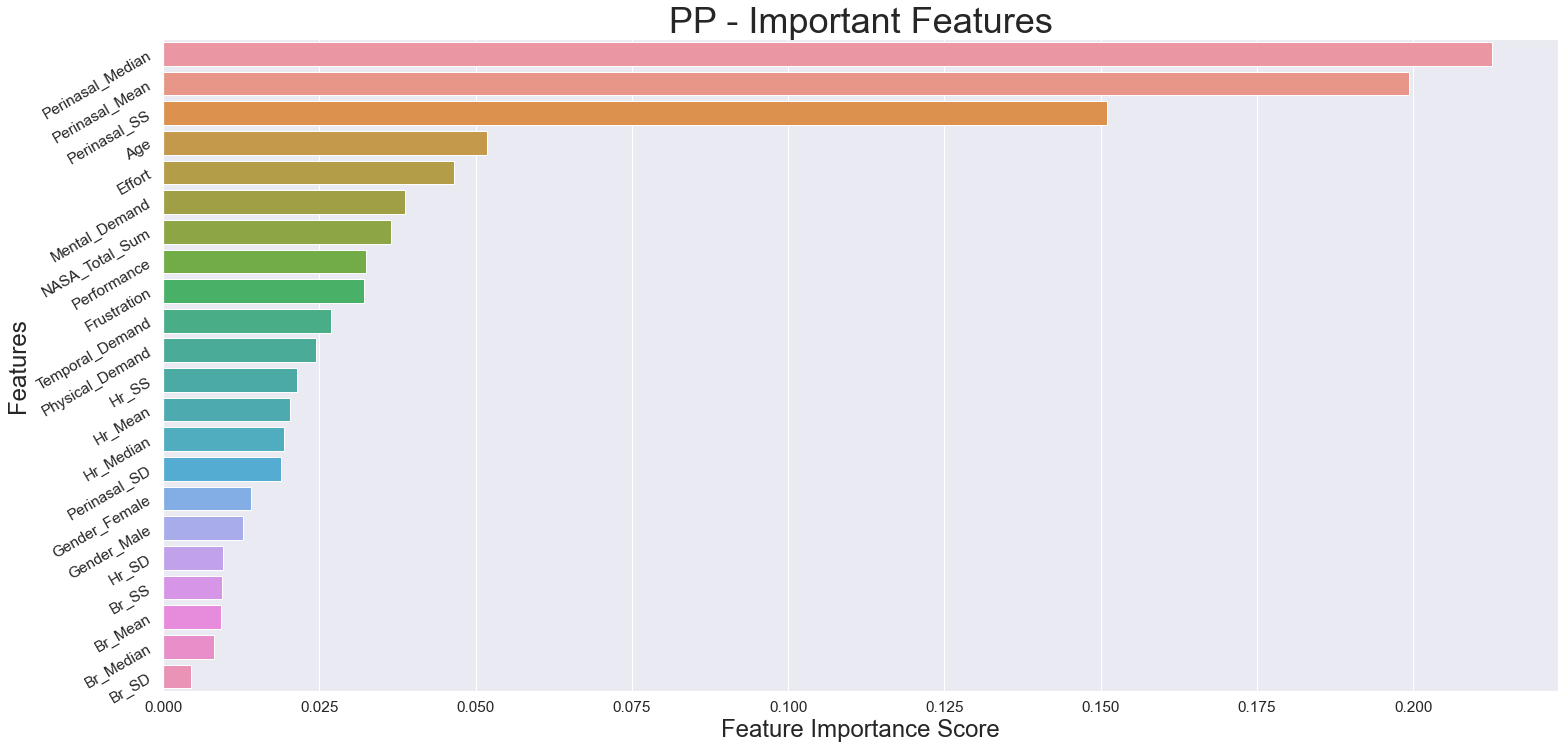

      0    1
0  1315    6
1    61  102


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


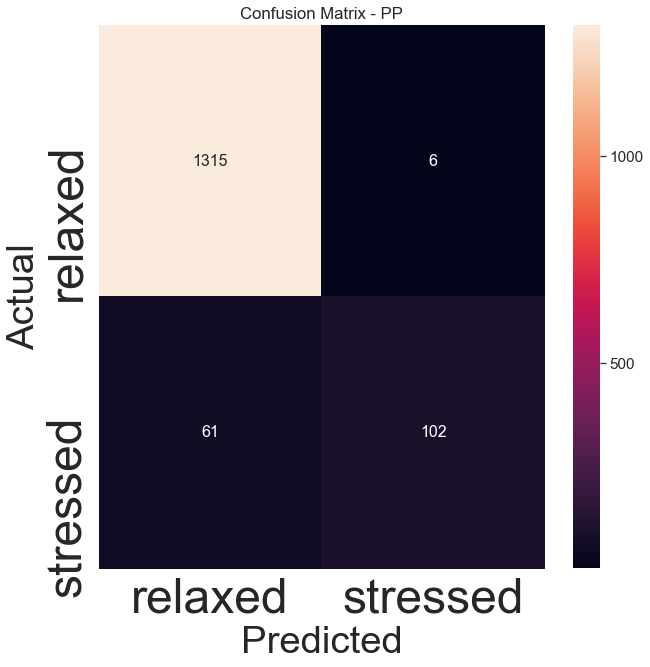

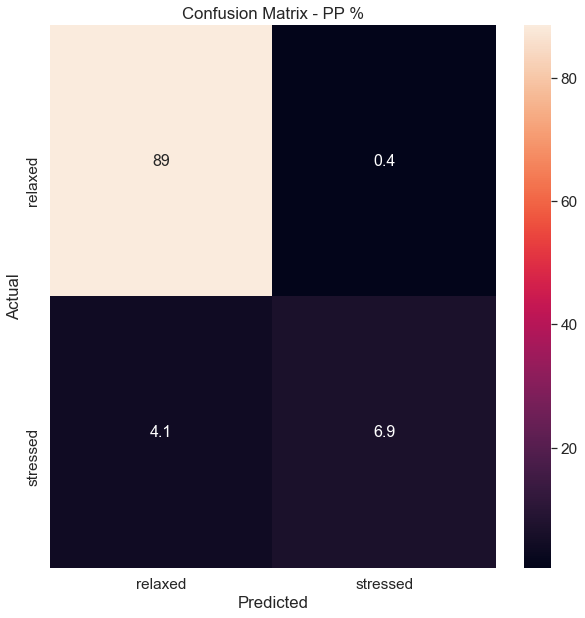

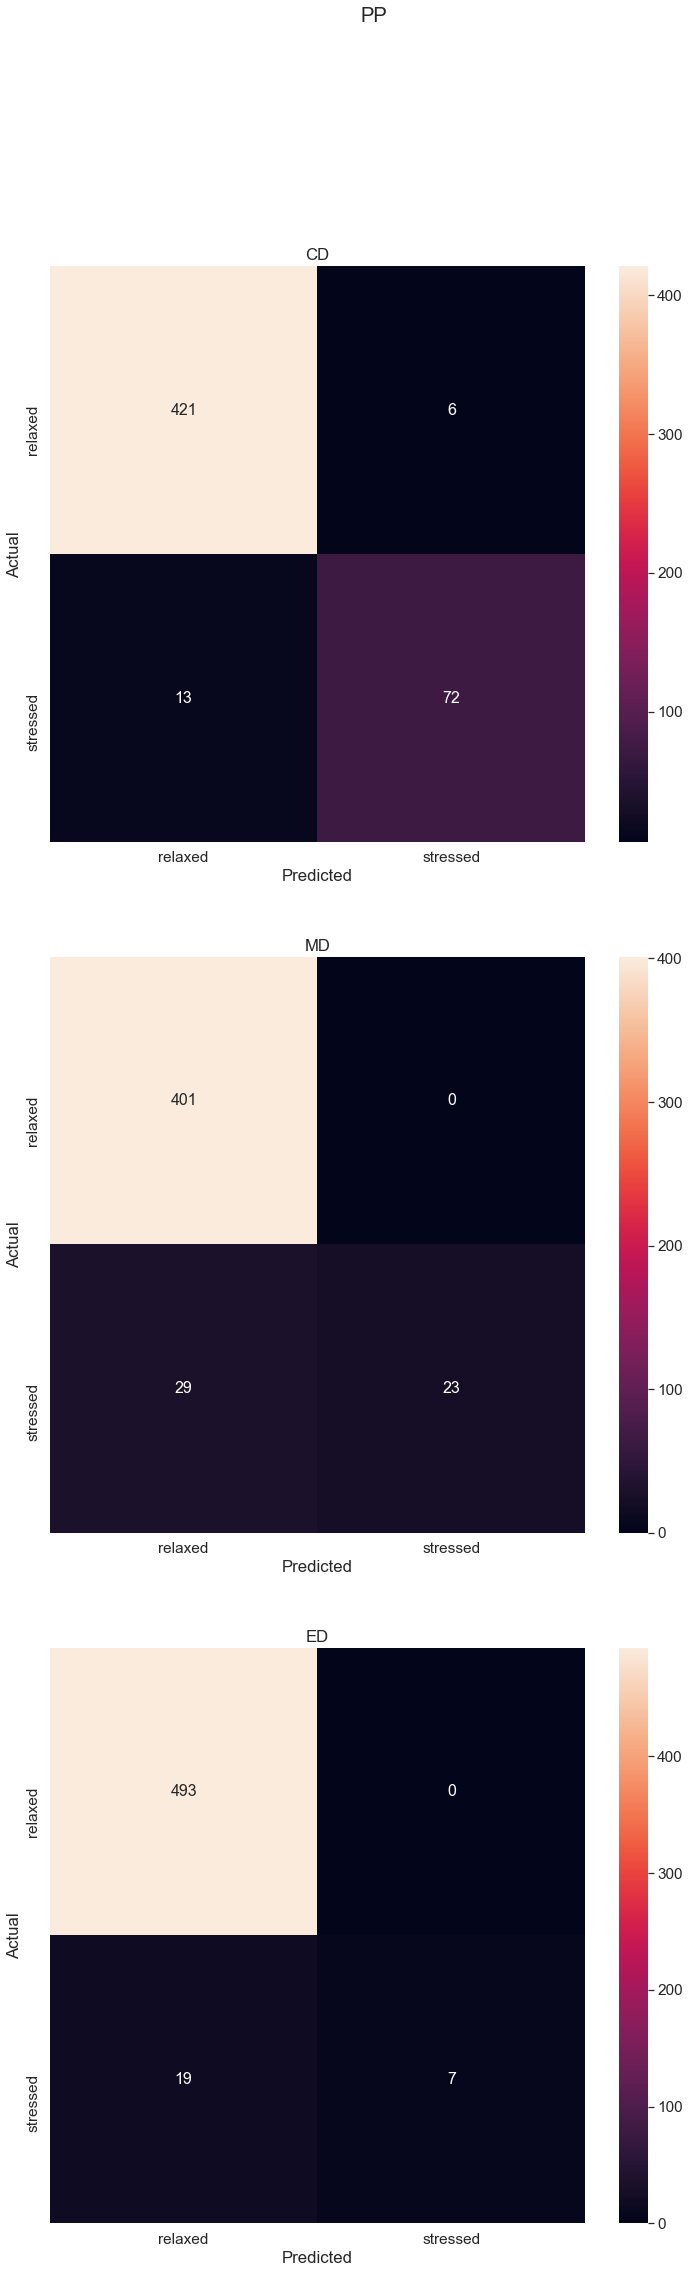

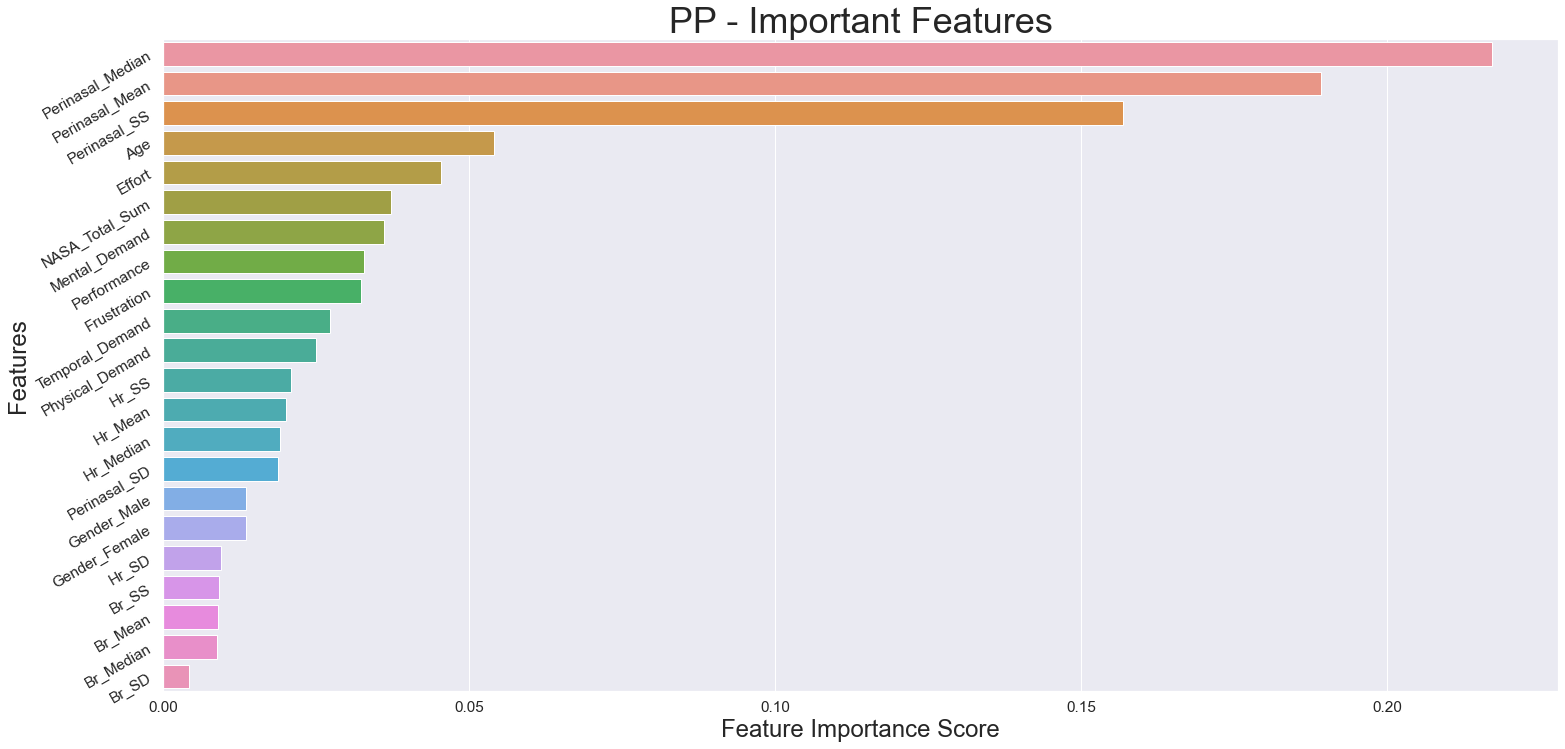

      0   1
0  1318   3
1    65  98


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


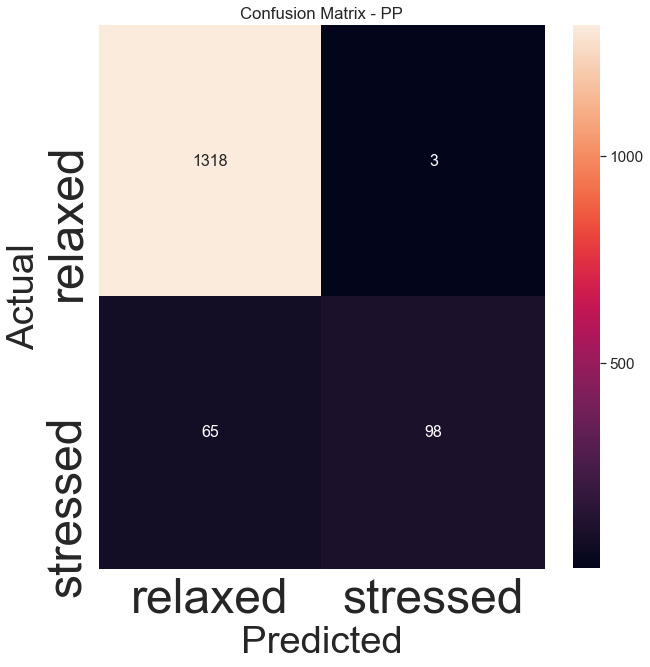

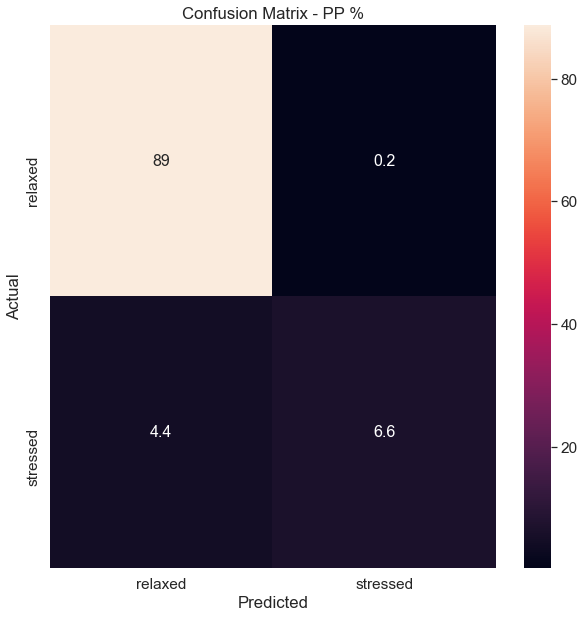

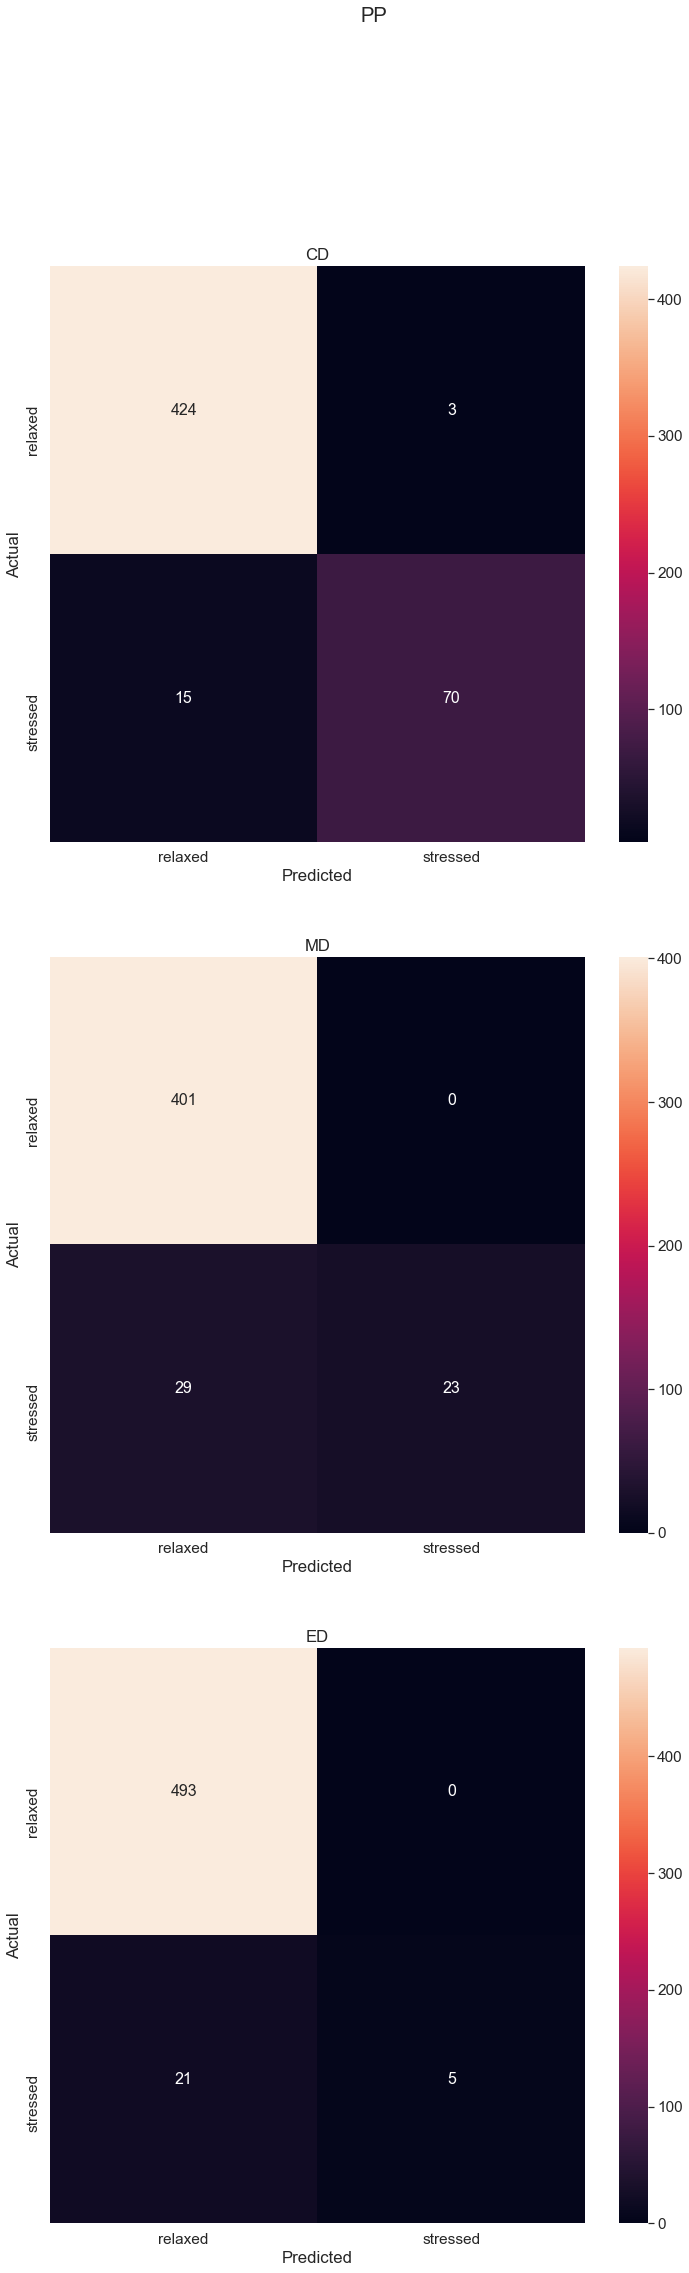

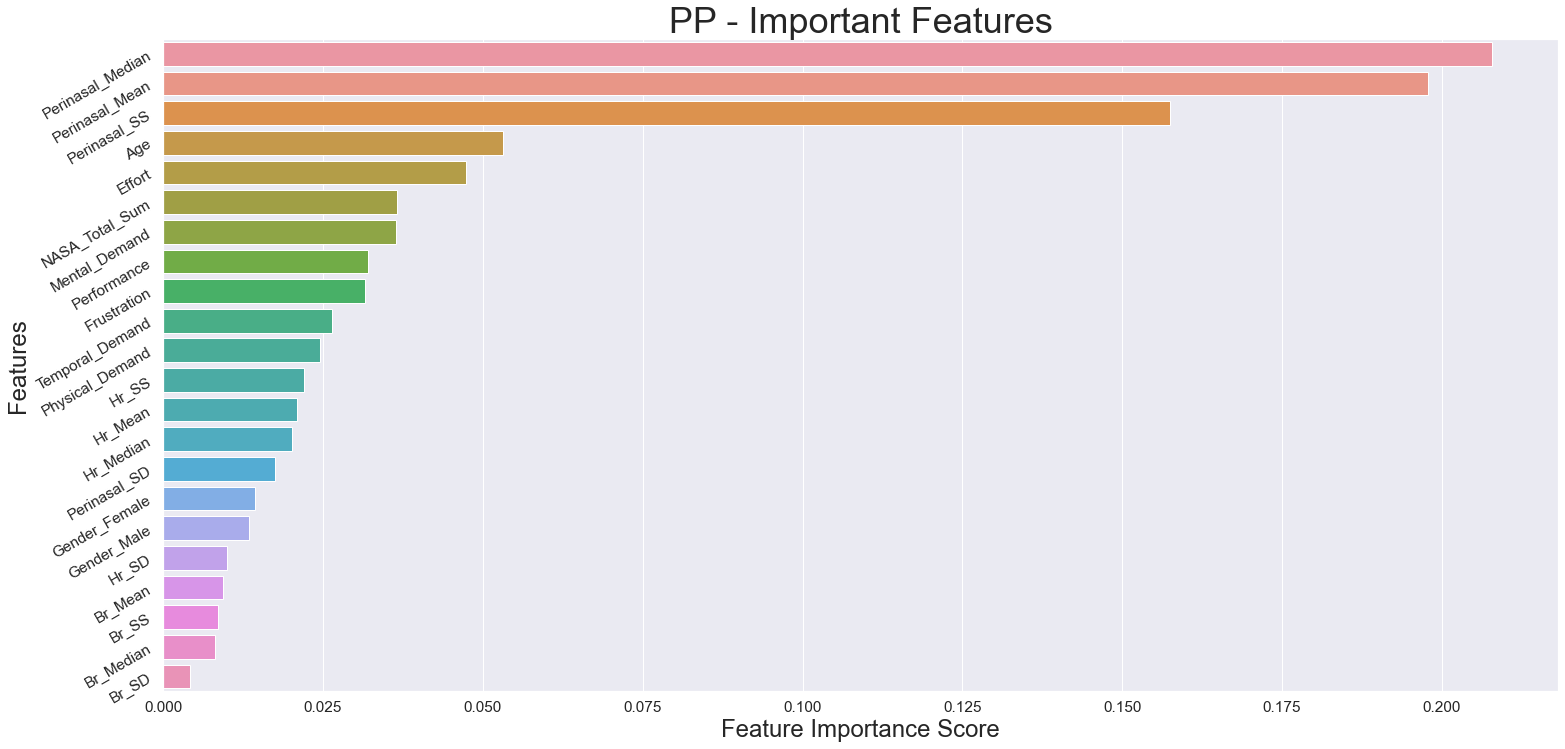

      0   1
0  1317   4
1    64  99


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


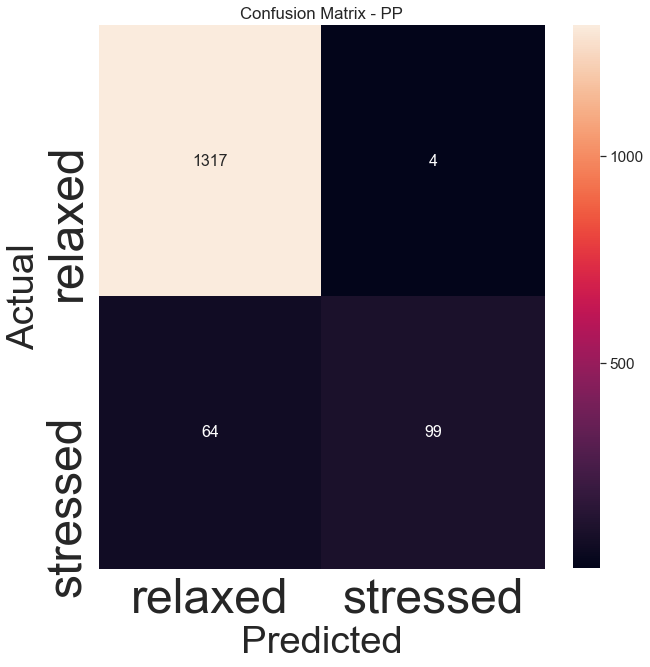

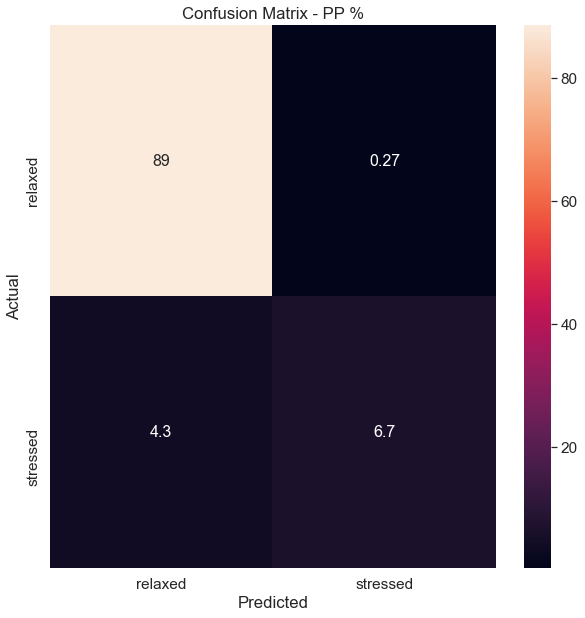

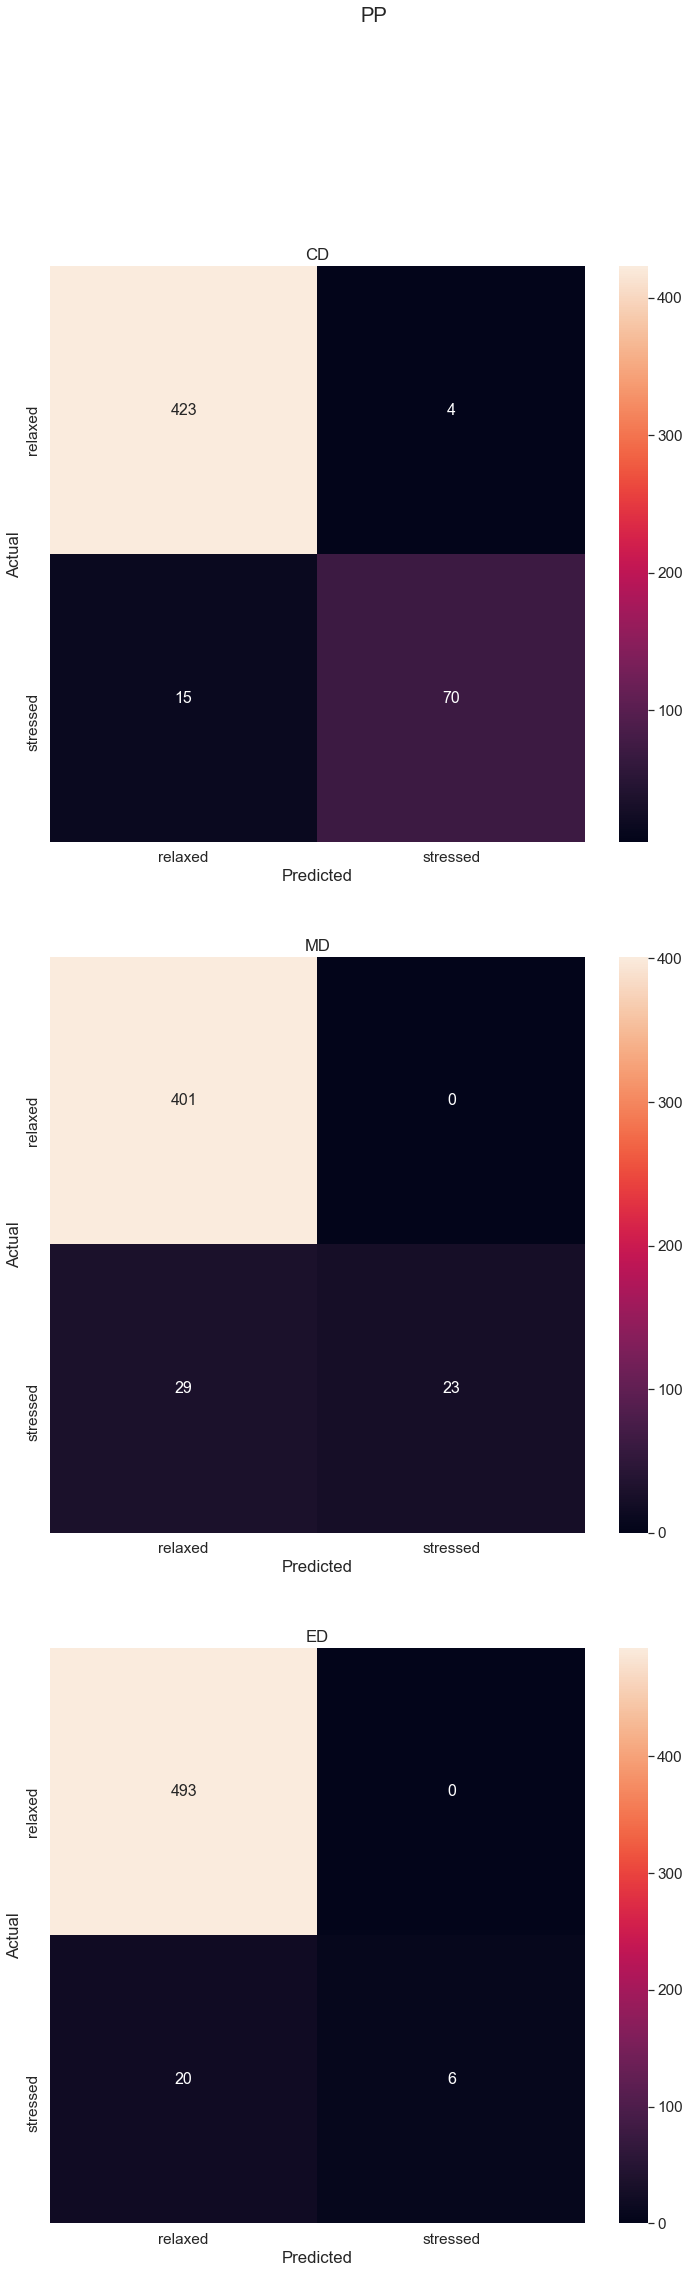

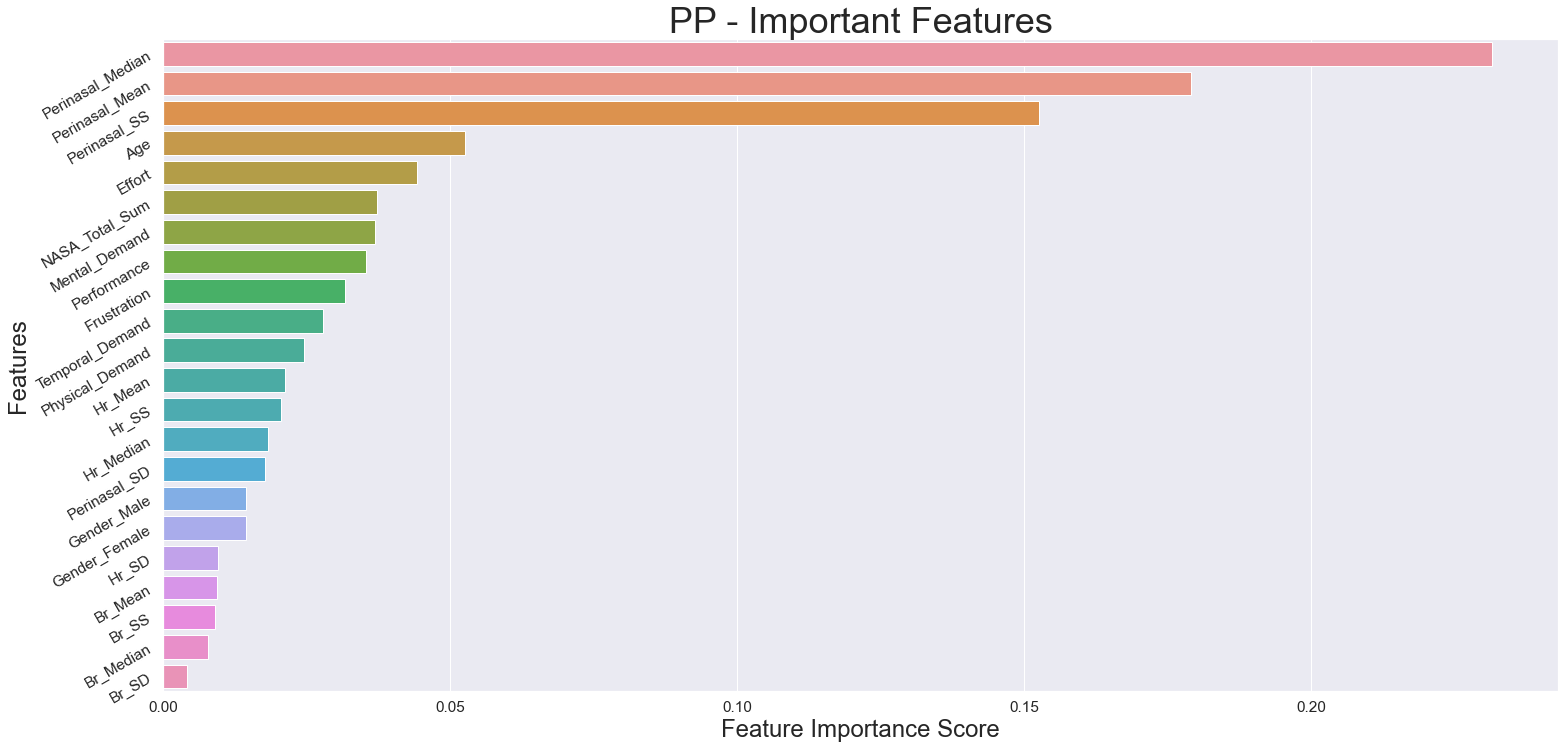

      0   1
0  1315   6
1    64  99


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


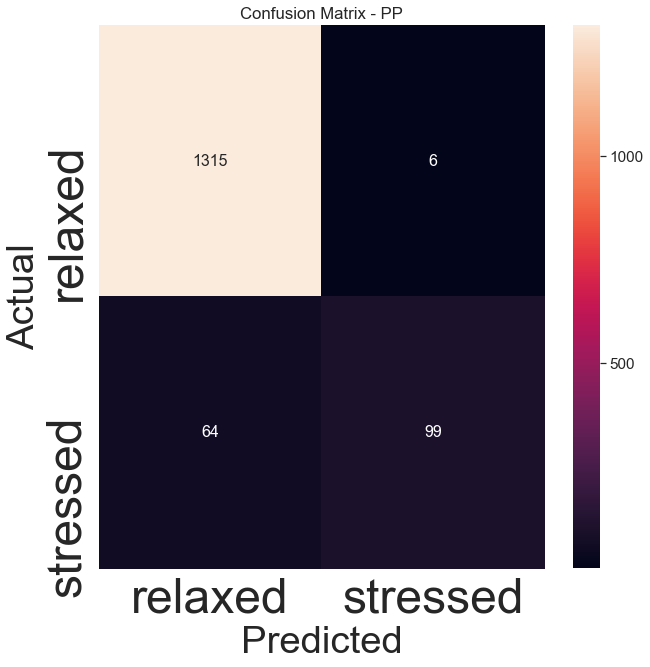

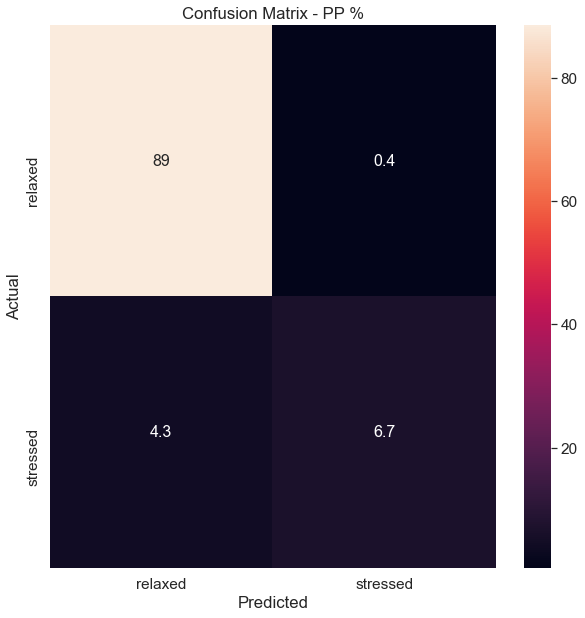

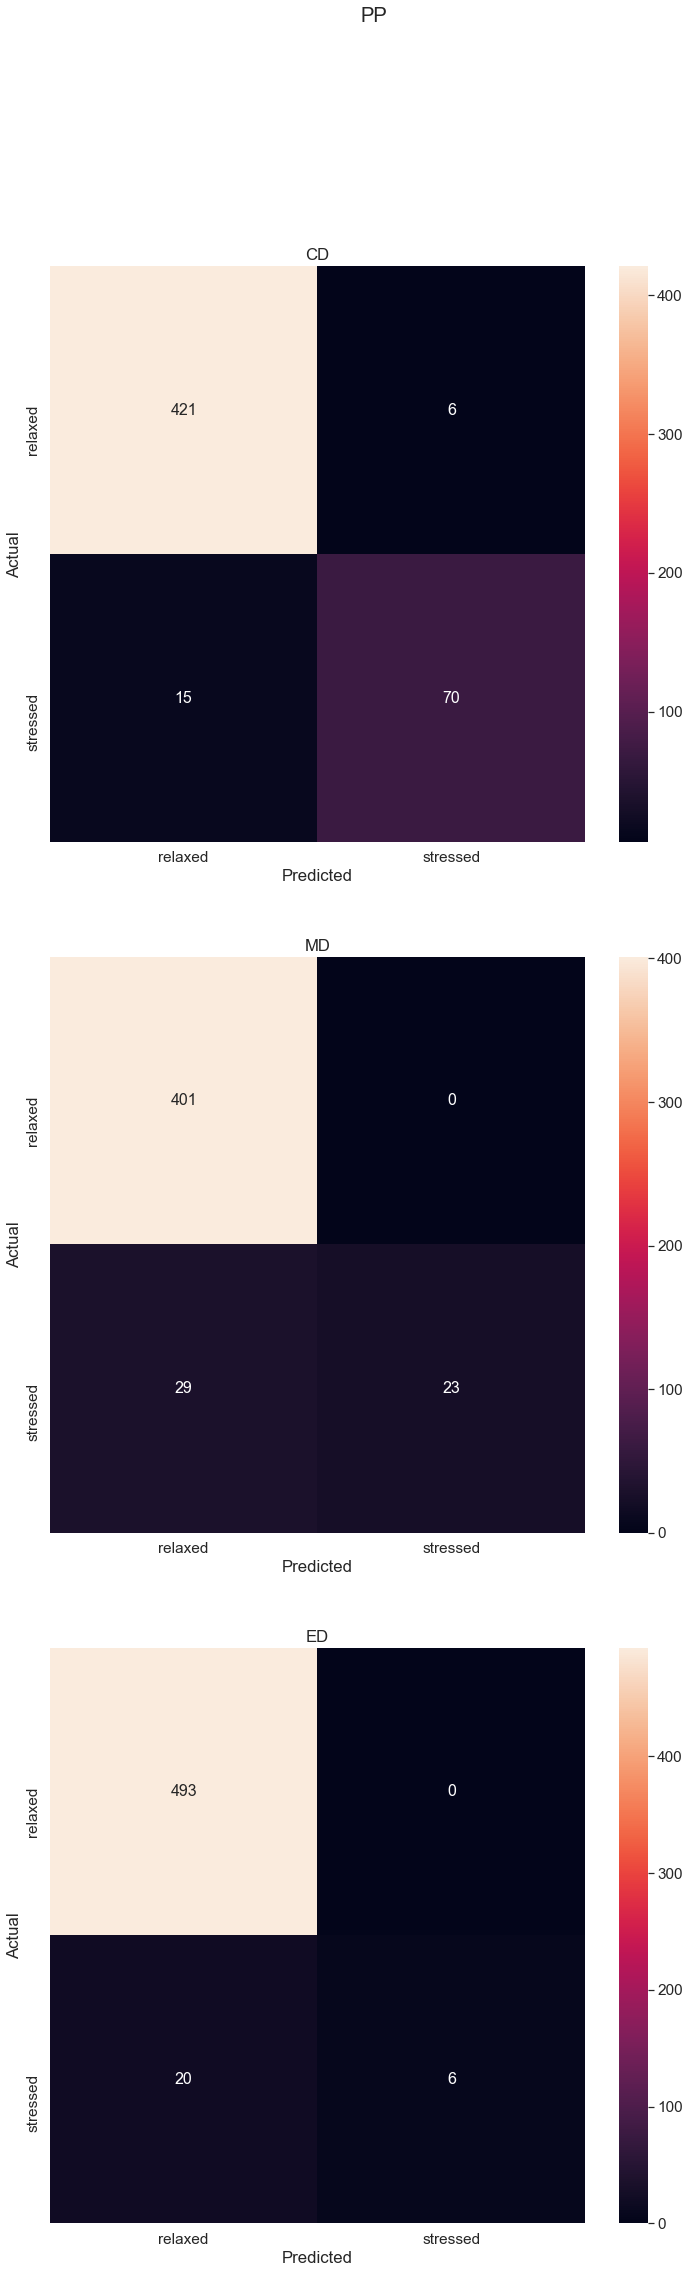

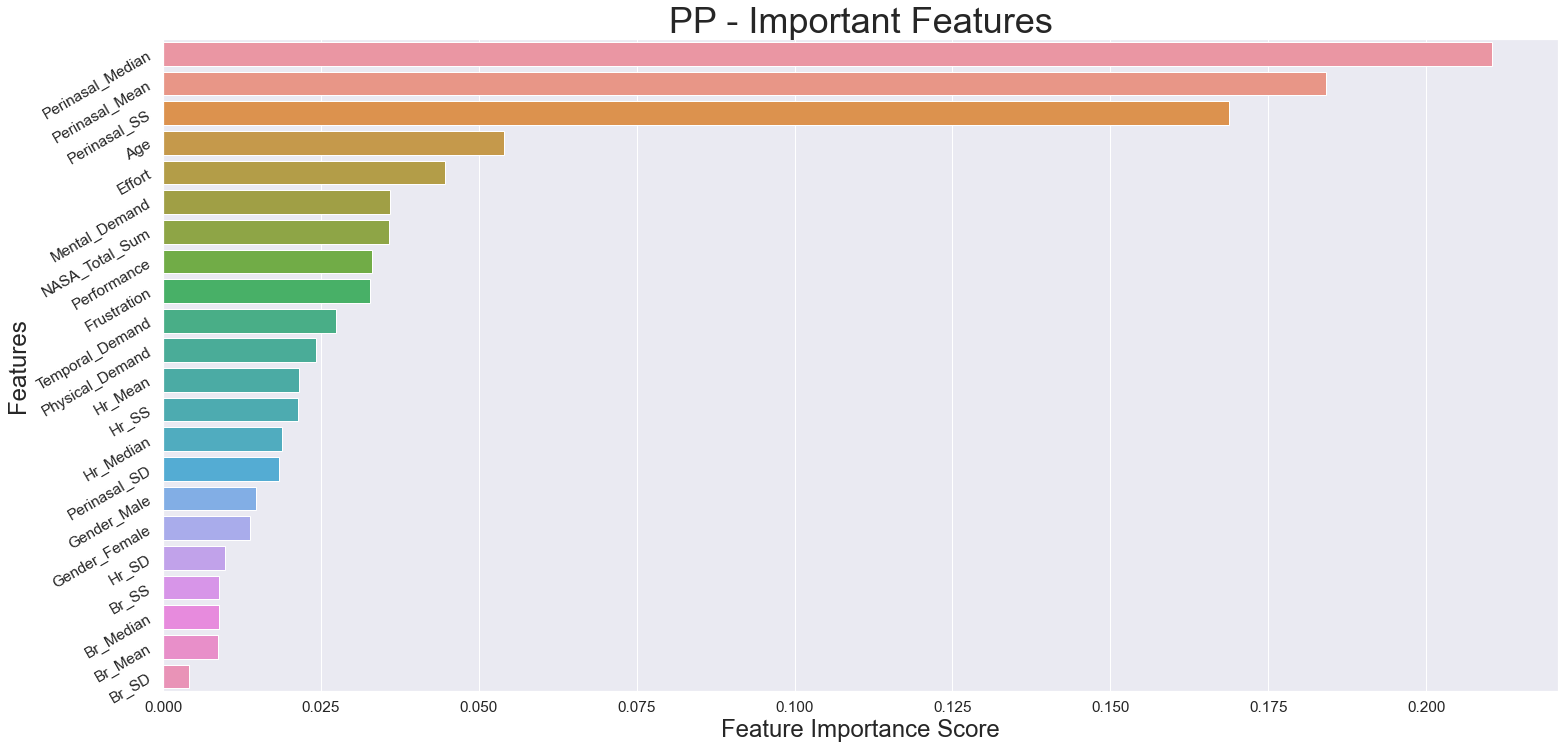

      0    1
0  1316    5
1    62  101


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


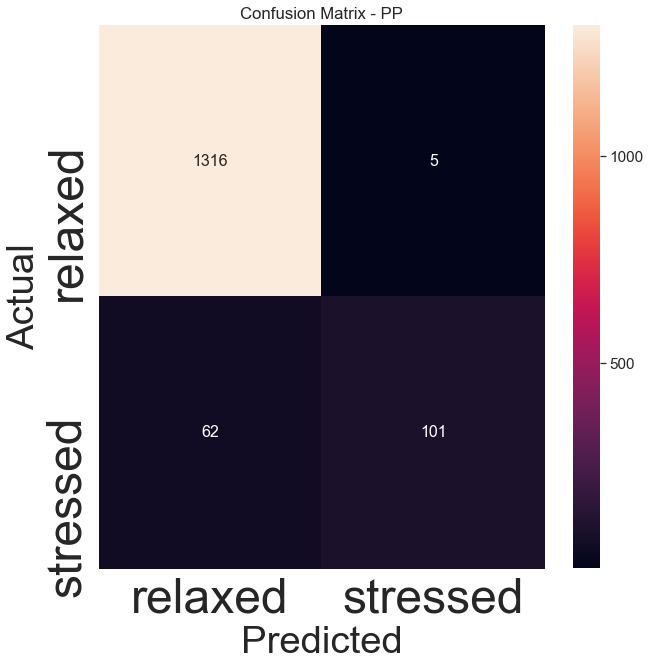

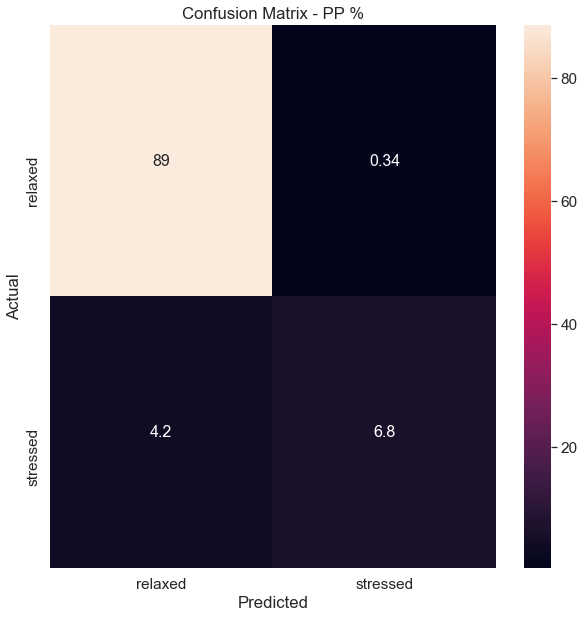

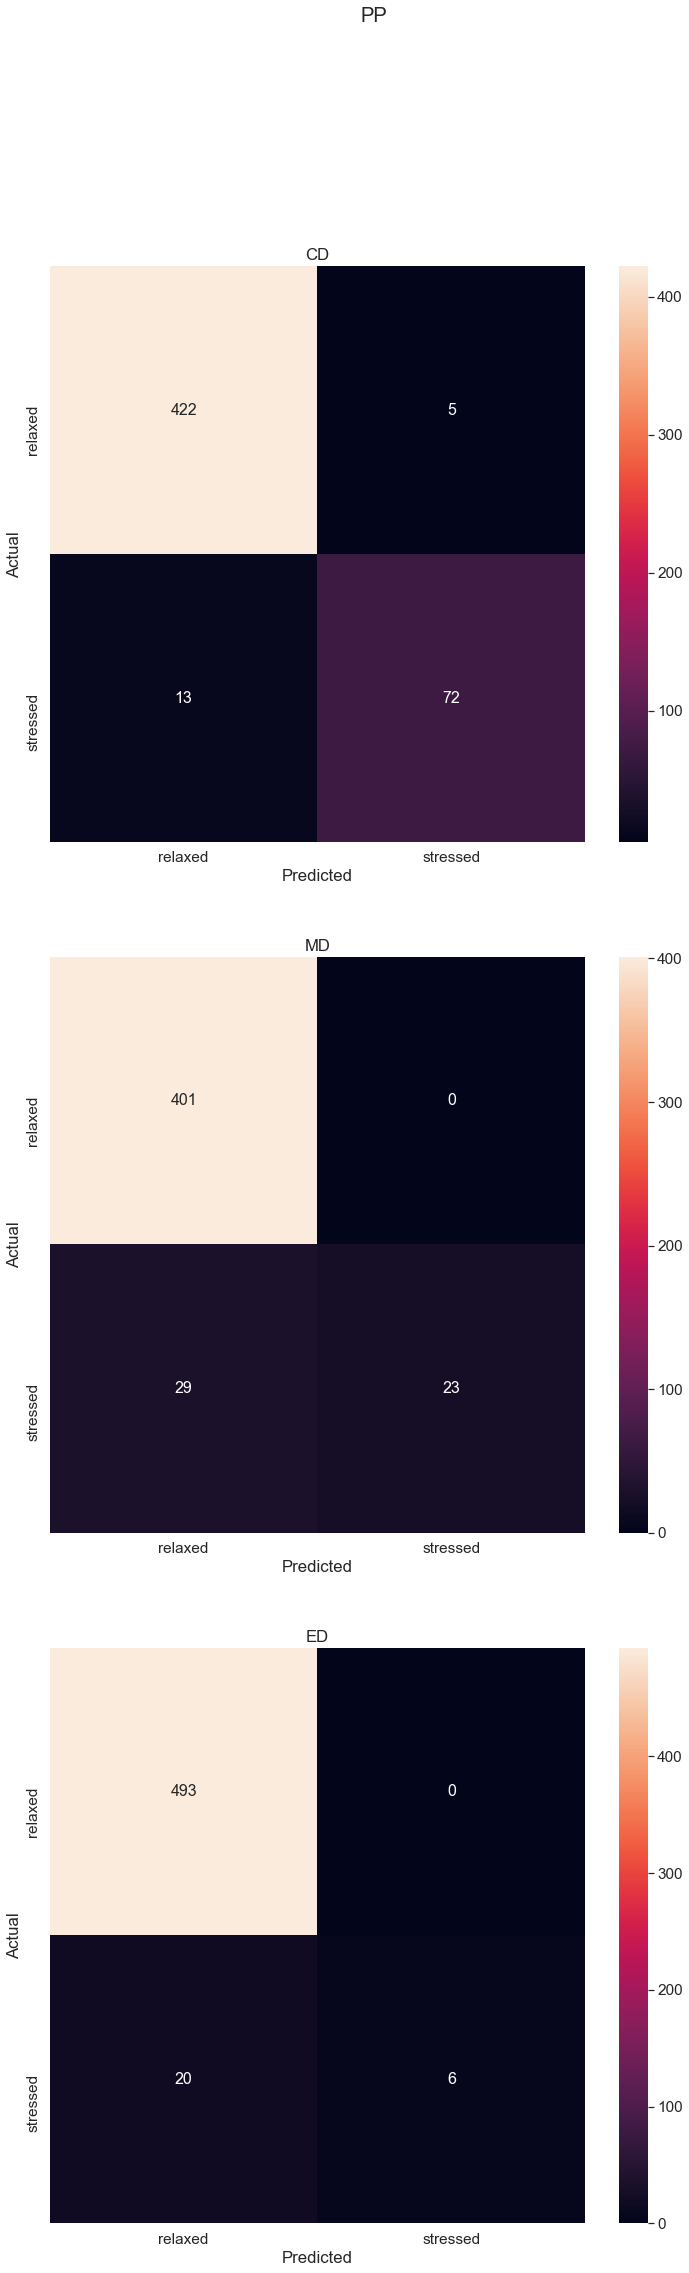

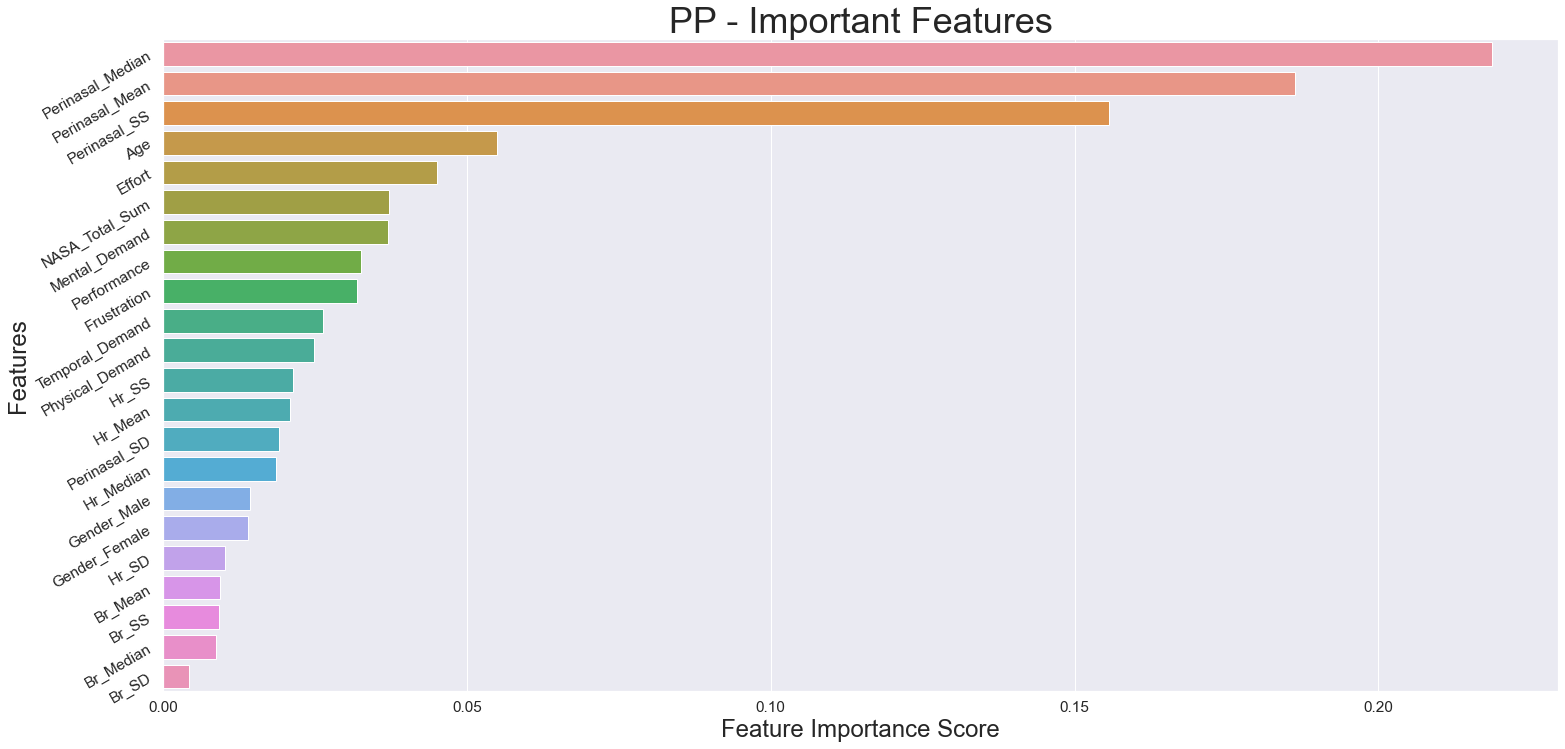

      0    1
0  1316    5
1    61  102


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


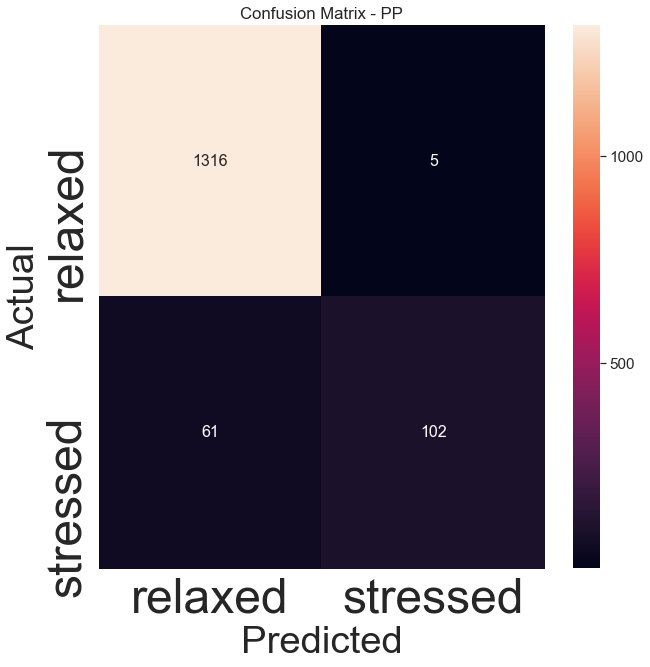

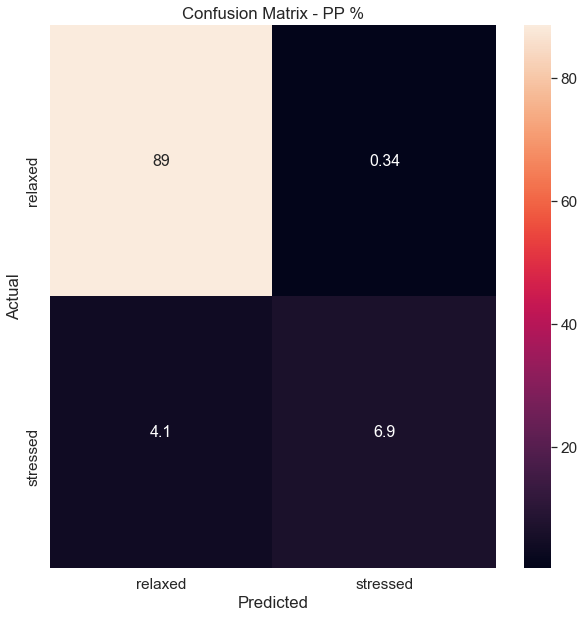

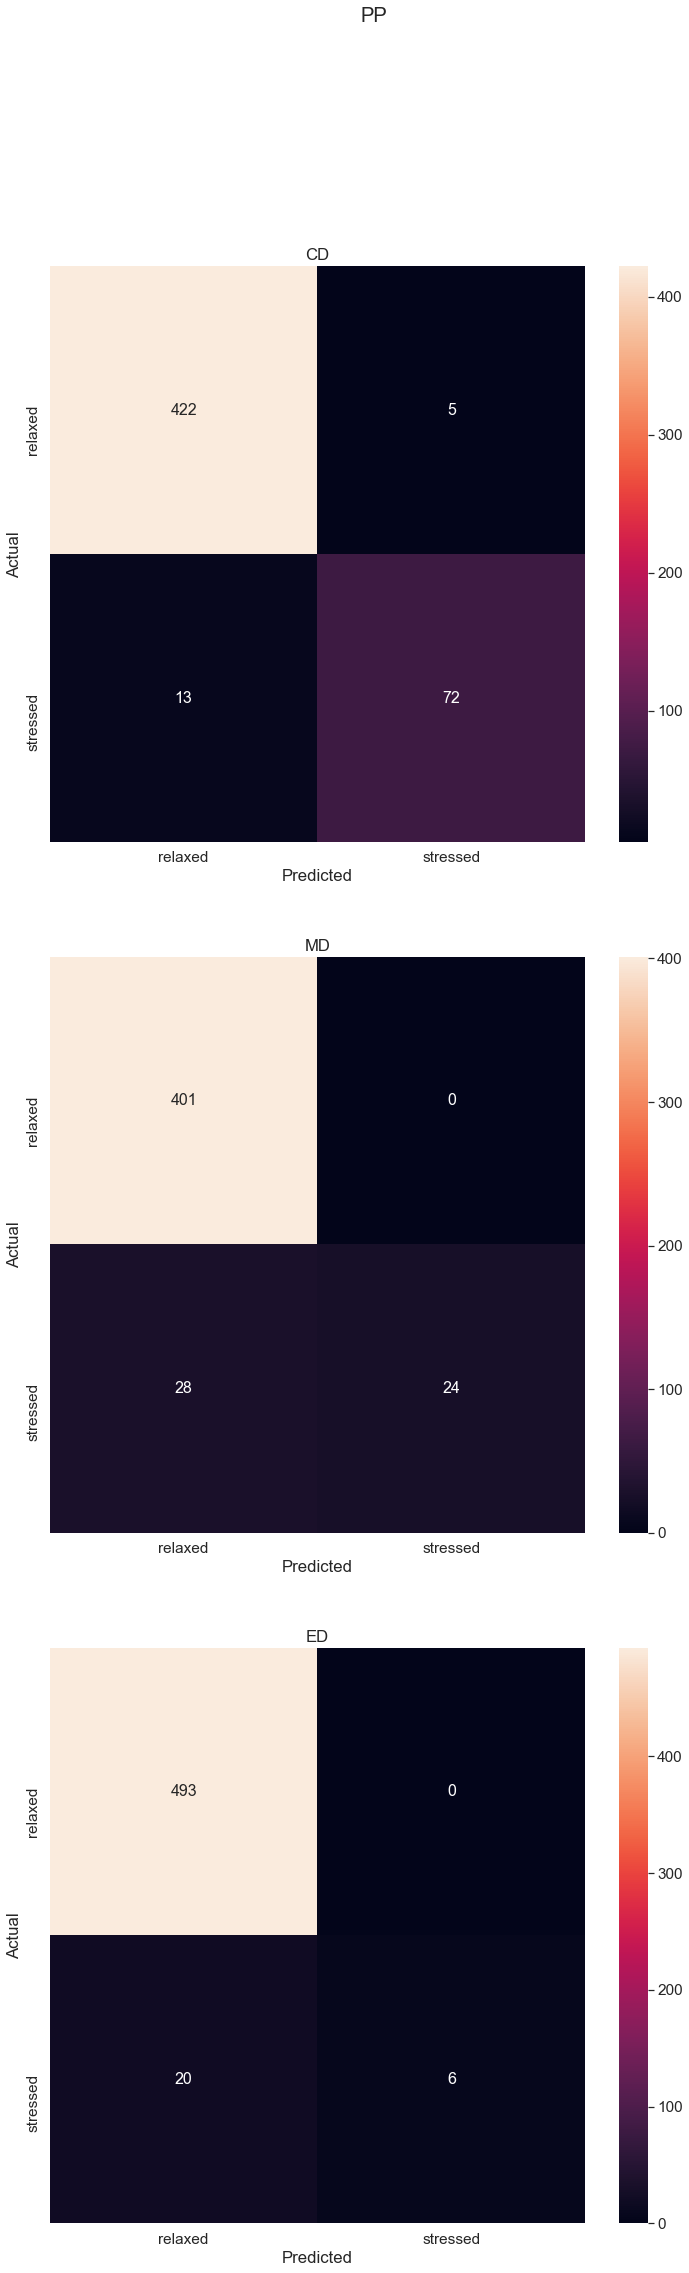

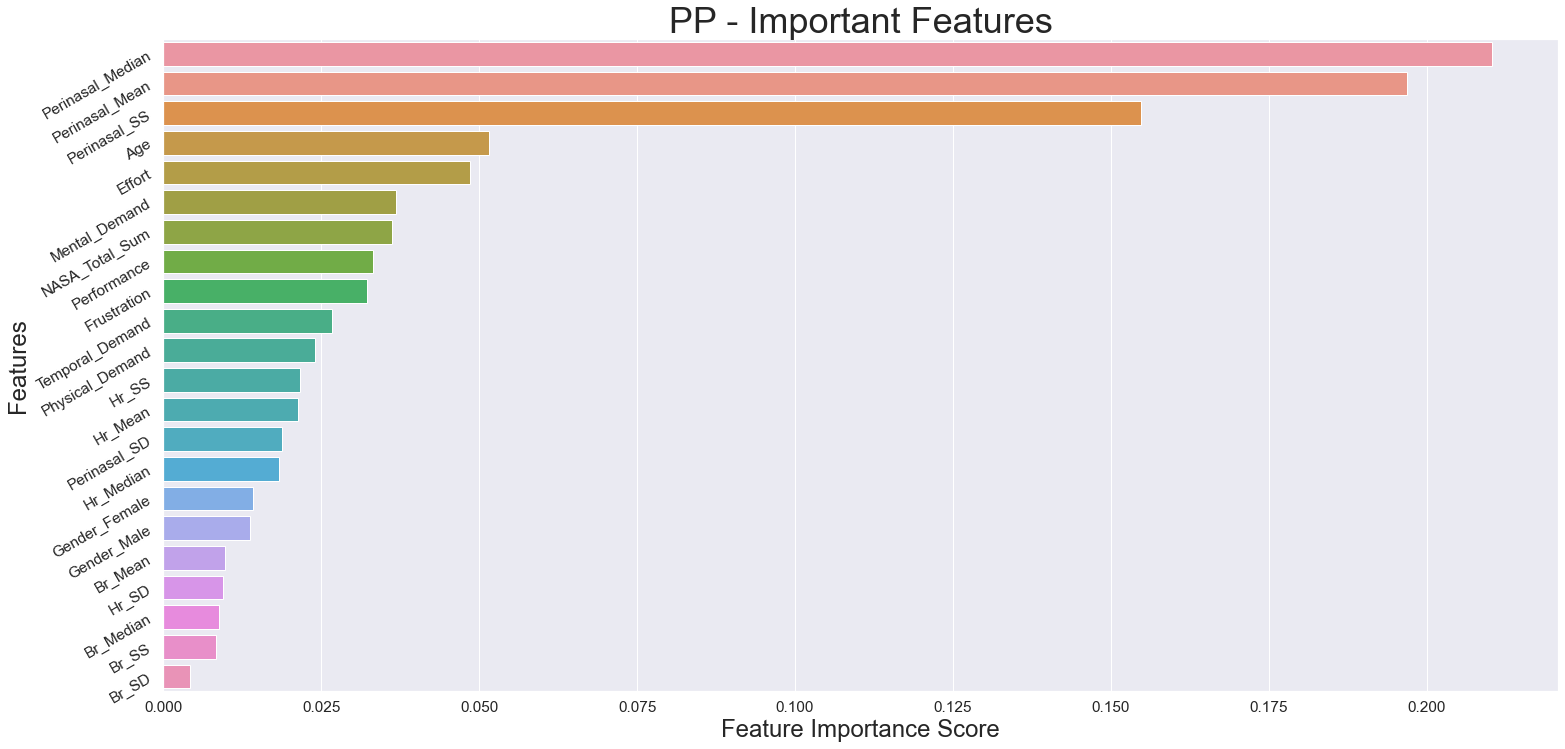

      0    1
0  1316    5
1    63  100


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.96
F1: 0.95
Recall: 0.96
Precision: 0.96


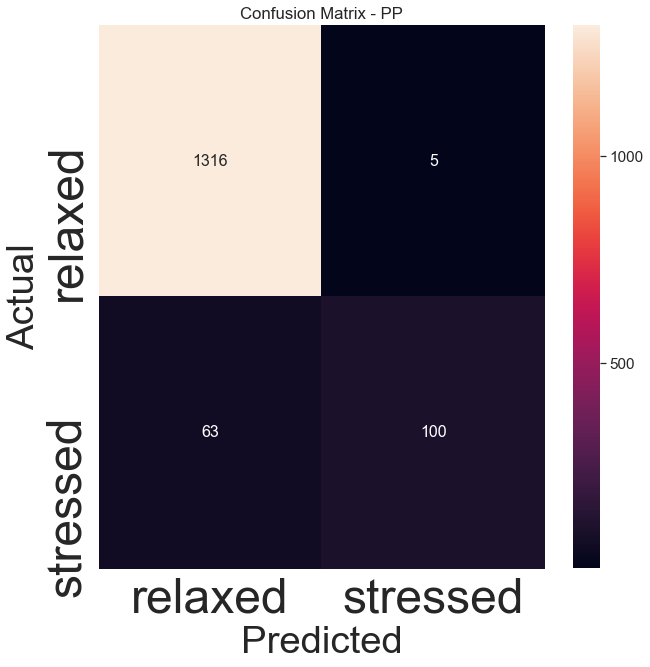

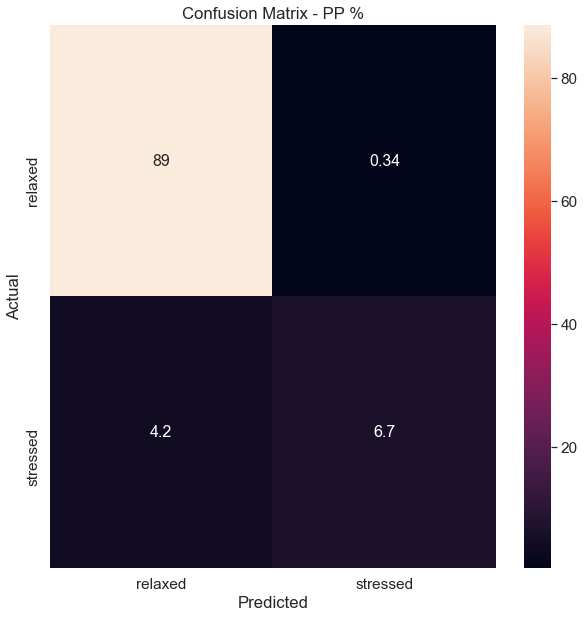

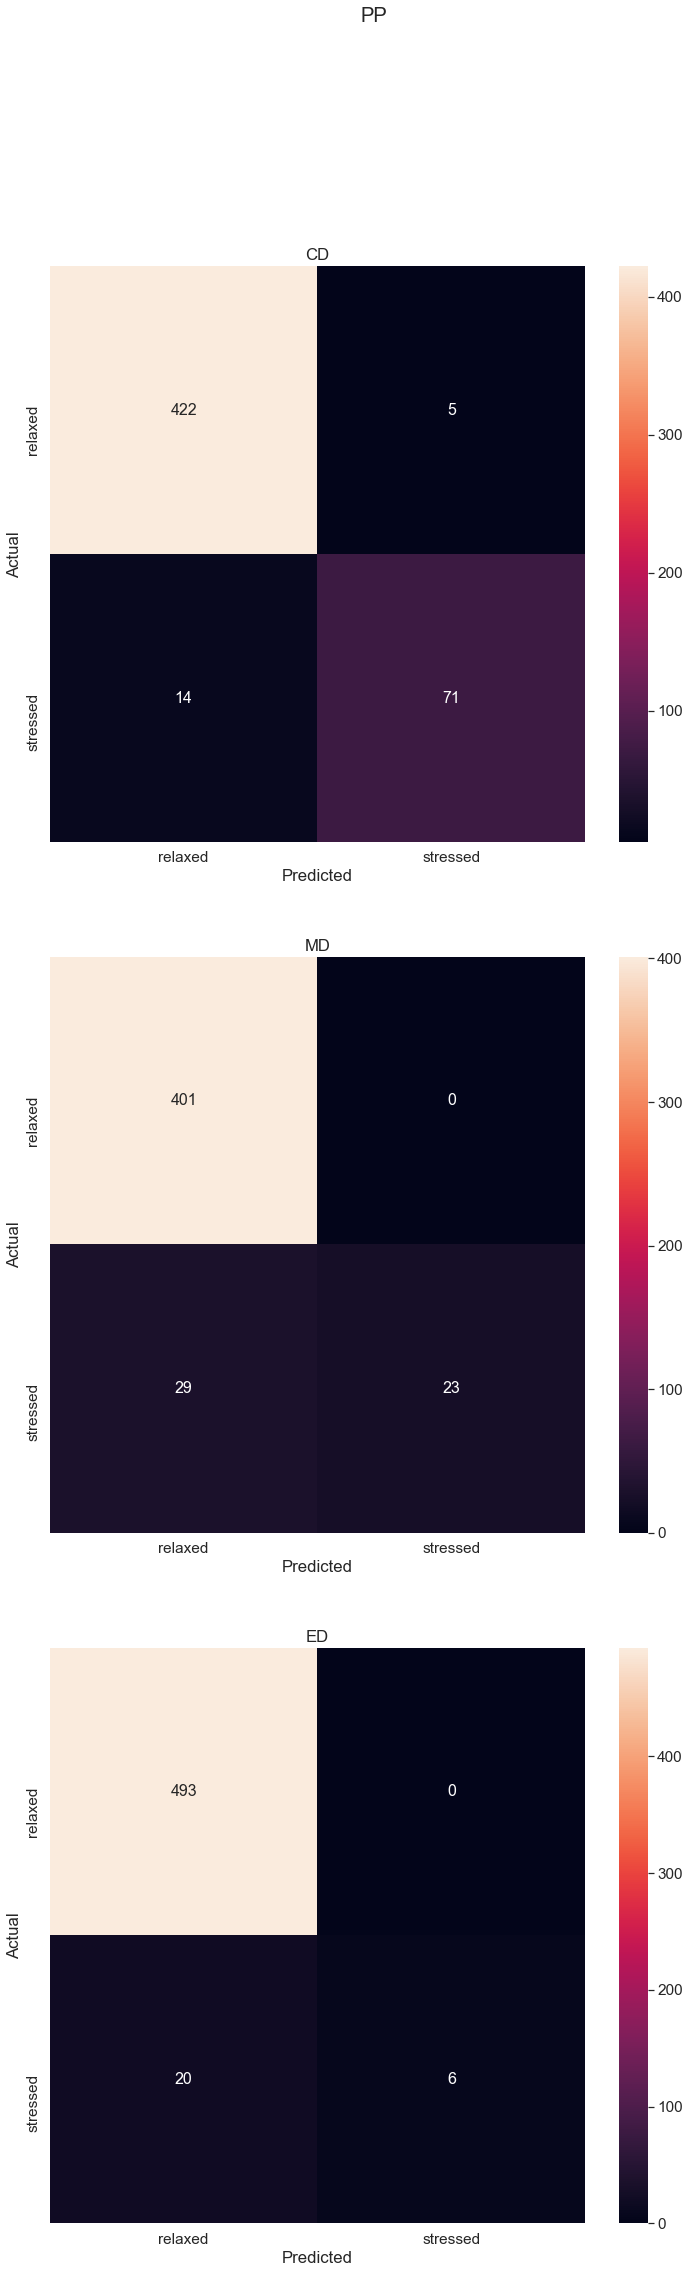

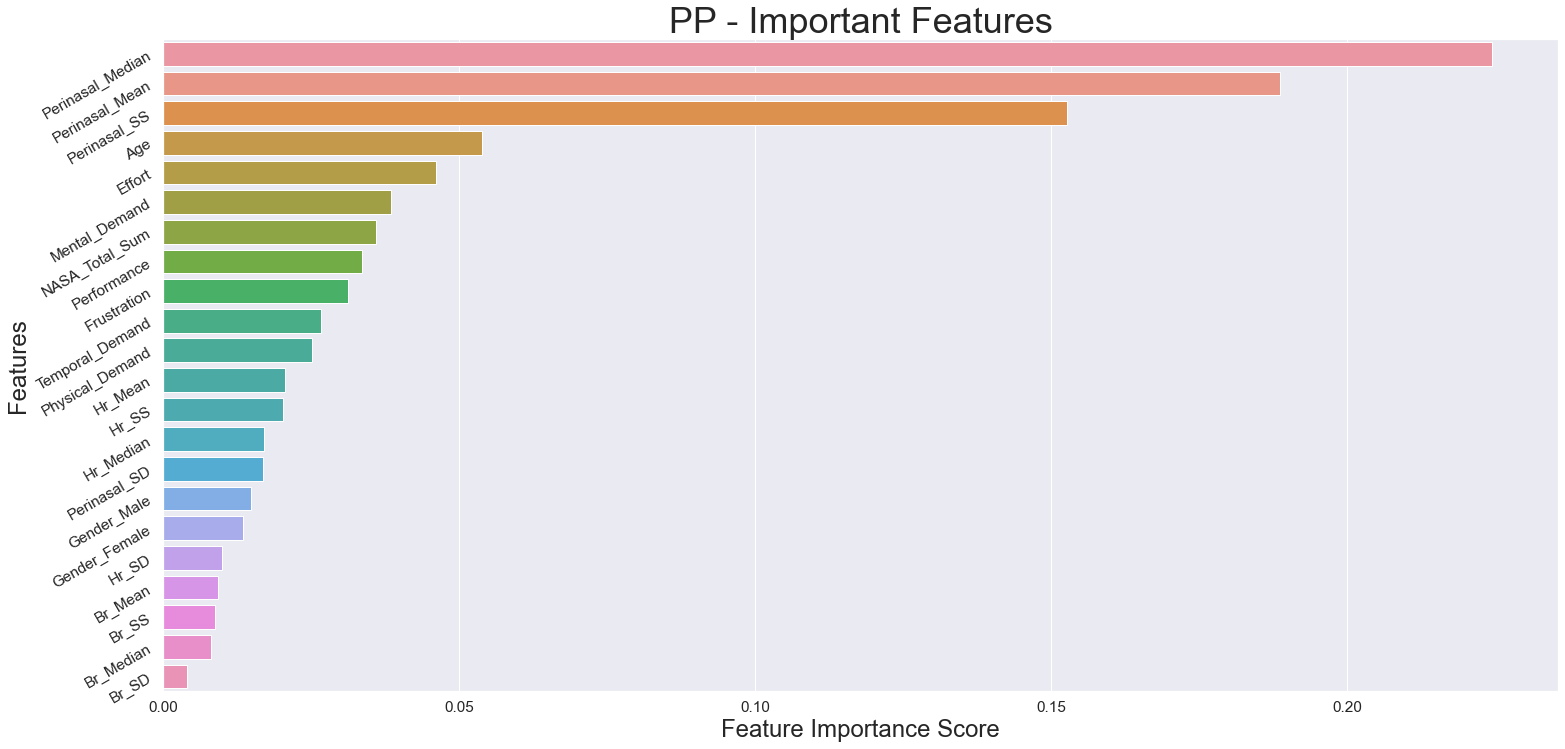

      0    1
0  1318    3
1    63  100


Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


Accuracy:0.95
F1: 0.95
Recall: 0.95
Precision: 0.95


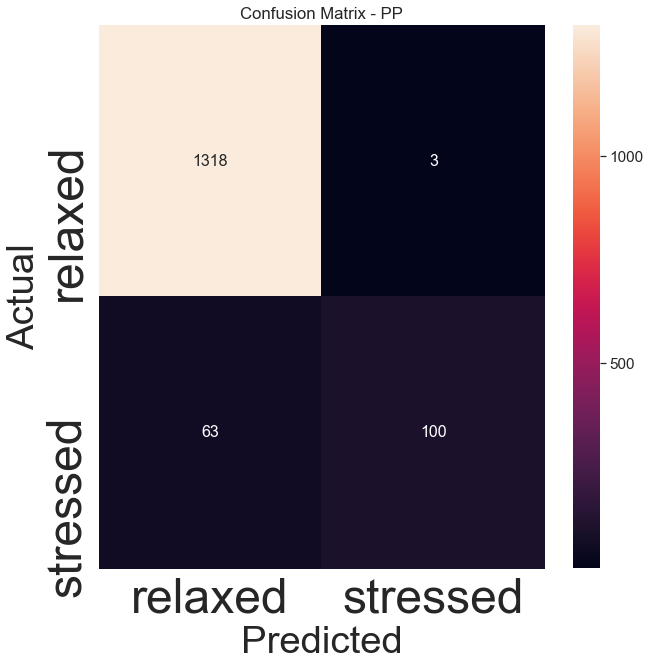

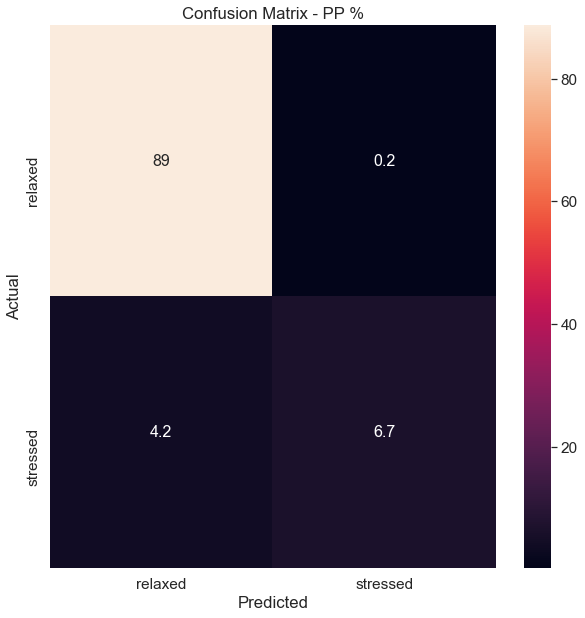

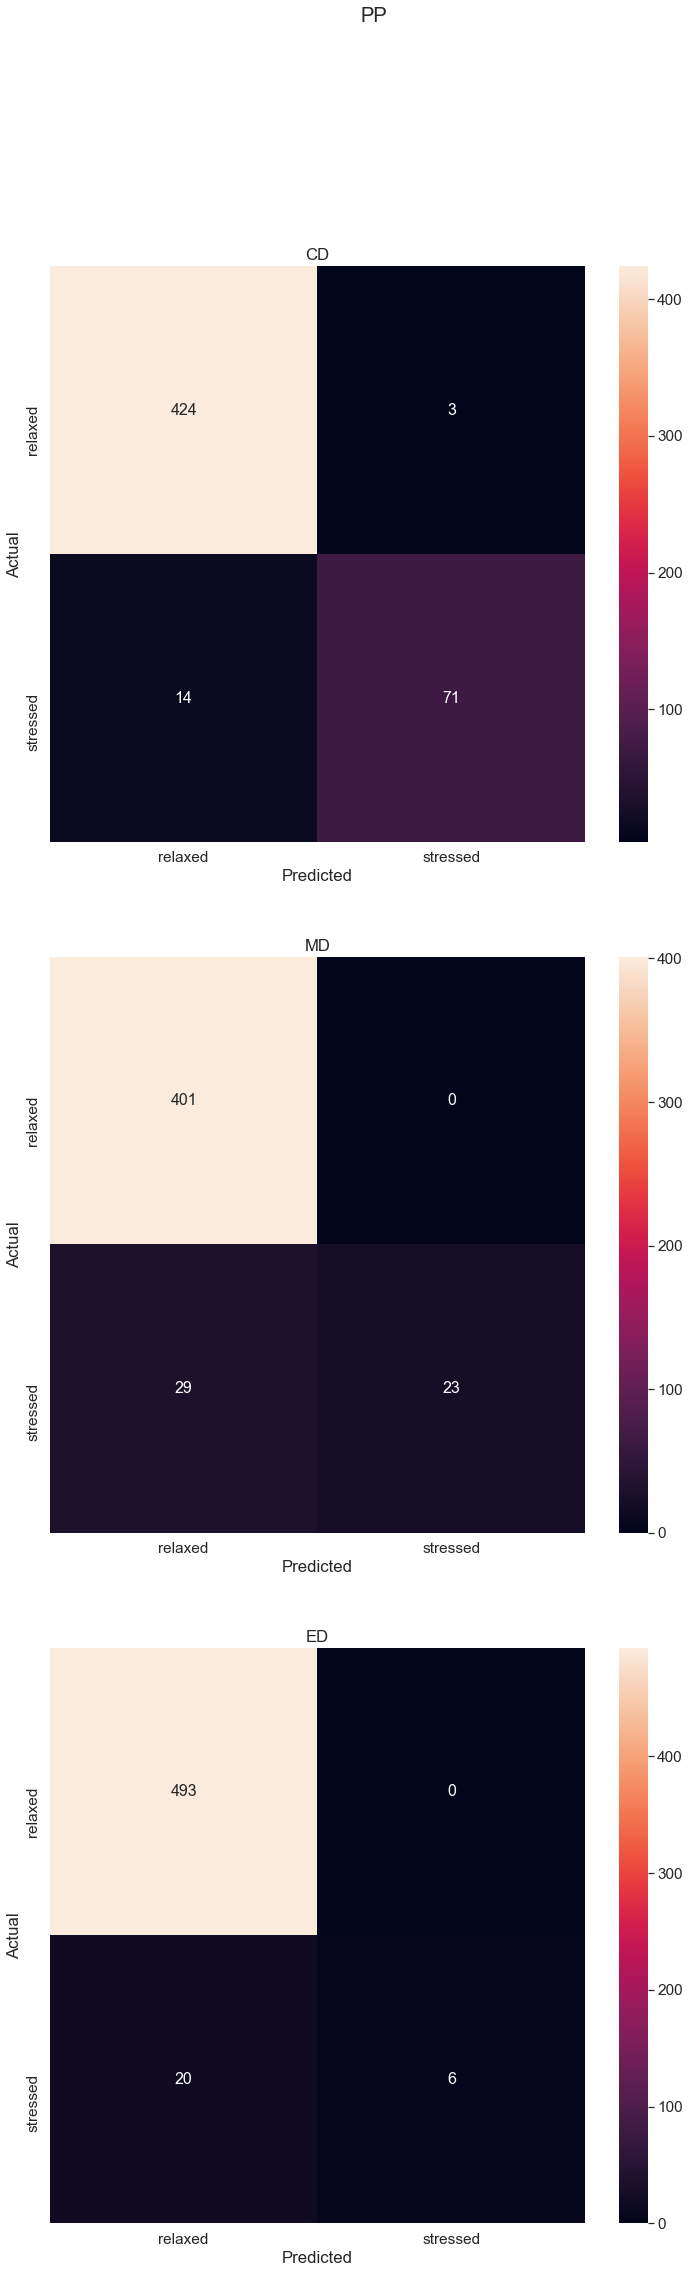

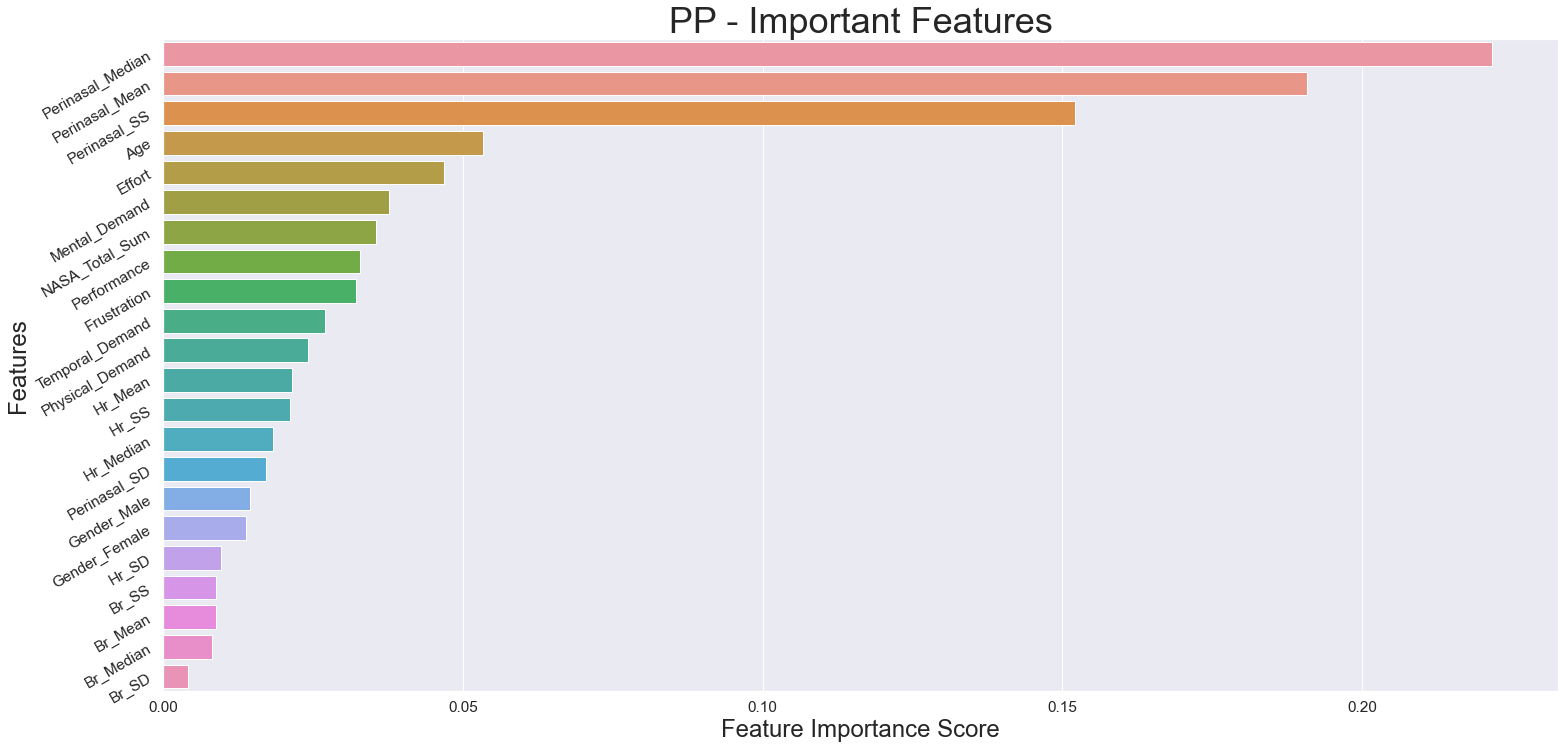

      0   1
0  1315   6
1    64  99
{'PP': {'Accuracy': [0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95], 'F1': [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'Recall': [0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95], 'Precision': [0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95]}}










{'PP': {'Accuracy': [0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,

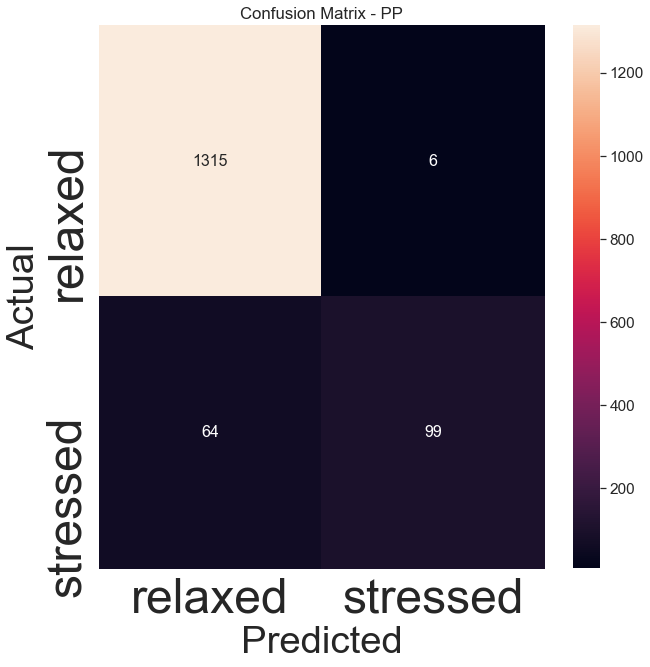

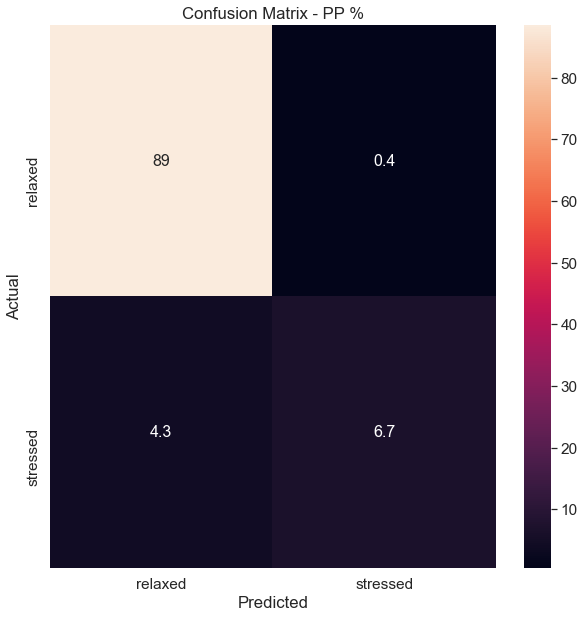

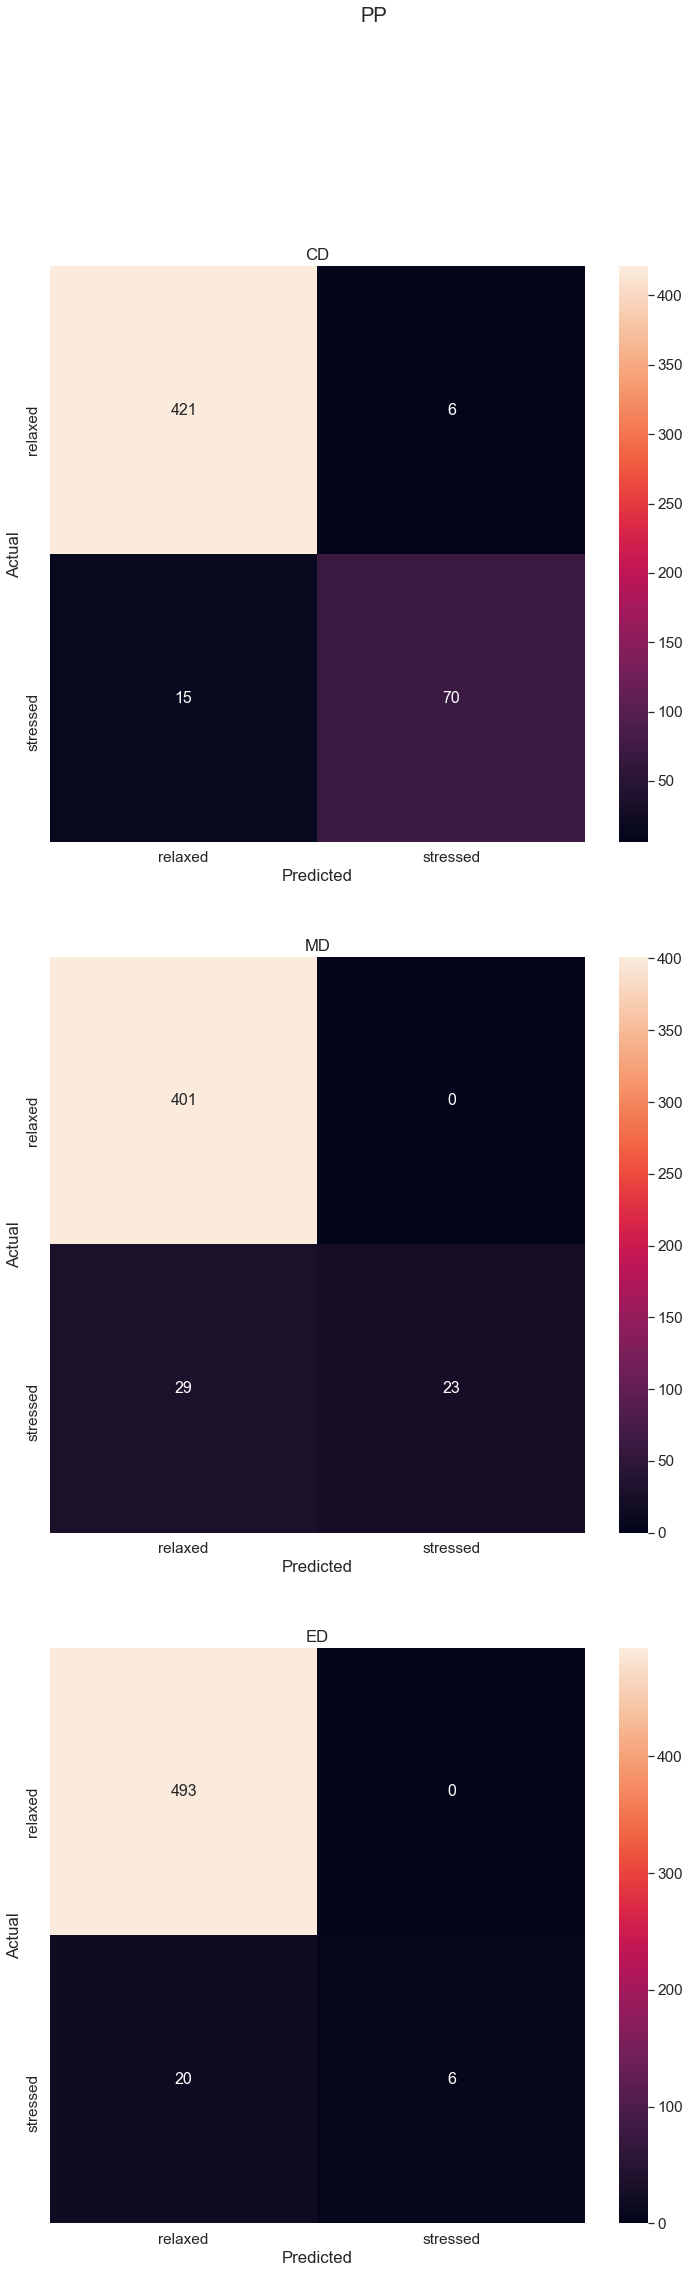

In [41]:
#####################################################################################
arousal_signals = ['PP']
# arousal_signals = ['PP', 'PP_2', 'HR', 'BR', 'PP_HR_BR']

# 'PP', 'PP_2', 'HR', 'BR'
# 'PP_HR', 'HR_BR', 'PP_BR', 'PP_HR_BR'
#####################################################################################

signal_metrics = {}

for arousal_signal in arousal_signals:
    print('----------------------------------------------------')
    print('------------------------', arousal_signal, '------------------------')
    print('----------------------------------------------------\n')
    
    signal_metrics[arousal_signal] = {
        'Accuracy': [],
        'F1': [],
        'Recall': [],
        'Precision': [],
    }
    print(signal_metrics)
        
    for i in range(30):
        # print('\n--------------------------------------------- Iteration: ', i+1)
        get_bootstrap_results(final_df, feature_list, arousal_signal, random_selection = False)
        
        
    print(signal_metrics)    
    print('\n\n\n\n\n\n\n\n\n')
    
    
print(signal_metrics)

In [42]:
print(signal_metrics)


# {'PP': {'Accuracy': [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'F1': [0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'Recall': [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'Precision': [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]}, 'PP_2': {'Accuracy': [0.81, 0.8, 0.81, 0.8, 0.81, 0.8, 0.8, 0.81, 0.82, 0.81, 0.82, 0.81, 0.81, 0.82, 0.82, 0.81, 0.8, 0.82, 0.81, 0.81, 0.82, 0.81, 0.82, 0.81, 0.8, 0.82, 0.8, 0.82, 0.8, 0.81], 'F1': [0.78, 0.78, 0.78, 0.77, 0.78, 0.78, 0.77, 0.78, 0.79, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.79, 0.77, 0.79, 0.78, 0.79, 0.79, 0.78, 0.79, 0.78, 0.77, 0.79, 0.78, 0.79, 0.78, 0.79], 'Recall': [0.81, 0.8, 0.81, 0.8, 0.81, 0.8, 0.8, 0.81, 0.82, 0.81, 0.82, 0.81, 0.81, 0.82, 0.82, 0.81, 0.8, 0.82, 0.81, 0.81, 0.82, 0.81, 0.82, 0.81, 0.8, 0.82, 0.8, 0.82, 0.8, 0.81], 'Precision': [0.8, 0.79, 0.81, 0.78, 0.8, 0.8, 0.79, 0.8, 0.83, 0.79, 0.82, 0.8, 0.8, 0.82, 0.83, 0.8, 0.79, 0.81, 0.8, 0.8, 0.83, 0.8, 0.83, 0.81, 0.79, 0.83, 0.79, 0.81, 0.79, 0.81]}, 'HR': {'Accuracy': [0.73, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.72, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71], 'F1': [0.73, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.72, 0.72, 0.72, 0.71, 0.72, 0.71, 0.72, 0.72, 0.72, 0.72, 0.72, 0.71, 0.72, 0.71, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71], 'Recall': [0.73, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.72, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71], 'Precision': [0.73, 0.72, 0.73, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.73, 0.73, 0.72, 0.72, 0.72, 0.71, 0.73, 0.72, 0.72, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71]}, 'BR': {'Accuracy': [0.79, 0.81, 0.8, 0.78, 0.78, 0.79, 0.79, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.79, 0.78, 0.79, 0.79, 0.78, 0.81, 0.78, 0.79, 0.78, 0.8, 0.79, 0.8, 0.8, 0.78, 0.78, 0.79, 0.79], 'F1': [0.79, 0.81, 0.79, 0.77, 0.78, 0.78, 0.79, 0.77, 0.79, 0.78, 0.78, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.78, 0.8, 0.78, 0.78, 0.78, 0.79, 0.79, 0.8, 0.79, 0.78, 0.78, 0.79, 0.79], 'Recall': [0.79, 0.81, 0.8, 0.78, 0.78, 0.79, 0.79, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.79, 0.78, 0.79, 0.79, 0.78, 0.81, 0.78, 0.79, 0.78, 0.8, 0.79, 0.8, 0.8, 0.78, 0.78, 0.79, 0.79], 'Precision': [0.8, 0.82, 0.81, 0.78, 0.79, 0.79, 0.8, 0.78, 0.8, 0.79, 0.79, 0.8, 0.8, 0.79, 0.8, 0.8, 0.8, 0.79, 0.81, 0.8, 0.79, 0.79, 0.81, 0.8, 0.81, 0.8, 0.79, 0.79, 0.8, 0.79]}, 'PP_HR_BR': {'Accuracy': [0.76, 0.75, 0.76, 0.75, 0.75, 0.75, 0.75, 0.73, 0.76, 0.76, 0.76, 0.75, 0.75, 0.76, 0.76, 0.76, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.76, 0.76, 0.76], 'F1': [0.74, 0.74, 0.75, 0.74, 0.73, 0.74, 0.73, 0.72, 0.74, 0.74, 0.75, 0.74, 0.74, 0.75, 0.75, 0.74, 0.75, 0.74, 0.74, 0.73, 0.75, 0.74, 0.75, 0.74, 0.74, 0.74, 0.74, 0.74, 0.75, 0.75], 'Recall': [0.76, 0.75, 0.76, 0.75, 0.75, 0.75, 0.75, 0.73, 0.76, 0.76, 0.76, 0.75, 0.75, 0.76, 0.76, 0.76, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.76, 0.76, 0.76], 'Precision': [0.74, 0.74, 0.75, 0.74, 0.73, 0.74, 0.73, 0.72, 0.74, 0.75, 0.75, 0.74, 0.74, 0.75, 0.75, 0.75, 0.75, 0.74, 0.74, 0.73, 0.75, 0.74, 0.75, 0.74, 0.74, 0.74, 0.74, 0.74, 0.75, 0.75]}}

{'PP': {'Accuracy': [0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95], 'F1': [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'Recall': [0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95], 'Precision': [0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95]}}


In [46]:
# print(signal_metrics['PP']['Accuracy'])
# print(signal_metrics['HR']['Accuracy'])
print(len(signal_metrics['PP']['Accuracy']))
# print(len(signal_metrics['HR']['Accuracy']))

30


In [45]:
# {
#         'Accuracy': [],
#         'F1': [],
#         'Recall': [],
#         'Precision': [],
#     }


for arousal_signal in arousal_signals:
    arousal_signal_metrics = signal_metrics[arousal_signal]
    print("\n\n" + arousal_signal + " ----> ")
    
    for metric in ['Accuracy', 'F1', 'Recall', 'Precision']:
        metric_numbers = arousal_signal_metrics[metric]
        print(metric + ": " + 
              get_rounded_str(mean(metric_numbers), 2) + u" \u00B1 " +
              get_rounded_str(stdev(metric_numbers), 3))



PP ----> 
Accuracy: 0.95 ± 0.005
F1: 0.95 ± 0.0
Recall: 0.95 ± 0.005
Precision: 0.95 ± 0.005


In [ ]:
# import pprint
# pp = pprint.PrettyPrinter(indent=1)

# pp.pprint(signal_metrics)

In [ ]:
#################
# DO NOT DELETE #
#################



##################################
####----   Old Features   ----####
##################################
# cor_df = final_df.copy()[['Arousal_Mode',
#                           'Perinasal_Mean', 'Perinasal_SD', 'Perinasal_Median', 'Perinasal_SS', 
#                           'Palm_Mean', 'Palm_SD', 'Palm_Median', 'Palm_SS', 
#                           'Hr_Mean', 'Hr_SD', 'Hr_Median', 'Hr_SS', 
#                           'Br_Mean', 'Br_SD', 'Br_Median', 'Br_SS',
#                           'Drive_Label_CD', 'Drive_Label_ED', 
#                           'Drive_Label_FD', 'Drive_Label_MD'
#                            ]]


#############################################
####---- only physiological Features ----####
#############################################
# cor_df = final_df.copy()[['Arousal_Mode', 
#                           'Perinasal_Mean', 'Perinasal_SD',
#                           'Palm_Mean', 'Palm_SD', 
#                           'Hr_Mean', 'Hr_SD',
#                           'Br_Mean', 'Br_SD',
#                           'Drive_Label_CD', 'Drive_Label_ED', 
#                           'Drive_Label_FD', 'Drive_Label_MD'
#                            ]]


##################################
####----   All Features   ----####
##################################
cor_df = final_df.copy()[['Arousal_Mode'] + feature_list]

corr = cor_df.corr().round(3)

plt.figure(figsize=(45, 45))
plt.subplot(1, 1, 1)

sns.heatmap(corr, cmap="YlGnBu", center=0, square=True, linewidths=.5, annot=True, annot_kws={"size": 14})

sns.set(font_scale=1.4)
# sns.set_context('paper', font_scale=4)

plt.rc('xtick', labelsize=40)
plt.rc('ytick', labelsize=40)
plt.xticks(rotation=50)



# plt.savefig(figure_path + 'all_features_correlation_plot.png')
# plt.savefig(figure_path + 'all_features_correlation_plot.pdf')

plt.show()

In [ ]:
##########################
# NON USED CODES
##########################


# IFrame("../../data/sim1/figures/pp_arousal_prediction_Cognitive_sd.pdf", width=900, height=600)



# result_df = pd.DataFrame({
#         'actual': y_test,
#         'prediction': y_pred,
#         'err': y_test == y_pred
#     }).sort_values('err', ascending = False)
# result_df.to_csv("../../data/sim1/test/result_" + arousal_signal + ".csv", sep=',')










# ########################
# PP -->
# ########################
# Accuracy: 0.779839208410637
# F1: 0.7578831147346705
# Recall: 0.779839208410637
# Precision: 0.7987647247206715

# #################################
# PP --> Best Bootstraping for PP
# #################################
# Accuracy: 0.8556223970384081
# F1: 0.8416228891876154
# Recall: 0.8556223970384081
# Precision: 0.8378525827410469






#########################
# PP_2 -->
#########################
# Accuracy: 0.7414965986394558
# F1: 0.7382594058202663
# Recall: 0.7414965986394558
# Precision: 0.7647435765692131

##################################
# PP_2 --> Best Bootstraping for PP
##################################
# Accuracy: 0.7431744562702453
# F1: 0.7332696262099785
# Recall: 0.7431744562702453
# Precision: 0.736553172654085


    
    
    
    
#########################
# HR -->
#########################
# Accuracy: 0.6487322201607916
# F1: 0.5998199331532664
# Recall: 0.6487322201607916
# Precision: 0.6352522628886266

##################################
# HR --> Best Bootstraping for PP
##################################
# Accuracy: 0.6598796853308654
# F1: 0.659423920692846
# Recall: 0.6598796853308654
# Precision: 0.6590498579113212




#########################
# BR -->
#########################
# Accuracy: 0.6951144094001237
# F1: 0.6916477146798585
# Recall: 0.6951144094001237
# Precision: 0.7030998641785814

##################################
# BR --> Best Bootstraping for PP
##################################
# Accuracy: 0.7366959740860712
# F1: 0.7339665422228959
# Recall: 0.7366959740860712
# Precision: 0.7382492602016391
